In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
training_set=pd.read_csv('/content/drive/MyDrive/Time series analysis/Google_Stock_Price_Train.csv')
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#to chnage the data type of date column to object to date
training_set['Date']=pd.to_datetime(training_set['Date'])

In [5]:
training_set.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
training_set.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close             object
Volume            object
dtype: object

In [7]:
training_set.shape

(1258, 6)

In [8]:
training_set['Date'].min(),training_set['Date'].max()#we can underatndthat we have record of 4 years.

(Timestamp('2012-01-03 00:00:00'), Timestamp('2016-12-30 00:00:00'))

In [9]:
#taking input as Open 
x=training_set.iloc[:,1:2]
#x=training_set.loc[:]['Open']

In [10]:
x.shape

(1258, 1)

In [11]:
x

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [12]:

#applying scaling before giving into machine apply feature engineering means apply me=inmaxscaler
#always appy minmax on stock prediction data becuase we have 5 years of data and new data will come in that range
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [13]:
x=mm.fit_transform(x)

In [14]:
x

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [15]:
#tofind number of records
len(x)

1258

In [16]:
#now select input and output
x_train=x[0:1257]#start=0 and stop=1256
#why 1257 n=bcz we have 1 less
y_train=x[1:1258]  #start=1 and stop=1257

In [17]:
x_train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95163331],
       [0.95725128],
       [0.93796041]])

In [18]:

y_train

array([[0.09701243],
       [0.09433366],
       [0.09156187],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [19]:
len(x_train),len(y_train)

(1257, 1257)

In [20]:
#next step:is to give 3D data to machine 
#but now we have inoput and output which 2D only
x_train.ndim,y_train.ndim

(2, 2)

In [21]:
#first dimension:no of record(rows)
#second dimension:no of column(columns)
#third dimension:time stamp
#time stamp means if we want to know the 2023 openig price then we should know the 2022 opening price i.e12-01-2022 (to predict) 11-01-2022(toknow)
#timestamp :t(kal ka)+1-t(aaj)=1
#timestamp :t(4days before)+4-t(aaj)=4

In [22]:
#to convert input(x_train) from 2D to3D usig reshape
x_train=np.reshape(x_train,(1257,1,1))#1257=row 1=column 1=timestamp


In [23]:
x_train.ndim

3

In [24]:
#now giving x_train as input and y_train(output) to Recurrent Neural Network


In [25]:
#part 2:building neural netowrk(LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
#lstm means long short term memory becuase while learning the recurrent neural network it keeps on forgivig te data so to manage the data not to forget we use LSTM to stroe the previuous output and give as input to another part.

In [26]:
#we have regression [problem which is to predict stock price emans the daata is in continuous numeric values 
#so we are going to take activation function on input layer using formula as :(y_pred=w*x+bias)





In [27]:
model=Sequential()

In [28]:
#to add the layers in model
#units=4 becuae we have 4 years of data if 3 years of data then 3 ,sigmodi mean the word which is imp keep itand forgetthe remining becausewe are using lstm,
#None means all record and 1 means no of columns
model.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))
#to add output layer or dense layer:if the output is continuous then 1 neuron and linear activation adn if categorica then no of output and sigmoid
model.add(Dense(units=1,activation='linear'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam',loss='mean_squared_error')
#optimizer=sgd:with the help of this the process get slow down.

In [31]:
#create a procedure to decide the nos of iteration or epochs to train the model
#first call early stopping class
from tensorflow.keras.callbacks import EarlyStopping
#create the object of early stopping class
cb=EarlyStopping(
    monitor='val_loss',#means validation loss means testing error(to monitor testing loss)
    min_delta=0.00001,#LEARNING RATE
    patience=20,#till how many step  we have to see more
    verbose=1,#how many iteration is required to train the model by a msg
    mode='auto',#val loss ki minimum error pe rukhna hai or val score hota toh maximum pe rukhna hai
    baseline=None,#by default the weight and bias is assigned by the neural network 
    restore_best_weights=False#Final weight and bias after global minima(wapas se new weight aur bbias na initialize kare)


)


In [ ]:
#train the model with training data using fit() inbuilt methodof sequential class
trained_model=model.fit(x_train,y_train,epochs=5000,callbacks=cb,batch_size=20)

Epoch 1/5000
57/63 [==========================>...] - ETA: 0s - loss: 0.5670

63/63 [==============================] - 2s 3ms/step - loss: 0.5630
Epoch 2/5000
57/63 [==========================>...] - ETA: 0s - loss: 0.3892

63/63 [==============================] - 0s 3ms/step - loss: 0.3858
Epoch 3/5000
63/63 [==============================] - ETA: 0s - loss: 0.2625

63/63 [==============================] - 0s 3ms/step - loss: 0.2625
Epoch 4/5000
56/63 [=========================>....] - ETA: 0s - loss: 0.1808

63/63 [==============================] - 0s 3ms/step - loss: 0.1793
Epoch 5/5000
57/63 [==========================>...] - ETA: 0s - loss: 0.1281

63/63 [==============================] - 0s 3ms/step - loss: 0.1267
Epoch 6/5000
52/63 [=======================>......] - ETA: 0s - loss: 0.0983

63/63 [==============================] - 0s 3ms/step - loss: 0.0963
Epoch 7/5000
45/63 [====================>.........] - ETA: 0s - loss: 0.0815

63/63 [==============================] - 0s 2ms/step - loss: 0.0802
Epoch 8/5000
58/63 [==========================>...] - ETA: 0s - loss: 0.0715

63/63 [==============================] - 0s 3ms/step - loss: 0.0723
Epoch 9/5000
61/63 [============================>.] - ETA: 0s - loss: 0.0685

63/63 [==============================] - 0s 3ms/step - loss: 0.0686
Epoch 10/5000
41/63 [==================>...........] - ETA: 0s - loss: 0.0671

63/63 [==============================] - 0s 3ms/step - loss: 0.0666
Epoch 11/5000
63/63 [==============================] - ETA: 0s - loss: 0.0653

63/63 [==============================] - 0s 3ms/step - loss: 0.0653
Epoch 12/5000
59/63 [===========================>..] - ETA: 0s - loss: 0.0643

63/63 [==============================] - 0s 3ms/step - loss: 0.0641
Epoch 13/5000
57/63 [==========================>...] - ETA: 0s - loss: 0.0632

63/63 [==============================] - 0s 3ms/step - loss: 0.0630
Epoch 14/5000
60/63 [===========================>..] - ETA: 0s - loss: 0.0616

63/63 [==============================] - 0s 3ms/step - loss: 0.0619
Epoch 15/5000
43/63 [===================>..........] - ETA: 0s - loss: 0.0608

63/63 [==============================] - 0s 2ms/step - loss: 0.0607
Epoch 16/5000
59/63 [===========================>..] - ETA: 0s - loss: 0.0591

63/63 [==============================] - 0s 3ms/step - loss: 0.0595
Epoch 17/5000
62/63 [============================>.] - ETA: 0s - loss: 0.0581

63/63 [==============================] - 0s 3ms/step - loss: 0.0583
Epoch 18/5000
63/63 [==============================] - ETA: 0s - loss: 0.0569

63/63 [==============================] - 0s 3ms/step - loss: 0.0569
Epoch 19/5000
43/63 [===================>..........] - ETA: 0s - loss: 0.0549

63/63 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 20/5000
43/63 [===================>..........] - ETA: 0s - loss: 0.0541

63/63 [==============================] - 0s 3ms/step - loss: 0.0542
Epoch 21/5000
60/63 [===========================>..] - ETA: 0s - loss: 0.0527

63/63 [==============================] - 0s 3ms/step - loss: 0.0528
Epoch 22/5000
45/63 [====================>.........] - ETA: 0s - loss: 0.0521

63/63 [==============================] - 0s 2ms/step - loss: 0.0513
Epoch 23/5000
45/63 [====================>.........] - ETA: 0s - loss: 0.0481

63/63 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 24/5000
60/63 [===========================>..] - ETA: 0s - loss: 0.0482

63/63 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 25/5000
54/63 [========================>.....] - ETA: 0s - loss: 0.0468

63/63 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 26/5000
53/63 [========================>.....] - ETA: 0s - loss: 0.0440

63/63 [==============================] - 0s 4ms/step - loss: 0.0447
Epoch 27/5000
60/63 [===========================>..] - ETA: 0s - loss: 0.0433

63/63 [==============================] - 0s 4ms/step - loss: 0.0429
Epoch 28/5000
55/63 [=========================>....] - ETA: 0s - loss: 0.0416

63/63 [==============================] - 0s 4ms/step - loss: 0.0411
Epoch 29/5000
52/63 [=======================>......] - ETA: 0s - loss: 0.0397

63/63 [==============================] - 0s 4ms/step - loss: 0.0392
Epoch 30/5000
58/63 [==========================>...] - ETA: 0s - loss: 0.0368

63/63 [==============================] - 0s 4ms/step - loss: 0.0372
Epoch 31/5000
62/63 [============================>.] - ETA: 0s - loss: 0.0353

63/63 [==============================] - 0s 4ms/step - loss: 0.0353
Epoch 32/5000
60/63 [===========================>..] - ETA: 0s - loss: 0.0333

63/63 [==============================] - 0s 4ms/step - loss: 0.0333
Epoch 33/5000
53/63 [========================>.....] - ETA: 0s - loss: 0.0318

63/63 [==============================] - 0s 4ms/step - loss: 0.0312
Epoch 34/5000
59/63 [===========================>..] - ETA: 0s - loss: 0.0293

63/63 [==============================] - 0s 4ms/step - loss: 0.0291
Epoch 35/5000
54/63 [========================>.....] - ETA: 0s - loss: 0.0268

63/63 [==============================] - 0s 4ms/step - loss: 0.0270
Epoch 36/5000
57/63 [==========================>...] - ETA: 0s - loss: 0.0252

63/63 [==============================] - 0s 5ms/step - loss: 0.0250
Epoch 37/5000
55/63 [=========================>....] - ETA: 0s - loss: 0.0229

63/63 [==============================] - 0s 4ms/step - loss: 0.0229
Epoch 38/5000
57/63 [==========================>...] - ETA: 0s - loss: 0.0210

63/63 [==============================] - 0s 4ms/step - loss: 0.0209
Epoch 39/5000
62/63 [============================>.] - ETA: 0s - loss: 0.0188

63/63 [==============================] - 0s 4ms/step - loss: 0.0189
Epoch 40/5000
56/63 [=========================>....] - ETA: 0s - loss: 0.0170

63/63 [==============================] - 0s 4ms/step - loss: 0.0170
Epoch 41/5000
53/63 [========================>.....] - ETA: 0s - loss: 0.0150

63/63 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 42/5000
54/63 [========================>.....] - ETA: 0s - loss: 0.0137

63/63 [==============================] - 0s 4ms/step - loss: 0.0134
Epoch 43/5000
61/63 [============================>.] - ETA: 0s - loss: 0.0118

63/63 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 44/5000
42/63 [===================>..........] - ETA: 0s - loss: 0.0108

63/63 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 45/5000
42/63 [===================>..........] - ETA: 0s - loss: 0.0090

63/63 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 46/5000
59/63 [===========================>..] - ETA: 0s - loss: 0.0076

63/63 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 47/5000
63/63 [==============================] - ETA: 0s - loss: 0.0063

63/63 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 48/5000
62/63 [============================>.] - ETA: 0s - loss: 0.0053

63/63 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 49/5000
60/63 [===========================>..] - ETA: 0s - loss: 0.0044

63/63 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 50/5000
63/63 [==============================] - ETA: 0s - loss: 0.0036

63/63 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 51/5000
60/63 [===========================>..] - ETA: 0s - loss: 0.0030

63/63 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 52/5000
55/63 [=========================>....] - ETA: 0s - loss: 0.0025

63/63 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 53/5000
57/63 [==========================>...] - ETA: 0s - loss: 0.0020

63/63 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 54/5000
58/63 [==========================>...] - ETA: 0s - loss: 0.0016

63/63 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 55/5000
54/63 [========================>.....] - ETA: 0s - loss: 0.0013

63/63 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 56/5000
53/63 [========================>.....] - ETA: 0s - loss: 0.0011

63/63 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 57/5000
57/63 [==========================>...] - ETA: 0s - loss: 8.7297e-04

63/63 [==============================] - 0s 3ms/step - loss: 8.8316e-04
Epoch 58/5000
59/63 [===========================>..] - ETA: 0s - loss: 7.2796e-04

63/63 [==============================] - 0s 3ms/step - loss: 7.4041e-04
Epoch 59/5000
56/63 [=========================>....] - ETA: 0s - loss: 6.4834e-04

63/63 [==============================] - 0s 3ms/step - loss: 6.3422e-04
Epoch 60/5000
60/63 [===========================>..] - ETA: 0s - loss: 5.5422e-04

63/63 [==============================] - 0s 3ms/step - loss: 5.5402e-04
Epoch 61/5000
58/63 [==========================>...] - ETA: 0s - loss: 5.0331e-04

63/63 [==============================] - 0s 3ms/step - loss: 4.9455e-04
Epoch 62/5000
62/63 [============================>.] - ETA: 0s - loss: 4.5561e-04

63/63 [==============================] - 0s 3ms/step - loss: 4.5414e-04
Epoch 63/5000
56/63 [=========================>....] - ETA: 0s - loss: 4.3252e-04

63/63 [==============================] - 0s 3ms/step - loss: 4.2226e-04
Epoch 64/5000
59/63 [===========================>..] - ETA: 0s - loss: 4.0494e-04

63/63 [==============================] - 0s 3ms/step - loss: 4.0069e-04
Epoch 65/5000
56/63 [=========================>....] - ETA: 0s - loss: 3.6092e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.8518e-04
Epoch 66/5000
54/63 [========================>.....] - ETA: 0s - loss: 3.8321e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.7410e-04
Epoch 67/5000
60/63 [===========================>..] - ETA: 0s - loss: 3.6492e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.6557e-04
Epoch 68/5000
54/63 [========================>.....] - ETA: 0s - loss: 3.7314e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.5948e-04
Epoch 69/5000
54/63 [========================>.....] - ETA: 0s - loss: 3.4468e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.5442e-04
Epoch 70/5000
59/63 [===========================>..] - ETA: 0s - loss: 3.5474e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.4968e-04
Epoch 71/5000
57/63 [==========================>...] - ETA: 0s - loss: 3.3900e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.4769e-04
Epoch 72/5000
60/63 [===========================>..] - ETA: 0s - loss: 3.5180e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.4567e-04
Epoch 73/5000
55/63 [=========================>....] - ETA: 0s - loss: 3.2693e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.4082e-04
Epoch 74/5000
43/63 [===================>..........] - ETA: 0s - loss: 3.6453e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.3889e-04
Epoch 75/5000
43/63 [===================>..........] - ETA: 0s - loss: 3.3909e-04

63/63 [==============================] - 0s 2ms/step - loss: 3.3645e-04
Epoch 76/5000
54/63 [========================>.....] - ETA: 0s - loss: 3.1354e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.3495e-04
Epoch 77/5000
58/63 [==========================>...] - ETA: 0s - loss: 3.3664e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.3248e-04
Epoch 78/5000
60/63 [===========================>..] - ETA: 0s - loss: 3.2869e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.3025e-04
Epoch 79/5000
57/63 [==========================>...] - ETA: 0s - loss: 3.3494e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.2800e-04
Epoch 80/5000
43/63 [===================>..........] - ETA: 0s - loss: 3.2988e-04

63/63 [==============================] - 0s 2ms/step - loss: 3.2492e-04
Epoch 81/5000
43/63 [===================>..........] - ETA: 0s - loss: 3.5873e-04

63/63 [==============================] - 0s 2ms/step - loss: 3.2506e-04
Epoch 82/5000
43/63 [===================>..........] - ETA: 0s - loss: 3.4878e-04

63/63 [==============================] - 0s 2ms/step - loss: 3.2056e-04
Epoch 83/5000
58/63 [==========================>...] - ETA: 0s - loss: 3.2774e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.1921e-04
Epoch 84/5000
59/63 [===========================>..] - ETA: 0s - loss: 3.1677e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.1715e-04
Epoch 85/5000
53/63 [========================>.....] - ETA: 0s - loss: 3.1974e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.1446e-04
Epoch 86/5000
62/63 [============================>.] - ETA: 0s - loss: 3.1449e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.1376e-04
Epoch 87/5000
60/63 [===========================>..] - ETA: 0s - loss: 3.1383e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.1212e-04
Epoch 88/5000
57/63 [==========================>...] - ETA: 0s - loss: 3.0760e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.0989e-04
Epoch 89/5000
59/63 [===========================>..] - ETA: 0s - loss: 3.1645e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.0788e-04
Epoch 90/5000
53/63 [========================>.....] - ETA: 0s - loss: 3.1916e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.0506e-04
Epoch 91/5000
57/63 [==========================>...] - ETA: 0s - loss: 3.0483e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.0328e-04
Epoch 92/5000
56/63 [=========================>....] - ETA: 0s - loss: 3.1479e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.0364e-04
Epoch 93/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.9578e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.0059e-04
Epoch 94/5000
60/63 [===========================>..] - ETA: 0s - loss: 3.0231e-04

63/63 [==============================] - 0s 3ms/step - loss: 3.0010e-04
Epoch 95/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.9844e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.9663e-04
Epoch 96/5000
61/63 [============================>.] - ETA: 0s - loss: 2.9808e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.9682e-04
Epoch 97/5000
56/63 [=========================>....] - ETA: 0s - loss: 3.0446e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.9407e-04
Epoch 98/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5877e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.9420e-04
Epoch 99/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.9704e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.9198e-04
Epoch 100/5000
53/63 [========================>.....] - ETA: 0s - loss: 3.0797e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.9022e-04
Epoch 101/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.8244e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8991e-04
Epoch 102/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.9860e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8909e-04
Epoch 103/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.9756e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8718e-04
Epoch 104/5000
62/63 [============================>.] - ETA: 0s - loss: 2.8964e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8755e-04
Epoch 105/5000
62/63 [============================>.] - ETA: 0s - loss: 2.8644e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8592e-04
Epoch 106/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.9663e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8676e-04
Epoch 107/5000
56/63 [=========================>....] - ETA: 0s - loss: 3.0250e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8699e-04
Epoch 108/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.9500e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8299e-04
Epoch 109/5000
51/63 [=======================>......] - ETA: 0s - loss: 3.0398e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8335e-04
Epoch 110/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.8754e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8080e-04
Epoch 111/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.8617e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7966e-04
Epoch 112/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6772e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7857e-04
Epoch 113/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.8498e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8009e-04
Epoch 114/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.8076e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7992e-04
Epoch 115/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6063e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8046e-04
Epoch 116/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7378e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7921e-04
Epoch 117/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.5963e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7674e-04
Epoch 118/5000
61/63 [============================>.] - ETA: 0s - loss: 2.7900e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7889e-04
Epoch 119/5000
62/63 [============================>.] - ETA: 0s - loss: 2.7622e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7562e-04
Epoch 120/5000
62/63 [============================>.] - ETA: 0s - loss: 2.7652e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7538e-04
Epoch 121/5000
61/63 [============================>.] - ETA: 0s - loss: 2.7629e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7515e-04
Epoch 122/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6653e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7571e-04
Epoch 123/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.8079e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7869e-04
Epoch 124/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.8451e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7610e-04
Epoch 125/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7992e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7406e-04
Epoch 126/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.8223e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7805e-04
Epoch 127/5000
61/63 [============================>.] - ETA: 0s - loss: 2.7797e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7699e-04
Epoch 128/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.7578e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7339e-04
Epoch 129/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.7853e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7404e-04
Epoch 130/5000
61/63 [============================>.] - ETA: 0s - loss: 2.7707e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7355e-04
Epoch 131/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.7626e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7411e-04
Epoch 132/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.8572e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.8079e-04
Epoch 133/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.9339e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7664e-04
Epoch 134/5000
62/63 [============================>.] - ETA: 0s - loss: 2.7567e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7730e-04
Epoch 135/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.7780e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7192e-04
Epoch 136/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.8670e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7436e-04
Epoch 137/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.8074e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7247e-04
Epoch 138/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.8341e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7651e-04
Epoch 139/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.8265e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7644e-04
Epoch 140/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.8065e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7265e-04
Epoch 141/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.7925e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7290e-04
Epoch 142/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.9313e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7439e-04
Epoch 143/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.8148e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7873e-04
Epoch 144/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.8373e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7583e-04
Epoch 145/5000
62/63 [============================>.] - ETA: 0s - loss: 2.7486e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7550e-04
Epoch 146/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7370e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7079e-04
Epoch 147/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2914e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7157e-04
Epoch 148/5000
50/63 [======================>.......] - ETA: 0s - loss: 3.0027e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7249e-04
Epoch 149/5000
61/63 [============================>.] - ETA: 0s - loss: 2.7581e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7264e-04
Epoch 150/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.7948e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7223e-04
Epoch 151/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.8166e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7175e-04
Epoch 152/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5241e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7140e-04
Epoch 153/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.9520e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7292e-04
Epoch 154/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.7262e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7055e-04
Epoch 155/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.7797e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7092e-04
Epoch 156/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.7159e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7321e-04
Epoch 157/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7797e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7360e-04
Epoch 158/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6698e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7072e-04
Epoch 159/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6765e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7090e-04
Epoch 160/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5532e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7035e-04
Epoch 161/5000
61/63 [============================>.] - ETA: 0s - loss: 2.7311e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6868e-04
Epoch 162/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5124e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7007e-04
Epoch 163/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.7226e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.7598e-04
Epoch 164/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6742e-04

63/63 [==============================] - 0s 7ms/step - loss: 2.6976e-04
Epoch 165/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.8357e-04

63/63 [==============================] - 0s 6ms/step - loss: 2.7421e-04
Epoch 166/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5314e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6987e-04
Epoch 167/5000
63/63 [==============================] - ETA: 0s - loss: 2.7233e-04

63/63 [==============================] - 1s 12ms/step - loss: 2.7233e-04
Epoch 168/5000
61/63 [============================>.] - ETA: 0s - loss: 2.7113e-04

63/63 [==============================] - 1s 13ms/step - loss: 2.6985e-04
Epoch 169/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.8229e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7664e-04
Epoch 170/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.7921e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7138e-04
Epoch 171/5000
62/63 [============================>.] - ETA: 0s - loss: 2.7514e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7389e-04
Epoch 172/5000
63/63 [==============================] - ETA: 0s - loss: 2.7095e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7095e-04
Epoch 173/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6654e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7018e-04
Epoch 174/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6624e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7460e-04
Epoch 175/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.8233e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7205e-04
Epoch 176/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5619e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7047e-04
Epoch 177/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.8753e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7748e-04
Epoch 178/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6661e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7037e-04
Epoch 179/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6019e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6768e-04
Epoch 180/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3478e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7089e-04
Epoch 181/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4395e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8060e-04
Epoch 182/5000
44/63 [===================>..........] - ETA: 0s - loss: 2.6590e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7315e-04
Epoch 183/5000
62/63 [============================>.] - ETA: 0s - loss: 2.7051e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6985e-04
Epoch 184/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5848e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7200e-04
Epoch 185/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5705e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7325e-04
Epoch 186/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.7748e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6906e-04
Epoch 187/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.7548e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6819e-04
Epoch 188/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7753e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7238e-04
Epoch 189/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6457e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6793e-04
Epoch 190/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6907e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6864e-04
Epoch 191/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.8073e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6760e-04
Epoch 192/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6017e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6931e-04
Epoch 193/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7892e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7068e-04
Epoch 194/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7455e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7267e-04
Epoch 195/5000
62/63 [============================>.] - ETA: 0s - loss: 2.7649e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7643e-04
Epoch 196/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.7089e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6796e-04
Epoch 197/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6999e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6848e-04
Epoch 198/5000
61/63 [============================>.] - ETA: 0s - loss: 2.7397e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6889e-04
Epoch 199/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6533e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7001e-04
Epoch 200/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4751e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6635e-04
Epoch 201/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5842e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6845e-04
Epoch 202/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.8240e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7498e-04
Epoch 203/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7497e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6856e-04
Epoch 204/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6434e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6774e-04
Epoch 205/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.8375e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7012e-04
Epoch 206/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5785e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6803e-04
Epoch 207/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.7265e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6840e-04
Epoch 208/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7298e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6839e-04
Epoch 209/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.7881e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6944e-04
Epoch 210/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.8640e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7340e-04
Epoch 211/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.7198e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6923e-04
Epoch 212/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6647e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6653e-04
Epoch 213/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.8332e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6666e-04
Epoch 214/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6970e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6855e-04
Epoch 215/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4678e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6787e-04
Epoch 216/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4952e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6635e-04
Epoch 217/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.8797e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7289e-04
Epoch 218/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6590e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6649e-04
Epoch 219/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.7336e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6639e-04
Epoch 220/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.7722e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6905e-04
Epoch 221/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7412e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6468e-04
Epoch 222/5000
44/63 [===================>..........] - ETA: 0s - loss: 2.5959e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6781e-04
Epoch 223/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7514e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6939e-04
Epoch 224/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.8034e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7533e-04
Epoch 225/5000
46/63 [====================>.........] - ETA: 0s - loss: 2.5993e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7490e-04
Epoch 226/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6866e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6631e-04
Epoch 227/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4774e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6534e-04
Epoch 228/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.8884e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6729e-04
Epoch 229/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6560e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6625e-04
Epoch 230/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.7391e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6549e-04
Epoch 231/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5963e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6528e-04
Epoch 232/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4131e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6615e-04
Epoch 233/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6693e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6547e-04
Epoch 234/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.7130e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6915e-04
Epoch 235/5000
63/63 [==============================] - ETA: 0s - loss: 2.7563e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7563e-04
Epoch 236/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.7474e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6677e-04
Epoch 237/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5141e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6922e-04
Epoch 238/5000
61/63 [============================>.] - ETA: 0s - loss: 2.7265e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6827e-04
Epoch 239/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3406e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6538e-04
Epoch 240/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6969e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6751e-04
Epoch 241/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3893e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6525e-04
Epoch 242/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6752e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6769e-04
Epoch 243/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6567e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6314e-04
Epoch 244/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7645e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7064e-04
Epoch 245/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6721e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6288e-04
Epoch 246/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3955e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6922e-04
Epoch 247/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6966e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6369e-04
Epoch 248/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.7345e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.6985e-04
Epoch 249/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6767e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6479e-04
Epoch 250/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6708e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7164e-04
Epoch 251/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.7321e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6441e-04
Epoch 252/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5853e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6431e-04
Epoch 253/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.7190e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6569e-04
Epoch 254/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6501e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6443e-04
Epoch 255/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.7654e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6982e-04
Epoch 256/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4964e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6586e-04
Epoch 257/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7170e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6484e-04
Epoch 258/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6855e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6363e-04
Epoch 259/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6148e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6541e-04
Epoch 260/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6819e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6543e-04
Epoch 261/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.8495e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6486e-04
Epoch 262/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5627e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6721e-04
Epoch 263/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4844e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6498e-04
Epoch 264/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.8239e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6701e-04
Epoch 265/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.8147e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6716e-04
Epoch 266/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.7355e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6619e-04
Epoch 267/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3044e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6806e-04
Epoch 268/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5774e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6422e-04
Epoch 269/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.7282e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6537e-04
Epoch 270/5000
63/63 [==============================] - ETA: 0s - loss: 2.6840e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6840e-04
Epoch 271/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.8116e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6837e-04
Epoch 272/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4686e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6839e-04
Epoch 273/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6951e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6672e-04
Epoch 274/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.8750e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6881e-04
Epoch 275/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6893e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6497e-04
Epoch 276/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.7247e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6993e-04
Epoch 277/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6374e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6225e-04
Epoch 278/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.7217e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6485e-04
Epoch 279/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6450e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6197e-04
Epoch 280/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6906e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6354e-04
Epoch 281/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3192e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6400e-04
Epoch 282/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.4478e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6646e-04
Epoch 283/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6438e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6246e-04
Epoch 284/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5425e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6475e-04
Epoch 285/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5273e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6334e-04
Epoch 286/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.8248e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6862e-04
Epoch 287/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.8232e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6496e-04
Epoch 288/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7885e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6253e-04
Epoch 289/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6223e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6389e-04
Epoch 290/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6454e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6810e-04
Epoch 291/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.7488e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6628e-04
Epoch 292/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.8842e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6497e-04
Epoch 293/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7419e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6528e-04
Epoch 294/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7068e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6650e-04
Epoch 295/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5587e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6185e-04
Epoch 296/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5734e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6132e-04
Epoch 297/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4558e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6898e-04
Epoch 298/5000
45/63 [====================>.........] - ETA: 0s - loss: 2.6197e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6880e-04
Epoch 299/5000
40/63 [==================>...........] - ETA: 0s - loss: 2.5823e-04

63/63 [==============================] - 0s 2ms/step - loss: 2.6255e-04
Epoch 300/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7082e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6396e-04
Epoch 301/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.8994e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6850e-04
Epoch 302/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6408e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6208e-04
Epoch 303/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7480e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6657e-04
Epoch 304/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6672e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6841e-04
Epoch 305/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4722e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6322e-04
Epoch 306/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.7627e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6602e-04
Epoch 307/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.1595e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6133e-04
Epoch 308/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.7145e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6494e-04
Epoch 309/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.7503e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6896e-04
Epoch 310/5000
63/63 [==============================] - ETA: 0s - loss: 2.6144e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6144e-04
Epoch 311/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6971e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6141e-04
Epoch 312/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5363e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6173e-04
Epoch 313/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5308e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6757e-04
Epoch 314/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4073e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6171e-04
Epoch 315/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6424e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5996e-04
Epoch 316/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.7300e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6103e-04
Epoch 317/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3668e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6006e-04
Epoch 318/5000
63/63 [==============================] - ETA: 0s - loss: 2.6331e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6331e-04
Epoch 319/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6416e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6344e-04
Epoch 320/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6516e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6215e-04
Epoch 321/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7289e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6401e-04
Epoch 322/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6940e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6132e-04
Epoch 323/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5803e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6094e-04
Epoch 324/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5887e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.6241e-04
Epoch 325/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6871e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6720e-04
Epoch 326/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6057e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6156e-04
Epoch 327/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.7031e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6018e-04
Epoch 328/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3701e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6244e-04
Epoch 329/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6733e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6156e-04
Epoch 330/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3910e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6128e-04
Epoch 331/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5036e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6119e-04
Epoch 332/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6630e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6029e-04
Epoch 333/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6566e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6374e-04
Epoch 334/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6700e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6016e-04
Epoch 335/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.8226e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6449e-04
Epoch 336/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7603e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6378e-04
Epoch 337/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7299e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5959e-04
Epoch 338/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6902e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6096e-04
Epoch 339/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6811e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6102e-04
Epoch 340/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7370e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6375e-04
Epoch 341/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.8273e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6664e-04
Epoch 342/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6495e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6247e-04
Epoch 343/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5192e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6068e-04
Epoch 344/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4667e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6328e-04
Epoch 345/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5281e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6168e-04
Epoch 346/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5900e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6085e-04
Epoch 347/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6262e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6131e-04
Epoch 348/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7135e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6249e-04
Epoch 349/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5540e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6180e-04
Epoch 350/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.8663e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6070e-04
Epoch 351/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.7220e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6279e-04
Epoch 352/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6433e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6172e-04
Epoch 353/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3614e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6436e-04
Epoch 354/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6562e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6266e-04
Epoch 355/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5026e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6253e-04
Epoch 356/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.8236e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6253e-04
Epoch 357/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3421e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5960e-04
Epoch 358/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7723e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6732e-04
Epoch 359/5000
63/63 [==============================] - ETA: 0s - loss: 2.5933e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5933e-04
Epoch 360/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7535e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5962e-04
Epoch 361/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7746e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6222e-04
Epoch 362/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.7240e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6238e-04
Epoch 363/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4786e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6233e-04
Epoch 364/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4833e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6231e-04
Epoch 365/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6680e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6325e-04
Epoch 366/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6352e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6456e-04
Epoch 367/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6049e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6131e-04
Epoch 368/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6043e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6041e-04
Epoch 369/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.7174e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6165e-04
Epoch 370/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6811e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6298e-04
Epoch 371/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.7131e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6329e-04
Epoch 372/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3822e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6137e-04
Epoch 373/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7790e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6571e-04
Epoch 374/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6543e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6321e-04
Epoch 375/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6097e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6655e-04
Epoch 376/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6598e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6017e-04
Epoch 377/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3955e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5853e-04
Epoch 378/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6154e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5894e-04
Epoch 379/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5769e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6048e-04
Epoch 380/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5700e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5794e-04
Epoch 381/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5902e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5815e-04
Epoch 382/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3786e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5909e-04
Epoch 383/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7266e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7454e-04
Epoch 384/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6614e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6290e-04
Epoch 385/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6505e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6191e-04
Epoch 386/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6110e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6262e-04
Epoch 387/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6371e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5860e-04
Epoch 388/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7342e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6304e-04
Epoch 389/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5176e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6538e-04
Epoch 390/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5161e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6345e-04
Epoch 391/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6293e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.6212e-04
Epoch 392/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6567e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6035e-04
Epoch 393/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6361e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6327e-04
Epoch 394/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7487e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6256e-04
Epoch 395/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.7160e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6553e-04
Epoch 396/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6064e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5894e-04
Epoch 397/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7287e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6145e-04
Epoch 398/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4360e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6136e-04
Epoch 399/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3834e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6085e-04
Epoch 400/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5590e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6009e-04
Epoch 401/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.2693e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.6028e-04
Epoch 402/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6420e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5972e-04
Epoch 403/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4348e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5888e-04
Epoch 404/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6249e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.6024e-04
Epoch 405/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5277e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5892e-04
Epoch 406/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5139e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5843e-04
Epoch 407/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4607e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5946e-04
Epoch 408/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3773e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5838e-04
Epoch 409/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5875e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6024e-04
Epoch 410/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3012e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5770e-04
Epoch 411/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5973e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5875e-04
Epoch 412/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6148e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5765e-04
Epoch 413/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.8269e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6018e-04
Epoch 414/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4777e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6097e-04
Epoch 415/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6990e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5843e-04
Epoch 416/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6036e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5860e-04
Epoch 417/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7114e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6438e-04
Epoch 418/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6927e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6271e-04
Epoch 419/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4174e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5759e-04
Epoch 420/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5270e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5676e-04
Epoch 421/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.7339e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6063e-04
Epoch 422/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5278e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5643e-04
Epoch 423/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.1972e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5727e-04
Epoch 424/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5626e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5645e-04
Epoch 425/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6015e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6223e-04
Epoch 426/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6503e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6587e-04
Epoch 427/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4113e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5753e-04
Epoch 428/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7940e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5915e-04
Epoch 429/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3491e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5902e-04
Epoch 430/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3459e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6249e-04
Epoch 431/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6688e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5943e-04
Epoch 432/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6553e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5903e-04
Epoch 433/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5726e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5915e-04
Epoch 434/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.8013e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5695e-04
Epoch 435/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6166e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6124e-04
Epoch 436/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2979e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5911e-04
Epoch 437/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7041e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5939e-04
Epoch 438/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7165e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5625e-04
Epoch 439/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5683e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5895e-04
Epoch 440/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5501e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5738e-04
Epoch 441/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6091e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5705e-04
Epoch 442/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7264e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6264e-04
Epoch 443/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6132e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5485e-04
Epoch 444/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6983e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6541e-04
Epoch 445/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6355e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5654e-04
Epoch 446/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7526e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6023e-04
Epoch 447/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6256e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5672e-04
Epoch 448/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5108e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5738e-04
Epoch 449/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6806e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6055e-04
Epoch 450/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6926e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6033e-04
Epoch 451/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6051e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5764e-04
Epoch 452/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5388e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5931e-04
Epoch 453/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6151e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6016e-04
Epoch 454/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6436e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.6015e-04
Epoch 455/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6449e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5683e-04
Epoch 456/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6198e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5731e-04
Epoch 457/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6100e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5912e-04
Epoch 458/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5546e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6213e-04
Epoch 459/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.7213e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5890e-04
Epoch 460/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5425e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5856e-04
Epoch 461/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5938e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5704e-04
Epoch 462/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5966e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6096e-04
Epoch 463/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6356e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5703e-04
Epoch 464/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5962e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5910e-04
Epoch 465/5000
63/63 [==============================] - ETA: 0s - loss: 2.5724e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5724e-04
Epoch 466/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7825e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6043e-04
Epoch 467/5000
63/63 [==============================] - ETA: 0s - loss: 2.5991e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5991e-04
Epoch 468/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4375e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5681e-04
Epoch 469/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6695e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6011e-04
Epoch 470/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5568e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5764e-04
Epoch 471/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6312e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5854e-04
Epoch 472/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6265e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5786e-04
Epoch 473/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7813e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5978e-04
Epoch 474/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6263e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5811e-04
Epoch 475/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5818e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5577e-04
Epoch 476/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5652e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6098e-04
Epoch 477/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6995e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5715e-04
Epoch 478/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4851e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6604e-04
Epoch 479/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6638e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5897e-04
Epoch 480/5000
63/63 [==============================] - ETA: 0s - loss: 2.5683e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5683e-04
Epoch 481/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6567e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6009e-04
Epoch 482/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4238e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6285e-04
Epoch 483/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5957e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5785e-04
Epoch 484/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5917e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5659e-04
Epoch 485/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6611e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5742e-04
Epoch 486/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6213e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5626e-04
Epoch 487/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6470e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6045e-04
Epoch 488/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.2836e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5688e-04
Epoch 489/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6531e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5544e-04
Epoch 490/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.6860e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5688e-04
Epoch 491/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6649e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6041e-04
Epoch 492/5000
63/63 [==============================] - ETA: 0s - loss: 2.5741e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5741e-04
Epoch 493/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6115e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6346e-04
Epoch 494/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6237e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5623e-04
Epoch 495/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5809e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5630e-04
Epoch 496/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5734e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5677e-04
Epoch 497/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6980e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5748e-04
Epoch 498/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5408e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5807e-04
Epoch 499/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6448e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5647e-04
Epoch 500/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6212e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6122e-04
Epoch 501/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5130e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5893e-04
Epoch 502/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7207e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5729e-04
Epoch 503/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6695e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5644e-04
Epoch 504/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6473e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6067e-04
Epoch 505/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4914e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5358e-04
Epoch 506/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7901e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6037e-04
Epoch 507/5000
46/63 [====================>.........] - ETA: 0s - loss: 2.7076e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5660e-04
Epoch 508/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.8753e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6425e-04
Epoch 509/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7795e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5904e-04
Epoch 510/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6163e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6004e-04
Epoch 511/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4992e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5876e-04
Epoch 512/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7019e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5932e-04
Epoch 513/5000
63/63 [==============================] - ETA: 0s - loss: 2.5578e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5578e-04
Epoch 514/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.5527e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5639e-04
Epoch 515/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3545e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5640e-04
Epoch 516/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6459e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6154e-04
Epoch 517/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3914e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5479e-04
Epoch 518/5000
44/63 [===================>..........] - ETA: 0s - loss: 2.5901e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5440e-04
Epoch 519/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6477e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5517e-04
Epoch 520/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5234e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5724e-04
Epoch 521/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6301e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5498e-04
Epoch 522/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3919e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5591e-04
Epoch 523/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7827e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5401e-04
Epoch 524/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6614e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5696e-04
Epoch 525/5000
63/63 [==============================] - ETA: 0s - loss: 2.6385e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6385e-04
Epoch 526/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.8463e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5635e-04
Epoch 527/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5756e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5595e-04
Epoch 528/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.5028e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5444e-04
Epoch 529/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3850e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5663e-04
Epoch 530/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3261e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5904e-04
Epoch 531/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.8098e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6508e-04
Epoch 532/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5785e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5566e-04
Epoch 533/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6407e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5440e-04
Epoch 534/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6183e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5981e-04
Epoch 535/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7090e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5699e-04
Epoch 536/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6271e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5778e-04
Epoch 537/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.7018e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5996e-04
Epoch 538/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6252e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5909e-04
Epoch 539/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5295e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5894e-04
Epoch 540/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6455e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5856e-04
Epoch 541/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.8182e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6105e-04
Epoch 542/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3607e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5617e-04
Epoch 543/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4639e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5518e-04
Epoch 544/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7948e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6178e-04
Epoch 545/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4905e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5773e-04
Epoch 546/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5589e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5616e-04
Epoch 547/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6920e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6415e-04
Epoch 548/5000
63/63 [==============================] - ETA: 0s - loss: 2.5453e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5453e-04
Epoch 549/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5765e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5593e-04
Epoch 550/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5893e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5596e-04
Epoch 551/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5850e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5489e-04
Epoch 552/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6134e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5541e-04
Epoch 553/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6454e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5941e-04
Epoch 554/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3615e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5596e-04
Epoch 555/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6948e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5398e-04
Epoch 556/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6516e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6269e-04
Epoch 557/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4004e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6072e-04
Epoch 558/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6287e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6579e-04
Epoch 559/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.7005e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5953e-04
Epoch 560/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3708e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5526e-04
Epoch 561/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5894e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5823e-04
Epoch 562/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6553e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5383e-04
Epoch 563/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5804e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5594e-04
Epoch 564/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4451e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5964e-04
Epoch 565/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4040e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5701e-04
Epoch 566/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5158e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5301e-04
Epoch 567/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3898e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5399e-04
Epoch 568/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4885e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6015e-04
Epoch 569/5000
46/63 [====================>.........] - ETA: 0s - loss: 2.6282e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6901e-04
Epoch 570/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.8145e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6902e-04
Epoch 571/5000
46/63 [====================>.........] - ETA: 0s - loss: 2.7141e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6074e-04
Epoch 572/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5655e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5506e-04
Epoch 573/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3652e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5403e-04
Epoch 574/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4514e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5754e-04
Epoch 575/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7507e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5824e-04
Epoch 576/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4408e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5461e-04
Epoch 577/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.3914e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5279e-04
Epoch 578/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5962e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5481e-04
Epoch 579/5000
45/63 [====================>.........] - ETA: 0s - loss: 2.7877e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5631e-04
Epoch 580/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5705e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5893e-04
Epoch 581/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.2469e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5425e-04
Epoch 582/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6605e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5575e-04
Epoch 583/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5244e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5552e-04
Epoch 584/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7312e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5545e-04
Epoch 585/5000
63/63 [==============================] - ETA: 0s - loss: 2.6097e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6097e-04
Epoch 586/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5373e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5352e-04
Epoch 587/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6969e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5375e-04
Epoch 588/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6495e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5551e-04
Epoch 589/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5737e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5601e-04
Epoch 590/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6283e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5823e-04
Epoch 591/5000
63/63 [==============================] - ETA: 0s - loss: 2.6401e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6401e-04
Epoch 592/5000
63/63 [==============================] - ETA: 0s - loss: 2.5658e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5658e-04
Epoch 593/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4380e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5648e-04
Epoch 594/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4413e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6337e-04
Epoch 595/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3057e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5546e-04
Epoch 596/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5277e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5461e-04
Epoch 597/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.7398e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6064e-04
Epoch 598/5000
63/63 [==============================] - ETA: 0s - loss: 2.5679e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5679e-04
Epoch 599/5000
63/63 [==============================] - ETA: 0s - loss: 2.6415e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6415e-04
Epoch 600/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5780e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5712e-04
Epoch 601/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3795e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5605e-04
Epoch 602/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7914e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5384e-04
Epoch 603/5000
46/63 [====================>.........] - ETA: 0s - loss: 2.6585e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5758e-04
Epoch 604/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3300e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5367e-04
Epoch 605/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6764e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5956e-04
Epoch 606/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5886e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5778e-04
Epoch 607/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5664e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5710e-04
Epoch 608/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4420e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5768e-04
Epoch 609/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5657e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5795e-04
Epoch 610/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4977e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5289e-04
Epoch 611/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6892e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5621e-04
Epoch 612/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6456e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5722e-04
Epoch 613/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3022e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5444e-04
Epoch 614/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5806e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5533e-04
Epoch 615/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.7172e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6107e-04
Epoch 616/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6235e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5676e-04
Epoch 617/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5759e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5577e-04
Epoch 618/5000
63/63 [==============================] - ETA: 0s - loss: 2.6004e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6004e-04
Epoch 619/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5139e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5945e-04
Epoch 620/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6518e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5551e-04
Epoch 621/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5497e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6377e-04
Epoch 622/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5208e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5673e-04
Epoch 623/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6533e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5747e-04
Epoch 624/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5378e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5428e-04
Epoch 625/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2996e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5431e-04
Epoch 626/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3883e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5277e-04
Epoch 627/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5726e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5388e-04
Epoch 628/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6182e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5282e-04
Epoch 629/5000
63/63 [==============================] - ETA: 0s - loss: 2.5600e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5600e-04
Epoch 630/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5394e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5382e-04
Epoch 631/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5902e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5645e-04
Epoch 632/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5712e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5557e-04
Epoch 633/5000
63/63 [==============================] - ETA: 0s - loss: 2.5648e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5648e-04
Epoch 634/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3720e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5425e-04
Epoch 635/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5882e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5696e-04
Epoch 636/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5831e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5623e-04
Epoch 637/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6281e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5394e-04
Epoch 638/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6064e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5596e-04
Epoch 639/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5905e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5608e-04
Epoch 640/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6299e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5657e-04
Epoch 641/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5815e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5509e-04
Epoch 642/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5803e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5510e-04
Epoch 643/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7549e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5418e-04
Epoch 644/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.8158e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5503e-04
Epoch 645/5000
63/63 [==============================] - ETA: 0s - loss: 2.5600e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5600e-04
Epoch 646/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.6758e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5700e-04
Epoch 647/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7117e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5543e-04
Epoch 648/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.2877e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5504e-04
Epoch 649/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5558e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5558e-04
Epoch 650/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6581e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5397e-04
Epoch 651/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4872e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5901e-04
Epoch 652/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4256e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5701e-04
Epoch 653/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5857e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5346e-04
Epoch 654/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6241e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5311e-04
Epoch 655/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6055e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5571e-04
Epoch 656/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3162e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5308e-04
Epoch 657/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4319e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5665e-04
Epoch 658/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6409e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5652e-04
Epoch 659/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.4910e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5274e-04
Epoch 660/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5850e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5303e-04
Epoch 661/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6566e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6282e-04
Epoch 662/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5522e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5619e-04
Epoch 663/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5180e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5411e-04
Epoch 664/5000
63/63 [==============================] - ETA: 0s - loss: 2.5730e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5730e-04
Epoch 665/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5530e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5748e-04
Epoch 666/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.7837e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5350e-04
Epoch 667/5000
63/63 [==============================] - ETA: 0s - loss: 2.5593e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5593e-04
Epoch 668/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5460e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5494e-04
Epoch 669/5000
63/63 [==============================] - ETA: 0s - loss: 2.5156e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5156e-04
Epoch 670/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5411e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5273e-04
Epoch 671/5000
46/63 [====================>.........] - ETA: 0s - loss: 2.3842e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5499e-04
Epoch 672/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7081e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5316e-04
Epoch 673/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5645e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5609e-04
Epoch 674/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6471e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5375e-04
Epoch 675/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3487e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5674e-04
Epoch 676/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4539e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5642e-04
Epoch 677/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3355e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5208e-04
Epoch 678/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7163e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6050e-04
Epoch 679/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6477e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5847e-04
Epoch 680/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.1287e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5477e-04
Epoch 681/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6615e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5662e-04
Epoch 682/5000
63/63 [==============================] - ETA: 0s - loss: 2.5703e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5703e-04
Epoch 683/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6302e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5505e-04
Epoch 684/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6139e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6119e-04
Epoch 685/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7332e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6135e-04
Epoch 686/5000
63/63 [==============================] - ETA: 0s - loss: 2.5581e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5581e-04
Epoch 687/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6052e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5423e-04
Epoch 688/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4184e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5255e-04
Epoch 689/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4661e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5303e-04
Epoch 690/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5587e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5307e-04
Epoch 691/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.6886e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5401e-04
Epoch 692/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2434e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5494e-04
Epoch 693/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6526e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5524e-04
Epoch 694/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6317e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5254e-04
Epoch 695/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5946e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5501e-04
Epoch 696/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6591e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5460e-04
Epoch 697/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5170e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5516e-04
Epoch 698/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5209e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5205e-04
Epoch 699/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4458e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5233e-04
Epoch 700/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3895e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5139e-04
Epoch 701/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5248e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5917e-04
Epoch 702/5000
46/63 [====================>.........] - ETA: 0s - loss: 2.4944e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5765e-04
Epoch 703/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5921e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5744e-04
Epoch 704/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6294e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5454e-04
Epoch 705/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6304e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5800e-04
Epoch 706/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5374e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5429e-04
Epoch 707/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6183e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5983e-04
Epoch 708/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5727e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5302e-04
Epoch 709/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4380e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5522e-04
Epoch 710/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3369e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5425e-04
Epoch 711/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5968e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5554e-04
Epoch 712/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5879e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5415e-04
Epoch 713/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6258e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5515e-04
Epoch 714/5000
63/63 [==============================] - ETA: 0s - loss: 2.5315e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5315e-04
Epoch 715/5000
63/63 [==============================] - ETA: 0s - loss: 2.5517e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5517e-04
Epoch 716/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5865e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5219e-04
Epoch 717/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3222e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5101e-04
Epoch 718/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5899e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5396e-04
Epoch 719/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5577e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5305e-04
Epoch 720/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6007e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5547e-04
Epoch 721/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6220e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5387e-04
Epoch 722/5000
63/63 [==============================] - ETA: 0s - loss: 2.5454e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5454e-04
Epoch 723/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5727e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5331e-04
Epoch 724/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5385e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6163e-04
Epoch 725/5000
63/63 [==============================] - ETA: 0s - loss: 2.5732e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5732e-04
Epoch 726/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5486e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5360e-04
Epoch 727/5000
63/63 [==============================] - ETA: 0s - loss: 2.5357e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5357e-04
Epoch 728/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4422e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5582e-04
Epoch 729/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5230e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5639e-04
Epoch 730/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5850e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5240e-04
Epoch 731/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7112e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5145e-04
Epoch 732/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6931e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5305e-04
Epoch 733/5000
63/63 [==============================] - ETA: 0s - loss: 2.5390e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5390e-04
Epoch 734/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5666e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5479e-04
Epoch 735/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6787e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5185e-04
Epoch 736/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.1626e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5264e-04
Epoch 737/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4950e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5285e-04
Epoch 738/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4075e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5300e-04
Epoch 739/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6329e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5213e-04
Epoch 740/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7855e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5714e-04
Epoch 741/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5072e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5098e-04
Epoch 742/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3567e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5541e-04
Epoch 743/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5339e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5198e-04
Epoch 744/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4236e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5548e-04
Epoch 745/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.5124e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5223e-04
Epoch 746/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4754e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5232e-04
Epoch 747/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5968e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5753e-04
Epoch 748/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2283e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5423e-04
Epoch 749/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5438e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5293e-04
Epoch 750/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5709e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5421e-04
Epoch 751/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5281e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5367e-04
Epoch 752/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5360e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5288e-04
Epoch 753/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6118e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5481e-04
Epoch 754/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4799e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5155e-04
Epoch 755/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5442e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5588e-04
Epoch 756/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4222e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5162e-04
Epoch 757/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5910e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5682e-04
Epoch 758/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6099e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5088e-04
Epoch 759/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6207e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5634e-04
Epoch 760/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.2485e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5242e-04
Epoch 761/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6088e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5363e-04
Epoch 762/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3989e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5157e-04
Epoch 763/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6115e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5678e-04
Epoch 764/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5917e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5417e-04
Epoch 765/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5097e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5671e-04
Epoch 766/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4587e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5408e-04
Epoch 767/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5272e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5232e-04
Epoch 768/5000
63/63 [==============================] - ETA: 0s - loss: 2.5301e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5301e-04
Epoch 769/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5112e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5123e-04
Epoch 770/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6508e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5746e-04
Epoch 771/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5845e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5728e-04
Epoch 772/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5964e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5810e-04
Epoch 773/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5716e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5465e-04
Epoch 774/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4978e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5529e-04
Epoch 775/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6118e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5799e-04
Epoch 776/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6243e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5251e-04
Epoch 777/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6629e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5435e-04
Epoch 778/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5938e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5123e-04
Epoch 779/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4312e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5031e-04
Epoch 780/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4538e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5487e-04
Epoch 781/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6571e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5745e-04
Epoch 782/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4537e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5468e-04
Epoch 783/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5063e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5769e-04
Epoch 784/5000
63/63 [==============================] - ETA: 0s - loss: 2.5178e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5178e-04
Epoch 785/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6317e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5577e-04
Epoch 786/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5115e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5411e-04
Epoch 787/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5945e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5479e-04
Epoch 788/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5534e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5172e-04
Epoch 789/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4907e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5045e-04
Epoch 790/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4526e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5197e-04
Epoch 791/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5891e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5832e-04
Epoch 792/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6273e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5325e-04
Epoch 793/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5559e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5370e-04
Epoch 794/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6101e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5222e-04
Epoch 795/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5884e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5175e-04
Epoch 796/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5894e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5574e-04
Epoch 797/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6652e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5156e-04
Epoch 798/5000
63/63 [==============================] - ETA: 0s - loss: 2.5191e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5191e-04
Epoch 799/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6034e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5932e-04
Epoch 800/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4844e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5168e-04
Epoch 801/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6408e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5865e-04
Epoch 802/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5271e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5382e-04
Epoch 803/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3296e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5153e-04
Epoch 804/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4416e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5212e-04
Epoch 805/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3977e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5692e-04
Epoch 806/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5546e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5476e-04
Epoch 807/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6465e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5112e-04
Epoch 808/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5890e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5516e-04
Epoch 809/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5441e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5346e-04
Epoch 810/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5379e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5230e-04
Epoch 811/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6065e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5672e-04
Epoch 812/5000
63/63 [==============================] - ETA: 0s - loss: 2.5176e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5176e-04
Epoch 813/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4392e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4984e-04
Epoch 814/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.7035e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5220e-04
Epoch 815/5000
63/63 [==============================] - ETA: 0s - loss: 2.5170e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5170e-04
Epoch 816/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5606e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5380e-04
Epoch 817/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6093e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5837e-04
Epoch 818/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5973e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5539e-04
Epoch 819/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7065e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5177e-04
Epoch 820/5000
63/63 [==============================] - ETA: 0s - loss: 2.6113e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6113e-04
Epoch 821/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5448e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5169e-04
Epoch 822/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4224e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5090e-04
Epoch 823/5000
63/63 [==============================] - ETA: 0s - loss: 2.4956e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4956e-04
Epoch 824/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5211e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5294e-04
Epoch 825/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6715e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.6890e-04
Epoch 826/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4715e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5823e-04
Epoch 827/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5580e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5590e-04
Epoch 828/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5392e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5286e-04
Epoch 829/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4273e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5257e-04
Epoch 830/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6222e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5439e-04
Epoch 831/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7100e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5534e-04
Epoch 832/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4447e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5641e-04
Epoch 833/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5396e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5557e-04
Epoch 834/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5581e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6092e-04
Epoch 835/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6133e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5781e-04
Epoch 836/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3609e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5156e-04
Epoch 837/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6461e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5656e-04
Epoch 838/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4303e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5687e-04
Epoch 839/5000
63/63 [==============================] - ETA: 0s - loss: 2.5467e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5467e-04
Epoch 840/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4136e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5201e-04
Epoch 841/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5157e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5659e-04
Epoch 842/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5434e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5277e-04
Epoch 843/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6171e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5573e-04
Epoch 844/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3737e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5130e-04
Epoch 845/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3488e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5493e-04
Epoch 846/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5743e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5636e-04
Epoch 847/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4185e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5449e-04
Epoch 848/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3640e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5265e-04
Epoch 849/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6492e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5299e-04
Epoch 850/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5313e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5466e-04
Epoch 851/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5296e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5285e-04
Epoch 852/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4763e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5297e-04
Epoch 853/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5289e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5676e-04
Epoch 854/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6072e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5212e-04
Epoch 855/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5597e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5303e-04
Epoch 856/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4057e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5437e-04
Epoch 857/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5621e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5436e-04
Epoch 858/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2177e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5391e-04
Epoch 859/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6859e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5665e-04
Epoch 860/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6032e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5079e-04
Epoch 861/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6645e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5560e-04
Epoch 862/5000
63/63 [==============================] - ETA: 0s - loss: 2.5132e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5132e-04
Epoch 863/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4014e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5271e-04
Epoch 864/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5161e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5333e-04
Epoch 865/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5996e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5244e-04
Epoch 866/5000
63/63 [==============================] - ETA: 0s - loss: 2.5335e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5335e-04
Epoch 867/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4599e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5198e-04
Epoch 868/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6218e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5710e-04
Epoch 869/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5364e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5329e-04
Epoch 870/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3507e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5054e-04
Epoch 871/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5927e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5326e-04
Epoch 872/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6158e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5258e-04
Epoch 873/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6700e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5433e-04
Epoch 874/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5817e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5464e-04
Epoch 875/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6095e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5583e-04
Epoch 876/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5401e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5154e-04
Epoch 877/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5525e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5076e-04
Epoch 878/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4903e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5012e-04
Epoch 879/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6621e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5500e-04
Epoch 880/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4780e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5294e-04
Epoch 881/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5286e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5083e-04
Epoch 882/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5245e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5084e-04
Epoch 883/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5495e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5174e-04
Epoch 884/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6177e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5338e-04
Epoch 885/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5782e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5343e-04
Epoch 886/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3274e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5524e-04
Epoch 887/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4944e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5933e-04
Epoch 888/5000
46/63 [====================>.........] - ETA: 0s - loss: 2.1361e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5338e-04
Epoch 889/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7121e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4993e-04
Epoch 890/5000
46/63 [====================>.........] - ETA: 0s - loss: 2.6782e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5180e-04
Epoch 891/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5889e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5098e-04
Epoch 892/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6936e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5334e-04
Epoch 893/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3307e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5066e-04
Epoch 894/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4245e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5468e-04
Epoch 895/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3414e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5437e-04
Epoch 896/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4253e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5366e-04
Epoch 897/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6075e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5162e-04
Epoch 898/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5457e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5112e-04
Epoch 899/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3684e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5273e-04
Epoch 900/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4504e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5311e-04
Epoch 901/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5451e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5168e-04
Epoch 902/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5898e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5120e-04
Epoch 903/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6294e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5558e-04
Epoch 904/5000
63/63 [==============================] - ETA: 0s - loss: 2.5212e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5212e-04
Epoch 905/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5207e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5027e-04
Epoch 906/5000
63/63 [==============================] - ETA: 0s - loss: 2.5237e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5237e-04
Epoch 907/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6574e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5174e-04
Epoch 908/5000
63/63 [==============================] - ETA: 0s - loss: 2.5260e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5260e-04
Epoch 909/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5399e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5338e-04
Epoch 910/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5091e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5167e-04
Epoch 911/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3234e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5227e-04
Epoch 912/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2791e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5106e-04
Epoch 913/5000
63/63 [==============================] - ETA: 0s - loss: 2.5089e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5089e-04
Epoch 914/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4116e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4821e-04
Epoch 915/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7232e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5893e-04
Epoch 916/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6606e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5233e-04
Epoch 917/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5188e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5349e-04
Epoch 918/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5851e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5454e-04
Epoch 919/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4970e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5218e-04
Epoch 920/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6140e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5607e-04
Epoch 921/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6810e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5319e-04
Epoch 922/5000
63/63 [==============================] - ETA: 0s - loss: 2.5224e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5224e-04
Epoch 923/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3458e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5120e-04
Epoch 924/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5372e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5053e-04
Epoch 925/5000
63/63 [==============================] - ETA: 0s - loss: 2.5553e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5553e-04
Epoch 926/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7031e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5444e-04
Epoch 927/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5531e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5246e-04
Epoch 928/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3649e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5053e-04
Epoch 929/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6496e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5672e-04
Epoch 930/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3503e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5255e-04
Epoch 931/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5348e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5065e-04
Epoch 932/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5935e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5589e-04
Epoch 933/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3735e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5135e-04
Epoch 934/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6248e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5463e-04
Epoch 935/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5601e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5202e-04
Epoch 936/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5285e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5164e-04
Epoch 937/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4755e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4916e-04
Epoch 938/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7395e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5226e-04
Epoch 939/5000
63/63 [==============================] - ETA: 0s - loss: 2.5236e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5236e-04
Epoch 940/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5830e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5298e-04
Epoch 941/5000
63/63 [==============================] - ETA: 0s - loss: 2.5188e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5188e-04
Epoch 942/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.7030e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5630e-04
Epoch 943/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4300e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4939e-04
Epoch 944/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5685e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5395e-04
Epoch 945/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4730e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5093e-04
Epoch 946/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5170e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5259e-04
Epoch 947/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5735e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5409e-04
Epoch 948/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5692e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5117e-04
Epoch 949/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5929e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5699e-04
Epoch 950/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7406e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4837e-04
Epoch 951/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5036e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5497e-04
Epoch 952/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3910e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5092e-04
Epoch 953/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5987e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5012e-04
Epoch 954/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6781e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6064e-04
Epoch 955/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6821e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5353e-04
Epoch 956/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4378e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5579e-04
Epoch 957/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5857e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5094e-04
Epoch 958/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5678e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4978e-04
Epoch 959/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5198e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5062e-04
Epoch 960/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6299e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5530e-04
Epoch 961/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3334e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5101e-04
Epoch 962/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5145e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4989e-04
Epoch 963/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6020e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5380e-04
Epoch 964/5000
63/63 [==============================] - ETA: 0s - loss: 2.5012e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5012e-04
Epoch 965/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5350e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4953e-04
Epoch 966/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2694e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4985e-04
Epoch 967/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4440e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5273e-04
Epoch 968/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4950e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5067e-04
Epoch 969/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5809e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5088e-04
Epoch 970/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3535e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4956e-04
Epoch 971/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4050e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5116e-04
Epoch 972/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5157e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5187e-04
Epoch 973/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6129e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5218e-04
Epoch 974/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4674e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5079e-04
Epoch 975/5000
63/63 [==============================] - ETA: 0s - loss: 2.5131e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5131e-04
Epoch 976/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6418e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5413e-04
Epoch 977/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4976e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5295e-04
Epoch 978/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7223e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5179e-04
Epoch 979/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5560e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5001e-04
Epoch 980/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.1819e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5033e-04
Epoch 981/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6649e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5274e-04
Epoch 982/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4322e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5197e-04
Epoch 983/5000
63/63 [==============================] - ETA: 0s - loss: 2.5181e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5181e-04
Epoch 984/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4725e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5104e-04
Epoch 985/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5382e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5351e-04
Epoch 986/5000
63/63 [==============================] - ETA: 0s - loss: 2.5124e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5124e-04
Epoch 987/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7327e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5285e-04
Epoch 988/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5720e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5246e-04
Epoch 989/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6080e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5512e-04
Epoch 990/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6837e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5461e-04
Epoch 991/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5245e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5490e-04
Epoch 992/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5080e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5088e-04
Epoch 993/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.7491e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5794e-04
Epoch 994/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5384e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5382e-04
Epoch 995/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5551e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5189e-04
Epoch 996/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6020e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5123e-04
Epoch 997/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5254e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4908e-04
Epoch 998/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.7070e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5418e-04
Epoch 999/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6297e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5126e-04
Epoch 1000/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4898e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5139e-04
Epoch 1001/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.0726e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5081e-04
Epoch 1002/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4295e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5777e-04
Epoch 1003/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4617e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5169e-04
Epoch 1004/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2493e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5055e-04
Epoch 1005/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4594e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5801e-04
Epoch 1006/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5251e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5360e-04
Epoch 1007/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5441e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5130e-04
Epoch 1008/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5331e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4915e-04
Epoch 1009/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4892e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5443e-04
Epoch 1010/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5023e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5415e-04
Epoch 1011/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5724e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5390e-04
Epoch 1012/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4315e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5469e-04
Epoch 1013/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5960e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5208e-04
Epoch 1014/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5309e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5114e-04
Epoch 1015/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5485e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5536e-04
Epoch 1016/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3435e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5064e-04
Epoch 1017/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5568e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5356e-04
Epoch 1018/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6104e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5446e-04
Epoch 1019/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6017e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5275e-04
Epoch 1020/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5714e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5777e-04
Epoch 1021/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5717e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5431e-04
Epoch 1022/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.0813e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4962e-04
Epoch 1023/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6614e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5296e-04
Epoch 1024/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3429e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4988e-04
Epoch 1025/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6040e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5126e-04
Epoch 1026/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6620e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5749e-04
Epoch 1027/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6838e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5294e-04
Epoch 1028/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6229e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5098e-04
Epoch 1029/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3371e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5165e-04
Epoch 1030/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5789e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5248e-04
Epoch 1031/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6745e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5822e-04
Epoch 1032/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6334e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5064e-04
Epoch 1033/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4830e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5295e-04
Epoch 1034/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5644e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4913e-04
Epoch 1035/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5840e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5028e-04
Epoch 1036/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4910e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4869e-04
Epoch 1037/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6305e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5504e-04
Epoch 1038/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6092e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4988e-04
Epoch 1039/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4882e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5072e-04
Epoch 1040/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4892e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4817e-04
Epoch 1041/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5500e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5000e-04
Epoch 1042/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2623e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5017e-04
Epoch 1043/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5614e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4963e-04
Epoch 1044/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5257e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4797e-04
Epoch 1045/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5063e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4922e-04
Epoch 1046/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4966e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5259e-04
Epoch 1047/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4892e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4825e-04
Epoch 1048/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5774e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5315e-04
Epoch 1049/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4154e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5013e-04
Epoch 1050/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5230e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5241e-04
Epoch 1051/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5280e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5046e-04
Epoch 1052/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3227e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5267e-04
Epoch 1053/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4650e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5002e-04
Epoch 1054/5000
63/63 [==============================] - ETA: 0s - loss: 2.5320e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5320e-04
Epoch 1055/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3764e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4701e-04
Epoch 1056/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7057e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5447e-04
Epoch 1057/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4585e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5165e-04
Epoch 1058/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4784e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5121e-04
Epoch 1059/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5191e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4941e-04
Epoch 1060/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4417e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4948e-04
Epoch 1061/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6311e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4871e-04
Epoch 1062/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5211e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5097e-04
Epoch 1063/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5432e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5002e-04
Epoch 1064/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5564e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5034e-04
Epoch 1065/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4831e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5115e-04
Epoch 1066/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2430e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5188e-04
Epoch 1067/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3537e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4957e-04
Epoch 1068/5000
63/63 [==============================] - ETA: 0s - loss: 2.5120e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5120e-04
Epoch 1069/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4508e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4950e-04
Epoch 1070/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4907e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4944e-04
Epoch 1071/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4216e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4756e-04
Epoch 1072/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6121e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4965e-04
Epoch 1073/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5153e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4943e-04
Epoch 1074/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.1672e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5074e-04
Epoch 1075/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5493e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5173e-04
Epoch 1076/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7098e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4795e-04
Epoch 1077/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5727e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5139e-04
Epoch 1078/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5581e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5052e-04
Epoch 1079/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6355e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4916e-04
Epoch 1080/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4939e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5637e-04
Epoch 1081/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5433e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5580e-04
Epoch 1082/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.7173e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5400e-04
Epoch 1083/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5412e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4992e-04
Epoch 1084/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5734e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5043e-04
Epoch 1085/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6032e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4865e-04
Epoch 1086/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4731e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5036e-04
Epoch 1087/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3184e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5154e-04
Epoch 1088/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5718e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5334e-04
Epoch 1089/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.2672e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5291e-04
Epoch 1090/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3783e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5247e-04
Epoch 1091/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5814e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5379e-04
Epoch 1092/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6355e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5439e-04
Epoch 1093/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5928e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5038e-04
Epoch 1094/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5816e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4891e-04
Epoch 1095/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5332e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4952e-04
Epoch 1096/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5579e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5093e-04
Epoch 1097/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3264e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4784e-04
Epoch 1098/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4792e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4948e-04
Epoch 1099/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4461e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5035e-04
Epoch 1100/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5144e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5107e-04
Epoch 1101/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6046e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5187e-04
Epoch 1102/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4480e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4936e-04
Epoch 1103/5000
63/63 [==============================] - ETA: 0s - loss: 2.5460e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5460e-04
Epoch 1104/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6489e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5065e-04
Epoch 1105/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4280e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5013e-04
Epoch 1106/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6257e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6142e-04
Epoch 1107/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3667e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5286e-04
Epoch 1108/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3594e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4978e-04
Epoch 1109/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4911e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4964e-04
Epoch 1110/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3903e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5243e-04
Epoch 1111/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3415e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5169e-04
Epoch 1112/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3613e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5019e-04
Epoch 1113/5000
63/63 [==============================] - ETA: 0s - loss: 2.5053e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5053e-04
Epoch 1114/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2968e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5006e-04
Epoch 1115/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6235e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4858e-04
Epoch 1116/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2299e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5019e-04
Epoch 1117/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5648e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5268e-04
Epoch 1118/5000
63/63 [==============================] - ETA: 0s - loss: 2.5097e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5097e-04
Epoch 1119/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6785e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5238e-04
Epoch 1120/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6600e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5344e-04
Epoch 1121/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5189e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5103e-04
Epoch 1122/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5584e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5202e-04
Epoch 1123/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5317e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5487e-04
Epoch 1124/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5829e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5139e-04
Epoch 1125/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.1926e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5030e-04
Epoch 1126/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5979e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4943e-04
Epoch 1127/5000
63/63 [==============================] - ETA: 0s - loss: 2.5416e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5416e-04
Epoch 1128/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6216e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4875e-04
Epoch 1129/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5579e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4983e-04
Epoch 1130/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4975e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4906e-04
Epoch 1131/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3525e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4760e-04
Epoch 1132/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4721e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5253e-04
Epoch 1133/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3083e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5090e-04
Epoch 1134/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5216e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4909e-04
Epoch 1135/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7042e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5038e-04
Epoch 1136/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3860e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5185e-04
Epoch 1137/5000
63/63 [==============================] - ETA: 0s - loss: 2.5139e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5139e-04
Epoch 1138/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5457e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5120e-04
Epoch 1139/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6628e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4997e-04
Epoch 1140/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6069e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5150e-04
Epoch 1141/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4866e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4964e-04
Epoch 1142/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6332e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5470e-04
Epoch 1143/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5231e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4956e-04
Epoch 1144/5000
63/63 [==============================] - ETA: 0s - loss: 2.4909e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4909e-04
Epoch 1145/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7100e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5273e-04
Epoch 1146/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3011e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4765e-04
Epoch 1147/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5578e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5290e-04
Epoch 1148/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4665e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4853e-04
Epoch 1149/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6785e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4909e-04
Epoch 1150/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6245e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5023e-04
Epoch 1151/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5840e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4915e-04
Epoch 1152/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4909e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4744e-04
Epoch 1153/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4001e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5236e-04
Epoch 1154/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6009e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5109e-04
Epoch 1155/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.7278e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6255e-04
Epoch 1156/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5136e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4895e-04
Epoch 1157/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4630e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4995e-04
Epoch 1158/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4247e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5194e-04
Epoch 1159/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3821e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5476e-04
Epoch 1160/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5312e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4935e-04
Epoch 1161/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3704e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5047e-04
Epoch 1162/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4586e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5051e-04
Epoch 1163/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4704e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4914e-04
Epoch 1164/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5913e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5416e-04
Epoch 1165/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6088e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4910e-04
Epoch 1166/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4933e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4934e-04
Epoch 1167/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4119e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5046e-04
Epoch 1168/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4532e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4741e-04
Epoch 1169/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6538e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5304e-04
Epoch 1170/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6871e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5426e-04
Epoch 1171/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5498e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5260e-04
Epoch 1172/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4064e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4844e-04
Epoch 1173/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5179e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5133e-04
Epoch 1174/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3127e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4807e-04
Epoch 1175/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5343e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4927e-04
Epoch 1176/5000
63/63 [==============================] - ETA: 0s - loss: 2.4954e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4954e-04
Epoch 1177/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5204e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5019e-04
Epoch 1178/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5799e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5287e-04
Epoch 1179/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6079e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4973e-04
Epoch 1180/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3338e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5190e-04
Epoch 1181/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5916e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5442e-04
Epoch 1182/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5223e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4768e-04
Epoch 1183/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4826e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5196e-04
Epoch 1184/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5494e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4894e-04
Epoch 1185/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6628e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4937e-04
Epoch 1186/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4714e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4952e-04
Epoch 1187/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4833e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4847e-04
Epoch 1188/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6482e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4742e-04
Epoch 1189/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5458e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4982e-04
Epoch 1190/5000
63/63 [==============================] - ETA: 0s - loss: 2.4983e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4983e-04
Epoch 1191/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7947e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5309e-04
Epoch 1192/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3496e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5099e-04
Epoch 1193/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5025e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4992e-04
Epoch 1194/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5901e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5000e-04
Epoch 1195/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4708e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5133e-04
Epoch 1196/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4343e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5042e-04
Epoch 1197/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5427e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5486e-04
Epoch 1198/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5812e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4932e-04
Epoch 1199/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.1714e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4999e-04
Epoch 1200/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5564e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4845e-04
Epoch 1201/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4228e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4755e-04
Epoch 1202/5000
63/63 [==============================] - ETA: 0s - loss: 2.4875e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4875e-04
Epoch 1203/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4864e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4803e-04
Epoch 1204/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6381e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4896e-04
Epoch 1205/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5985e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4837e-04
Epoch 1206/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6295e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5147e-04
Epoch 1207/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7168e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4972e-04
Epoch 1208/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5800e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5172e-04
Epoch 1209/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5710e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5170e-04
Epoch 1210/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4786e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4889e-04
Epoch 1211/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4425e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4850e-04
Epoch 1212/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5334e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4866e-04
Epoch 1213/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5133e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4770e-04
Epoch 1214/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5177e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4913e-04
Epoch 1215/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5571e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5118e-04
Epoch 1216/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6396e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4855e-04
Epoch 1217/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3599e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4727e-04
Epoch 1218/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5626e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4882e-04
Epoch 1219/5000
63/63 [==============================] - ETA: 0s - loss: 2.5298e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5298e-04
Epoch 1220/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4804e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4887e-04
Epoch 1221/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5392e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5004e-04
Epoch 1222/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6904e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4959e-04
Epoch 1223/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4953e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4908e-04
Epoch 1224/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6162e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5633e-04
Epoch 1225/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6575e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5310e-04
Epoch 1226/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5298e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5074e-04
Epoch 1227/5000
63/63 [==============================] - ETA: 0s - loss: 2.4864e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4864e-04
Epoch 1228/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4940e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4799e-04
Epoch 1229/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5852e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4976e-04
Epoch 1230/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4972e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4771e-04
Epoch 1231/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4546e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5208e-04
Epoch 1232/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5574e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5027e-04
Epoch 1233/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5391e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5286e-04
Epoch 1234/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5478e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5232e-04
Epoch 1235/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4795e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4810e-04
Epoch 1236/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5391e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4900e-04
Epoch 1237/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5528e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4776e-04
Epoch 1238/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4290e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4829e-04
Epoch 1239/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5170e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4970e-04
Epoch 1240/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4411e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5049e-04
Epoch 1241/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5523e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5319e-04
Epoch 1242/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4609e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4755e-04
Epoch 1243/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5187e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4950e-04
Epoch 1244/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5382e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5265e-04
Epoch 1245/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5791e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5399e-04
Epoch 1246/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5042e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5042e-04
Epoch 1247/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3212e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5237e-04
Epoch 1248/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5833e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4784e-04
Epoch 1249/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5650e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5177e-04
Epoch 1250/5000
63/63 [==============================] - ETA: 0s - loss: 2.4767e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4767e-04
Epoch 1251/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3781e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4725e-04
Epoch 1252/5000
63/63 [==============================] - ETA: 0s - loss: 2.4746e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4746e-04
Epoch 1253/5000
63/63 [==============================] - ETA: 0s - loss: 2.5264e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5264e-04
Epoch 1254/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4148e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5342e-04
Epoch 1255/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5182e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4578e-04
Epoch 1256/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4212e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4821e-04
Epoch 1257/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4884e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4714e-04
Epoch 1258/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4213e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4833e-04
Epoch 1259/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5226e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5199e-04
Epoch 1260/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5177e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4994e-04
Epoch 1261/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5926e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5076e-04
Epoch 1262/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5402e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4885e-04
Epoch 1263/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5096e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4959e-04
Epoch 1264/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4689e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5106e-04
Epoch 1265/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5393e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4840e-04
Epoch 1266/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5309e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5231e-04
Epoch 1267/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6110e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5148e-04
Epoch 1268/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6059e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5048e-04
Epoch 1269/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5996e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5321e-04
Epoch 1270/5000
63/63 [==============================] - ETA: 0s - loss: 2.5059e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5059e-04
Epoch 1271/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5439e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5095e-04
Epoch 1272/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4275e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5142e-04
Epoch 1273/5000
63/63 [==============================] - ETA: 0s - loss: 2.5634e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5634e-04
Epoch 1274/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6059e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5247e-04
Epoch 1275/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3994e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4859e-04
Epoch 1276/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5175e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4855e-04
Epoch 1277/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.1482e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4880e-04
Epoch 1278/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5769e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5259e-04
Epoch 1279/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4641e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4781e-04
Epoch 1280/5000
63/63 [==============================] - ETA: 0s - loss: 2.5377e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5377e-04
Epoch 1281/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4418e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4829e-04
Epoch 1282/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.0714e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5103e-04
Epoch 1283/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5806e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5548e-04
Epoch 1284/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5451e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5042e-04
Epoch 1285/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7087e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5137e-04
Epoch 1286/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6866e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5114e-04
Epoch 1287/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5413e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4911e-04
Epoch 1288/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3486e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4981e-04
Epoch 1289/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5741e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4931e-04
Epoch 1290/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6234e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4858e-04
Epoch 1291/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4323e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4911e-04
Epoch 1292/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5576e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4660e-04
Epoch 1293/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2994e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5070e-04
Epoch 1294/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5278e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4968e-04
Epoch 1295/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5318e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4679e-04
Epoch 1296/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5578e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4805e-04
Epoch 1297/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6310e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5057e-04
Epoch 1298/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4967e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4754e-04
Epoch 1299/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5309e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5128e-04
Epoch 1300/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3894e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4908e-04
Epoch 1301/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5448e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5264e-04
Epoch 1302/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4714e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4907e-04
Epoch 1303/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5267e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4766e-04
Epoch 1304/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.3393e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4884e-04
Epoch 1305/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5201e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4762e-04
Epoch 1306/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5702e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4639e-04
Epoch 1307/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5515e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4970e-04
Epoch 1308/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5041e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5027e-04
Epoch 1309/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5189e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4658e-04
Epoch 1310/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5002e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4638e-04
Epoch 1311/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5718e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4802e-04
Epoch 1312/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2862e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4748e-04
Epoch 1313/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6187e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5196e-04
Epoch 1314/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5708e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4829e-04
Epoch 1315/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4141e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5023e-04
Epoch 1316/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6161e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4929e-04
Epoch 1317/5000
63/63 [==============================] - ETA: 0s - loss: 2.4904e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4904e-04
Epoch 1318/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6083e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4699e-04
Epoch 1319/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5601e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4923e-04
Epoch 1320/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5970e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5165e-04
Epoch 1321/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3222e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4847e-04
Epoch 1322/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5018e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5104e-04
Epoch 1323/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4683e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4857e-04
Epoch 1324/5000
63/63 [==============================] - ETA: 0s - loss: 2.4696e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4696e-04
Epoch 1325/5000
63/63 [==============================] - ETA: 0s - loss: 2.6295e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.6295e-04
Epoch 1326/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6146e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5665e-04
Epoch 1327/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6224e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5111e-04
Epoch 1328/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3790e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4978e-04
Epoch 1329/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5289e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5213e-04
Epoch 1330/5000
63/63 [==============================] - ETA: 0s - loss: 2.4725e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4725e-04
Epoch 1331/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7705e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5039e-04
Epoch 1332/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3951e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4880e-04
Epoch 1333/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5575e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4963e-04
Epoch 1334/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3120e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5343e-04
Epoch 1335/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5812e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4593e-04
Epoch 1336/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3168e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5122e-04
Epoch 1337/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5337e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4925e-04
Epoch 1338/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6134e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4759e-04
Epoch 1339/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5507e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4850e-04
Epoch 1340/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5500e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5014e-04
Epoch 1341/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4880e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4929e-04
Epoch 1342/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6601e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4790e-04
Epoch 1343/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7550e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4964e-04
Epoch 1344/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3062e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5031e-04
Epoch 1345/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4229e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4668e-04
Epoch 1346/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4855e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4667e-04
Epoch 1347/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4975e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4968e-04
Epoch 1348/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7193e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4928e-04
Epoch 1349/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5138e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4665e-04
Epoch 1350/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4573e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4818e-04
Epoch 1351/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4762e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5067e-04
Epoch 1352/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.1236e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5412e-04
Epoch 1353/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4756e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5109e-04
Epoch 1354/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5594e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5025e-04
Epoch 1355/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6351e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5118e-04
Epoch 1356/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4315e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4794e-04
Epoch 1357/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6064e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5301e-04
Epoch 1358/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.0797e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4977e-04
Epoch 1359/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5037e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4717e-04
Epoch 1360/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4494e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4907e-04
Epoch 1361/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4999e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4974e-04
Epoch 1362/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5115e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4981e-04
Epoch 1363/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5298e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4900e-04
Epoch 1364/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4918e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4689e-04
Epoch 1365/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.1656e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4684e-04
Epoch 1366/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3051e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4660e-04
Epoch 1367/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5171e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5526e-04
Epoch 1368/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3595e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5201e-04
Epoch 1369/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5487e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4779e-04
Epoch 1370/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5619e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5159e-04
Epoch 1371/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3250e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4948e-04
Epoch 1372/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4907e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4826e-04
Epoch 1373/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5887e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4708e-04
Epoch 1374/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5111e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4811e-04
Epoch 1375/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6089e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5129e-04
Epoch 1376/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4925e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4731e-04
Epoch 1377/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5027e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4898e-04
Epoch 1378/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5215e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4747e-04
Epoch 1379/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6190e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5442e-04
Epoch 1380/5000
63/63 [==============================] - ETA: 0s - loss: 2.4996e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4996e-04
Epoch 1381/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5239e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4952e-04
Epoch 1382/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4586e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4755e-04
Epoch 1383/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4128e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5113e-04
Epoch 1384/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6083e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5179e-04
Epoch 1385/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5116e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4627e-04
Epoch 1386/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5104e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5030e-04
Epoch 1387/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4219e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4901e-04
Epoch 1388/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5315e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4867e-04
Epoch 1389/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5051e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5008e-04
Epoch 1390/5000
63/63 [==============================] - ETA: 0s - loss: 2.4560e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4560e-04
Epoch 1391/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6542e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5421e-04
Epoch 1392/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4289e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4613e-04
Epoch 1393/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3110e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4902e-04
Epoch 1394/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6175e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5743e-04
Epoch 1395/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4528e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4769e-04
Epoch 1396/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5043e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4628e-04
Epoch 1397/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4750e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4678e-04
Epoch 1398/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4593e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4844e-04
Epoch 1399/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4557e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4902e-04
Epoch 1400/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5450e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5020e-04
Epoch 1401/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4423e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4831e-04
Epoch 1402/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5909e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4800e-04
Epoch 1403/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5512e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4771e-04
Epoch 1404/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3903e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5141e-04
Epoch 1405/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6501e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4957e-04
Epoch 1406/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5578e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4932e-04
Epoch 1407/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5007e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4731e-04
Epoch 1408/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5330e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4739e-04
Epoch 1409/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4595e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4695e-04
Epoch 1410/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3957e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4670e-04
Epoch 1411/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5311e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5048e-04
Epoch 1412/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4679e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4678e-04
Epoch 1413/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6365e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4919e-04
Epoch 1414/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4970e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4778e-04
Epoch 1415/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6594e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4951e-04
Epoch 1416/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4826e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4704e-04
Epoch 1417/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4305e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4789e-04
Epoch 1418/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3951e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5445e-04
Epoch 1419/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5409e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5107e-04
Epoch 1420/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.1882e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4818e-04
Epoch 1421/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4958e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4791e-04
Epoch 1422/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4321e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4807e-04
Epoch 1423/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5389e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5014e-04
Epoch 1424/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5908e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5216e-04
Epoch 1425/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4685e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4769e-04
Epoch 1426/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5525e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5104e-04
Epoch 1427/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4911e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4772e-04
Epoch 1428/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5454e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4687e-04
Epoch 1429/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5701e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4982e-04
Epoch 1430/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2346e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5255e-04
Epoch 1431/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5467e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4816e-04
Epoch 1432/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3866e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4865e-04
Epoch 1433/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5253e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4889e-04
Epoch 1434/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.2790e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4800e-04
Epoch 1435/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5250e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5084e-04
Epoch 1436/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5082e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4994e-04
Epoch 1437/5000
63/63 [==============================] - ETA: 0s - loss: 2.4972e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4972e-04
Epoch 1438/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7028e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5323e-04
Epoch 1439/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6164e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4904e-04
Epoch 1440/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4967e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4636e-04
Epoch 1441/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4612e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4400e-04
Epoch 1442/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4364e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4866e-04
Epoch 1443/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6088e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4790e-04
Epoch 1444/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4958e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4737e-04
Epoch 1445/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3038e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4890e-04
Epoch 1446/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6283e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4712e-04
Epoch 1447/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5262e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4649e-04
Epoch 1448/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5227e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5150e-04
Epoch 1449/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5178e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4879e-04
Epoch 1450/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2896e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4764e-04
Epoch 1451/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5096e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4893e-04
Epoch 1452/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5276e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4870e-04
Epoch 1453/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4470e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4724e-04
Epoch 1454/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2654e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4883e-04
Epoch 1455/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5292e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5102e-04
Epoch 1456/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5070e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4940e-04
Epoch 1457/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5734e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4626e-04
Epoch 1458/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5288e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5117e-04
Epoch 1459/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3758e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4717e-04
Epoch 1460/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6283e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5444e-04
Epoch 1461/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5474e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4840e-04
Epoch 1462/5000
46/63 [====================>.........] - ETA: 0s - loss: 2.1740e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4628e-04
Epoch 1463/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4645e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4443e-04
Epoch 1464/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5633e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4783e-04
Epoch 1465/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5480e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4764e-04
Epoch 1466/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.2975e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4769e-04
Epoch 1467/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4159e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4900e-04
Epoch 1468/5000
63/63 [==============================] - ETA: 0s - loss: 2.5003e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5003e-04
Epoch 1469/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7515e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4942e-04
Epoch 1470/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5520e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4814e-04
Epoch 1471/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6073e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4702e-04
Epoch 1472/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5225e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4557e-04
Epoch 1473/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4980e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4805e-04
Epoch 1474/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5344e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4731e-04
Epoch 1475/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7990e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5210e-04
Epoch 1476/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4279e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4881e-04
Epoch 1477/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4663e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4793e-04
Epoch 1478/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5019e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4934e-04
Epoch 1479/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5481e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4983e-04
Epoch 1480/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4965e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4760e-04
Epoch 1481/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2326e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4935e-04
Epoch 1482/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4190e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4705e-04
Epoch 1483/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4808e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4797e-04
Epoch 1484/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5813e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5359e-04
Epoch 1485/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5173e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5121e-04
Epoch 1486/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4948e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4787e-04
Epoch 1487/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4034e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4677e-04
Epoch 1488/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4985e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4739e-04
Epoch 1489/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5252e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4898e-04
Epoch 1490/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6478e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5664e-04
Epoch 1491/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3909e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4651e-04
Epoch 1492/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4805e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4846e-04
Epoch 1493/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6005e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5607e-04
Epoch 1494/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5210e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4946e-04
Epoch 1495/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4275e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4653e-04
Epoch 1496/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5331e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5032e-04
Epoch 1497/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3032e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4800e-04
Epoch 1498/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6817e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5226e-04
Epoch 1499/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5934e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5246e-04
Epoch 1500/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2323e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5205e-04
Epoch 1501/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3687e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5079e-04
Epoch 1502/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5104e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4632e-04
Epoch 1503/5000
63/63 [==============================] - ETA: 0s - loss: 2.4882e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4882e-04
Epoch 1504/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5081e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4930e-04
Epoch 1505/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4782e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4601e-04
Epoch 1506/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5531e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5080e-04
Epoch 1507/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.2909e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4699e-04
Epoch 1508/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6237e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4972e-04
Epoch 1509/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4166e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4678e-04
Epoch 1510/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5942e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4947e-04
Epoch 1511/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3803e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4798e-04
Epoch 1512/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4405e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4700e-04
Epoch 1513/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5668e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4801e-04
Epoch 1514/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3183e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4602e-04
Epoch 1515/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5212e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4773e-04
Epoch 1516/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3480e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5186e-04
Epoch 1517/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4465e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4778e-04
Epoch 1518/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4817e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4753e-04
Epoch 1519/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4870e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4868e-04
Epoch 1520/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4813e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4737e-04
Epoch 1521/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5228e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4937e-04
Epoch 1522/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3970e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5149e-04
Epoch 1523/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5086e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4664e-04
Epoch 1524/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6871e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4692e-04
Epoch 1525/5000
63/63 [==============================] - ETA: 0s - loss: 2.4686e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4686e-04
Epoch 1526/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5226e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5059e-04
Epoch 1527/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5802e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4648e-04
Epoch 1528/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.0399e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4667e-04
Epoch 1529/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5412e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5135e-04
Epoch 1530/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5741e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4823e-04
Epoch 1531/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5618e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4963e-04
Epoch 1532/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4622e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4943e-04
Epoch 1533/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3660e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4937e-04
Epoch 1534/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4634e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4721e-04
Epoch 1535/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3958e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4743e-04
Epoch 1536/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5891e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4756e-04
Epoch 1537/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4025e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4714e-04
Epoch 1538/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5665e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5024e-04
Epoch 1539/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5415e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5064e-04
Epoch 1540/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4757e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4617e-04
Epoch 1541/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5139e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4646e-04
Epoch 1542/5000
63/63 [==============================] - ETA: 0s - loss: 2.4740e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4740e-04
Epoch 1543/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5093e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4784e-04
Epoch 1544/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4991e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4590e-04
Epoch 1545/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4738e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4767e-04
Epoch 1546/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5309e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5132e-04
Epoch 1547/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5082e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4615e-04
Epoch 1548/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4787e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4572e-04
Epoch 1549/5000
63/63 [==============================] - ETA: 0s - loss: 2.4690e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4690e-04
Epoch 1550/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5131e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4980e-04
Epoch 1551/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5621e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4902e-04
Epoch 1552/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.0682e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4605e-04
Epoch 1553/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6834e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4875e-04
Epoch 1554/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5674e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5202e-04
Epoch 1555/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5710e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5587e-04
Epoch 1556/5000
63/63 [==============================] - ETA: 0s - loss: 2.4962e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4962e-04
Epoch 1557/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5205e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4691e-04
Epoch 1558/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6201e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5135e-04
Epoch 1559/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5496e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4766e-04
Epoch 1560/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7165e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5368e-04
Epoch 1561/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5111e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4926e-04
Epoch 1562/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5672e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4620e-04
Epoch 1563/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4331e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4887e-04
Epoch 1564/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4000e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4622e-04
Epoch 1565/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5269e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4635e-04
Epoch 1566/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5036e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5157e-04
Epoch 1567/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4623e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5113e-04
Epoch 1568/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5443e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5031e-04
Epoch 1569/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4675e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4760e-04
Epoch 1570/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4898e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4654e-04
Epoch 1571/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6927e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4940e-04
Epoch 1572/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5170e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4887e-04
Epoch 1573/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5439e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5379e-04
Epoch 1574/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.6563e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4942e-04
Epoch 1575/5000
63/63 [==============================] - ETA: 0s - loss: 2.4928e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4928e-04
Epoch 1576/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3364e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4896e-04
Epoch 1577/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3108e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5031e-04
Epoch 1578/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5186e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4741e-04
Epoch 1579/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5860e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5179e-04
Epoch 1580/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5324e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4573e-04
Epoch 1581/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4156e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4785e-04
Epoch 1582/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5127e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4783e-04
Epoch 1583/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5631e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4675e-04
Epoch 1584/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4825e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5237e-04
Epoch 1585/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4623e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4819e-04
Epoch 1586/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5046e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4857e-04
Epoch 1587/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4840e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4443e-04
Epoch 1588/5000
63/63 [==============================] - ETA: 0s - loss: 2.5039e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5039e-04
Epoch 1589/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2349e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4707e-04
Epoch 1590/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5292e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4927e-04
Epoch 1591/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5249e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4768e-04
Epoch 1592/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4192e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4889e-04
Epoch 1593/5000
63/63 [==============================] - ETA: 0s - loss: 2.5183e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5183e-04
Epoch 1594/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6193e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4763e-04
Epoch 1595/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3516e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4746e-04
Epoch 1596/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4928e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5092e-04
Epoch 1597/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6140e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5033e-04
Epoch 1598/5000
63/63 [==============================] - ETA: 0s - loss: 2.4598e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4598e-04
Epoch 1599/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5925e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4884e-04
Epoch 1600/5000
63/63 [==============================] - ETA: 0s - loss: 2.4948e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4948e-04
Epoch 1601/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5124e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5164e-04
Epoch 1602/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4242e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4917e-04
Epoch 1603/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5902e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4655e-04
Epoch 1604/5000
63/63 [==============================] - ETA: 0s - loss: 2.5110e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5110e-04
Epoch 1605/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4672e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4972e-04
Epoch 1606/5000
63/63 [==============================] - ETA: 0s - loss: 2.4940e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4940e-04
Epoch 1607/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6089e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4681e-04
Epoch 1608/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5698e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5016e-04
Epoch 1609/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4714e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4681e-04
Epoch 1610/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5102e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4629e-04
Epoch 1611/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5488e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4884e-04
Epoch 1612/5000
63/63 [==============================] - ETA: 0s - loss: 2.4590e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4590e-04
Epoch 1613/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3570e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4969e-04
Epoch 1614/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5263e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4725e-04
Epoch 1615/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3357e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4486e-04
Epoch 1616/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3244e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4720e-04
Epoch 1617/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5021e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4602e-04
Epoch 1618/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5090e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5152e-04
Epoch 1619/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4829e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4694e-04
Epoch 1620/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4279e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4799e-04
Epoch 1621/5000
62/63 [============================>.] - ETA: 0s - loss: 2.3279e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4791e-04
Epoch 1622/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7227e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4906e-04
Epoch 1623/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5171e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5271e-04
Epoch 1624/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5560e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4754e-04
Epoch 1625/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4747e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4829e-04
Epoch 1626/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4279e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4677e-04
Epoch 1627/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4824e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4718e-04
Epoch 1628/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5359e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4886e-04
Epoch 1629/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6040e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5220e-04
Epoch 1630/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4787e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4866e-04
Epoch 1631/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4759e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5124e-04
Epoch 1632/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5376e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4808e-04
Epoch 1633/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.1997e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4719e-04
Epoch 1634/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5365e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4645e-04
Epoch 1635/5000
63/63 [==============================] - ETA: 0s - loss: 2.4593e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4593e-04
Epoch 1636/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6742e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4918e-04
Epoch 1637/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4985e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4965e-04
Epoch 1638/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4146e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4741e-04
Epoch 1639/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.1837e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4634e-04
Epoch 1640/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5516e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4660e-04
Epoch 1641/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4943e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4982e-04
Epoch 1642/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6371e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4845e-04
Epoch 1643/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5765e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4891e-04
Epoch 1644/5000
63/63 [==============================] - ETA: 0s - loss: 2.4659e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4659e-04
Epoch 1645/5000
63/63 [==============================] - ETA: 0s - loss: 2.5091e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5091e-04
Epoch 1646/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5741e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4875e-04
Epoch 1647/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5310e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4902e-04
Epoch 1648/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2455e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4640e-04
Epoch 1649/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2887e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5320e-04
Epoch 1650/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4517e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4976e-04
Epoch 1651/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5123e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4683e-04
Epoch 1652/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5075e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4935e-04
Epoch 1653/5000
63/63 [==============================] - ETA: 0s - loss: 2.4719e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4719e-04
Epoch 1654/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3301e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4765e-04
Epoch 1655/5000
63/63 [==============================] - ETA: 0s - loss: 2.4514e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4514e-04
Epoch 1656/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.7437e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5240e-04
Epoch 1657/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4911e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4709e-04
Epoch 1658/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4375e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4775e-04
Epoch 1659/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5697e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5315e-04
Epoch 1660/5000
63/63 [==============================] - ETA: 0s - loss: 2.4974e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4974e-04
Epoch 1661/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3414e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4665e-04
Epoch 1662/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4038e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4983e-04
Epoch 1663/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4148e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4768e-04
Epoch 1664/5000
63/63 [==============================] - ETA: 0s - loss: 2.4740e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4740e-04
Epoch 1665/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3722e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4802e-04
Epoch 1666/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3017e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4750e-04
Epoch 1667/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5850e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4950e-04
Epoch 1668/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5868e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5133e-04
Epoch 1669/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3690e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4948e-04
Epoch 1670/5000
63/63 [==============================] - ETA: 0s - loss: 2.4608e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4608e-04
Epoch 1671/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.0424e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4690e-04
Epoch 1672/5000
63/63 [==============================] - ETA: 0s - loss: 2.4851e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4851e-04
Epoch 1673/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4915e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4671e-04
Epoch 1674/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7083e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4987e-04
Epoch 1675/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4985e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4715e-04
Epoch 1676/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.8415e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4806e-04
Epoch 1677/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5193e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5114e-04
Epoch 1678/5000
46/63 [====================>.........] - ETA: 0s - loss: 2.7287e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5069e-04
Epoch 1679/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5200e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4679e-04
Epoch 1680/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6112e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4780e-04
Epoch 1681/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3571e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4797e-04
Epoch 1682/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5726e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4767e-04
Epoch 1683/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.6631e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5115e-04
Epoch 1684/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5750e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4612e-04
Epoch 1685/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5391e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4661e-04
Epoch 1686/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4586e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4957e-04
Epoch 1687/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5830e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4943e-04
Epoch 1688/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4766e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4795e-04
Epoch 1689/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5569e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5470e-04
Epoch 1690/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4831e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4747e-04
Epoch 1691/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6959e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4580e-04
Epoch 1692/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5444e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4945e-04
Epoch 1693/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4783e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4679e-04
Epoch 1694/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4911e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4795e-04
Epoch 1695/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5252e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4927e-04
Epoch 1696/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5686e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4841e-04
Epoch 1697/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5841e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4710e-04
Epoch 1698/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4432e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4810e-04
Epoch 1699/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.0445e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4547e-04
Epoch 1700/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5691e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4859e-04
Epoch 1701/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2318e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4759e-04
Epoch 1702/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6099e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4914e-04
Epoch 1703/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5234e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4567e-04
Epoch 1704/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4641e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4566e-04
Epoch 1705/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7106e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5240e-04
Epoch 1706/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6745e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5455e-04
Epoch 1707/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6842e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4730e-04
Epoch 1708/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5287e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4788e-04
Epoch 1709/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5223e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4525e-04
Epoch 1710/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5579e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5140e-04
Epoch 1711/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5902e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4877e-04
Epoch 1712/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4540e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4853e-04
Epoch 1713/5000
63/63 [==============================] - ETA: 0s - loss: 2.4520e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4520e-04
Epoch 1714/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5557e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5020e-04
Epoch 1715/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4818e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4674e-04
Epoch 1716/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5778e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4778e-04
Epoch 1717/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4854e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4669e-04
Epoch 1718/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4956e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4837e-04
Epoch 1719/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5344e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5172e-04
Epoch 1720/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6646e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5058e-04
Epoch 1721/5000
63/63 [==============================] - ETA: 0s - loss: 2.5203e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5203e-04
Epoch 1722/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5842e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5151e-04
Epoch 1723/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7176e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4691e-04
Epoch 1724/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5136e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4780e-04
Epoch 1725/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3527e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4750e-04
Epoch 1726/5000
63/63 [==============================] - ETA: 0s - loss: 2.4720e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4720e-04
Epoch 1727/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.2559e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4664e-04
Epoch 1728/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6498e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4667e-04
Epoch 1729/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6022e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5401e-04
Epoch 1730/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6266e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4926e-04
Epoch 1731/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7275e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5292e-04
Epoch 1732/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5600e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4981e-04
Epoch 1733/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2758e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4564e-04
Epoch 1734/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4980e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4848e-04
Epoch 1735/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3365e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4744e-04
Epoch 1736/5000
62/63 [============================>.] - ETA: 0s - loss: 2.3473e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4752e-04
Epoch 1737/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4901e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4956e-04
Epoch 1738/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3956e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4821e-04
Epoch 1739/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5760e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5365e-04
Epoch 1740/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4762e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4654e-04
Epoch 1741/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3791e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4600e-04
Epoch 1742/5000
63/63 [==============================] - ETA: 0s - loss: 2.4862e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4862e-04
Epoch 1743/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4130e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5326e-04
Epoch 1744/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3093e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4886e-04
Epoch 1745/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5019e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4685e-04
Epoch 1746/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4608e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4822e-04
Epoch 1747/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5609e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4898e-04
Epoch 1748/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3897e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4511e-04
Epoch 1749/5000
63/63 [==============================] - ETA: 0s - loss: 2.5472e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5472e-04
Epoch 1750/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4535e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4699e-04
Epoch 1751/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4892e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4728e-04
Epoch 1752/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5296e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4565e-04
Epoch 1753/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4297e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4624e-04
Epoch 1754/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4089e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4701e-04
Epoch 1755/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5286e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4803e-04
Epoch 1756/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3676e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4729e-04
Epoch 1757/5000
63/63 [==============================] - ETA: 0s - loss: 2.4684e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4684e-04
Epoch 1758/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6594e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4915e-04
Epoch 1759/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4690e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4650e-04
Epoch 1760/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4358e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4574e-04
Epoch 1761/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5867e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4722e-04
Epoch 1762/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5549e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4948e-04
Epoch 1763/5000
63/63 [==============================] - ETA: 0s - loss: 2.5065e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5065e-04
Epoch 1764/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3536e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4831e-04
Epoch 1765/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4578e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4707e-04
Epoch 1766/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3927e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4729e-04
Epoch 1767/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6078e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4824e-04
Epoch 1768/5000
63/63 [==============================] - ETA: 0s - loss: 2.4719e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4719e-04
Epoch 1769/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3428e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4618e-04
Epoch 1770/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7005e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4781e-04
Epoch 1771/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5378e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4722e-04
Epoch 1772/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3992e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4700e-04
Epoch 1773/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4740e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4711e-04
Epoch 1774/5000
63/63 [==============================] - ETA: 0s - loss: 2.4890e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4890e-04
Epoch 1775/5000
63/63 [==============================] - ETA: 0s - loss: 2.4828e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4828e-04
Epoch 1776/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6345e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5255e-04
Epoch 1777/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5579e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4725e-04
Epoch 1778/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5323e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4675e-04
Epoch 1779/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5175e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5069e-04
Epoch 1780/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.3346e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4747e-04
Epoch 1781/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4960e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4724e-04
Epoch 1782/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3719e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5192e-04
Epoch 1783/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4746e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4973e-04
Epoch 1784/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4306e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4665e-04
Epoch 1785/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.1637e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4684e-04
Epoch 1786/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7604e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4736e-04
Epoch 1787/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4559e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4726e-04
Epoch 1788/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6413e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5334e-04
Epoch 1789/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5564e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4844e-04
Epoch 1790/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6190e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5148e-04
Epoch 1791/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5697e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4868e-04
Epoch 1792/5000
63/63 [==============================] - ETA: 0s - loss: 2.4833e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4833e-04
Epoch 1793/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4841e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4417e-04
Epoch 1794/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5530e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4725e-04
Epoch 1795/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4490e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4628e-04
Epoch 1796/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4495e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4602e-04
Epoch 1797/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5591e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4869e-04
Epoch 1798/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4039e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4693e-04
Epoch 1799/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5941e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4976e-04
Epoch 1800/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3152e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4448e-04
Epoch 1801/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3841e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4614e-04
Epoch 1802/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5163e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4661e-04
Epoch 1803/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5142e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4698e-04
Epoch 1804/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7616e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4660e-04
Epoch 1805/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3774e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4610e-04
Epoch 1806/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4564e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5293e-04
Epoch 1807/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7563e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4612e-04
Epoch 1808/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.7113e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5054e-04
Epoch 1809/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5276e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5256e-04
Epoch 1810/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6059e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5586e-04
Epoch 1811/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6321e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4874e-04
Epoch 1812/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4926e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4497e-04
Epoch 1813/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5117e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5029e-04
Epoch 1814/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5065e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4609e-04
Epoch 1815/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5782e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4820e-04
Epoch 1816/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4349e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4889e-04
Epoch 1817/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4123e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4659e-04
Epoch 1818/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5202e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4646e-04
Epoch 1819/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5423e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4596e-04
Epoch 1820/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5839e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5406e-04
Epoch 1821/5000
63/63 [==============================] - ETA: 0s - loss: 2.4765e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4765e-04
Epoch 1822/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.5722e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4844e-04
Epoch 1823/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5177e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4933e-04
Epoch 1824/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5284e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4732e-04
Epoch 1825/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6017e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5135e-04
Epoch 1826/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5061e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4550e-04
Epoch 1827/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4182e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4913e-04
Epoch 1828/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5046e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4881e-04
Epoch 1829/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4593e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5036e-04
Epoch 1830/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4663e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4944e-04
Epoch 1831/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5748e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4692e-04
Epoch 1832/5000
63/63 [==============================] - ETA: 0s - loss: 2.4553e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4553e-04
Epoch 1833/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4884e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4884e-04
Epoch 1834/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4719e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4997e-04
Epoch 1835/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5834e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4702e-04
Epoch 1836/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4850e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4559e-04
Epoch 1837/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4607e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4547e-04
Epoch 1838/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5471e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5138e-04
Epoch 1839/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3076e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4896e-04
Epoch 1840/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5691e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4766e-04
Epoch 1841/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6214e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4659e-04
Epoch 1842/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6376e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4935e-04
Epoch 1843/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4023e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4719e-04
Epoch 1844/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6996e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4855e-04
Epoch 1845/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4746e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4697e-04
Epoch 1846/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5420e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5084e-04
Epoch 1847/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4578e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4798e-04
Epoch 1848/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6104e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4674e-04
Epoch 1849/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4583e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5027e-04
Epoch 1850/5000
63/63 [==============================] - ETA: 0s - loss: 2.5110e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5110e-04
Epoch 1851/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3953e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5480e-04
Epoch 1852/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4765e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4533e-04
Epoch 1853/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5406e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4928e-04
Epoch 1854/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6132e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4892e-04
Epoch 1855/5000
63/63 [==============================] - ETA: 0s - loss: 2.5036e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5036e-04
Epoch 1856/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4762e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4757e-04
Epoch 1857/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4852e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4643e-04
Epoch 1858/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4842e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4602e-04
Epoch 1859/5000
63/63 [==============================] - ETA: 0s - loss: 2.4915e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4915e-04
Epoch 1860/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5947e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4805e-04
Epoch 1861/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6365e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4688e-04
Epoch 1862/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5149e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4735e-04
Epoch 1863/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5836e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4811e-04
Epoch 1864/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4971e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4823e-04
Epoch 1865/5000
63/63 [==============================] - ETA: 0s - loss: 2.4885e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4885e-04
Epoch 1866/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3555e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4773e-04
Epoch 1867/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4905e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4662e-04
Epoch 1868/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4720e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4714e-04
Epoch 1869/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4764e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4734e-04
Epoch 1870/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3351e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4948e-04
Epoch 1871/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4944e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4911e-04
Epoch 1872/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4460e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4855e-04
Epoch 1873/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5025e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4702e-04
Epoch 1874/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6430e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4708e-04
Epoch 1875/5000
63/63 [==============================] - ETA: 0s - loss: 2.4452e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4452e-04
Epoch 1876/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6263e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4979e-04
Epoch 1877/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3437e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5059e-04
Epoch 1878/5000
63/63 [==============================] - ETA: 0s - loss: 2.4750e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4750e-04
Epoch 1879/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3763e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4635e-04
Epoch 1880/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3402e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4950e-04
Epoch 1881/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4497e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4565e-04
Epoch 1882/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7558e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4559e-04
Epoch 1883/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5107e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5151e-04
Epoch 1884/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5996e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5153e-04
Epoch 1885/5000
63/63 [==============================] - ETA: 0s - loss: 2.5294e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5294e-04
Epoch 1886/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5009e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4927e-04
Epoch 1887/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3454e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5188e-04
Epoch 1888/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3965e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5321e-04
Epoch 1889/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5025e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4794e-04
Epoch 1890/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5069e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4501e-04
Epoch 1891/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5588e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4663e-04
Epoch 1892/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4622e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4681e-04
Epoch 1893/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5236e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4687e-04
Epoch 1894/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4896e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4613e-04
Epoch 1895/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6678e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5126e-04
Epoch 1896/5000
63/63 [==============================] - ETA: 0s - loss: 2.5583e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5583e-04
Epoch 1897/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3838e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5668e-04
Epoch 1898/5000
63/63 [==============================] - ETA: 0s - loss: 2.4527e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4527e-04
Epoch 1899/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.1627e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4787e-04
Epoch 1900/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4242e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5010e-04
Epoch 1901/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4220e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4805e-04
Epoch 1902/5000
63/63 [==============================] - ETA: 0s - loss: 2.4796e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4796e-04
Epoch 1903/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5393e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4708e-04
Epoch 1904/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4770e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4641e-04
Epoch 1905/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4673e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4555e-04
Epoch 1906/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4111e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4853e-04
Epoch 1907/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5172e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4709e-04
Epoch 1908/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5853e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4591e-04
Epoch 1909/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5467e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4835e-04
Epoch 1910/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5183e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4826e-04
Epoch 1911/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5857e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4709e-04
Epoch 1912/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5357e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4780e-04
Epoch 1913/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.4325e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4827e-04
Epoch 1914/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4752e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4691e-04
Epoch 1915/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4635e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4712e-04
Epoch 1916/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3586e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4847e-04
Epoch 1917/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4291e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4709e-04
Epoch 1918/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3385e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4764e-04
Epoch 1919/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5037e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4811e-04
Epoch 1920/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5727e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5042e-04
Epoch 1921/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.2571e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4676e-04
Epoch 1922/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.6403e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4715e-04
Epoch 1923/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3572e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4781e-04
Epoch 1924/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5483e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4941e-04
Epoch 1925/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6052e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4779e-04
Epoch 1926/5000
63/63 [==============================] - ETA: 0s - loss: 2.4564e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4564e-04
Epoch 1927/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5285e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4740e-04
Epoch 1928/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4980e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4754e-04
Epoch 1929/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5925e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5101e-04
Epoch 1930/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4780e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4648e-04
Epoch 1931/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6102e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4584e-04
Epoch 1932/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4547e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4616e-04
Epoch 1933/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3131e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4510e-04
Epoch 1934/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5426e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5051e-04
Epoch 1935/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4611e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4788e-04
Epoch 1936/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3542e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4899e-04
Epoch 1937/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5762e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4694e-04
Epoch 1938/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5437e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4903e-04
Epoch 1939/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7625e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5049e-04
Epoch 1940/5000
63/63 [==============================] - ETA: 0s - loss: 2.4767e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4767e-04
Epoch 1941/5000
63/63 [==============================] - ETA: 0s - loss: 2.4716e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4716e-04
Epoch 1942/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.3456e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4578e-04
Epoch 1943/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4841e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4908e-04
Epoch 1944/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2220e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5097e-04
Epoch 1945/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4965e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4838e-04
Epoch 1946/5000
63/63 [==============================] - ETA: 0s - loss: 2.4730e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4730e-04
Epoch 1947/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5013e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4942e-04
Epoch 1948/5000
63/63 [==============================] - ETA: 0s - loss: 2.4771e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4771e-04
Epoch 1949/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4992e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4657e-04
Epoch 1950/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5159e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4673e-04
Epoch 1951/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5151e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4638e-04
Epoch 1952/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6680e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4902e-04
Epoch 1953/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4892e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5558e-04
Epoch 1954/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7070e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6073e-04
Epoch 1955/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6044e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4829e-04
Epoch 1956/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3984e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4605e-04
Epoch 1957/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6505e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5029e-04
Epoch 1958/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4300e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4445e-04
Epoch 1959/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5221e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4699e-04
Epoch 1960/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3063e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4597e-04
Epoch 1961/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3099e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4573e-04
Epoch 1962/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5978e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4449e-04
Epoch 1963/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6060e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5333e-04
Epoch 1964/5000
63/63 [==============================] - ETA: 0s - loss: 2.4812e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4812e-04
Epoch 1965/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5000e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4900e-04
Epoch 1966/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5621e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4911e-04
Epoch 1967/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4601e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4804e-04
Epoch 1968/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4395e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5350e-04
Epoch 1969/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6430e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4912e-04
Epoch 1970/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4941e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4606e-04
Epoch 1971/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5349e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4715e-04
Epoch 1972/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5063e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4782e-04
Epoch 1973/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5955e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4802e-04
Epoch 1974/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5438e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4735e-04
Epoch 1975/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.5644e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4761e-04
Epoch 1976/5000
61/63 [============================>.] - ETA: 0s - loss: 2.1362e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4496e-04
Epoch 1977/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5148e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4984e-04
Epoch 1978/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4941e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4767e-04
Epoch 1979/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4720e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5009e-04
Epoch 1980/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5948e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4495e-04
Epoch 1981/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5462e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4400e-04
Epoch 1982/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4751e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4607e-04
Epoch 1983/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5413e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4691e-04
Epoch 1984/5000
63/63 [==============================] - ETA: 0s - loss: 2.5085e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5085e-04
Epoch 1985/5000
63/63 [==============================] - ETA: 0s - loss: 2.5052e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5052e-04
Epoch 1986/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4482e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4739e-04
Epoch 1987/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4015e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4726e-04
Epoch 1988/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5983e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5733e-04
Epoch 1989/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3072e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5123e-04
Epoch 1990/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5314e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5019e-04
Epoch 1991/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4969e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4792e-04
Epoch 1992/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3866e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4677e-04
Epoch 1993/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4634e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4496e-04
Epoch 1994/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4973e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5116e-04
Epoch 1995/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4688e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4897e-04
Epoch 1996/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3615e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5451e-04
Epoch 1997/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6671e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5088e-04
Epoch 1998/5000
63/63 [==============================] - ETA: 0s - loss: 2.5067e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5067e-04
Epoch 1999/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3447e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5127e-04
Epoch 2000/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6432e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5377e-04
Epoch 2001/5000
63/63 [==============================] - ETA: 0s - loss: 2.5120e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5120e-04
Epoch 2002/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5208e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4827e-04
Epoch 2003/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3289e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4868e-04
Epoch 2004/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5005e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4916e-04
Epoch 2005/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6323e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6067e-04
Epoch 2006/5000
63/63 [==============================] - ETA: 0s - loss: 2.4573e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4573e-04
Epoch 2007/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6703e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5276e-04
Epoch 2008/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5152e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4917e-04
Epoch 2009/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5170e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4647e-04
Epoch 2010/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5427e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4892e-04
Epoch 2011/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4637e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4918e-04
Epoch 2012/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4674e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4583e-04
Epoch 2013/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4907e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4797e-04
Epoch 2014/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3521e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5106e-04
Epoch 2015/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5076e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4546e-04
Epoch 2016/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6527e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4755e-04
Epoch 2017/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5424e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5349e-04
Epoch 2018/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5293e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4790e-04
Epoch 2019/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5078e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4872e-04
Epoch 2020/5000
63/63 [==============================] - ETA: 0s - loss: 2.4716e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4716e-04
Epoch 2021/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6049e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5135e-04
Epoch 2022/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4936e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4828e-04
Epoch 2023/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5843e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5256e-04
Epoch 2024/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4671e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4698e-04
Epoch 2025/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4946e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4727e-04
Epoch 2026/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2080e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4675e-04
Epoch 2027/5000
63/63 [==============================] - ETA: 0s - loss: 2.4898e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4898e-04
Epoch 2028/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5365e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4568e-04
Epoch 2029/5000
45/63 [====================>.........] - ETA: 0s - loss: 1.9550e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4926e-04
Epoch 2030/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3806e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4568e-04
Epoch 2031/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4401e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4793e-04
Epoch 2032/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7535e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4823e-04
Epoch 2033/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4906e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4591e-04
Epoch 2034/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4895e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4635e-04
Epoch 2035/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4552e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5090e-04
Epoch 2036/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7093e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5251e-04
Epoch 2037/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4487e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4838e-04
Epoch 2038/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5357e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5122e-04
Epoch 2039/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3928e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4819e-04
Epoch 2040/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5320e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5253e-04
Epoch 2041/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3745e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4617e-04
Epoch 2042/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7070e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5252e-04
Epoch 2043/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3832e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5103e-04
Epoch 2044/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5723e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4810e-04
Epoch 2045/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4672e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4844e-04
Epoch 2046/5000
63/63 [==============================] - ETA: 0s - loss: 2.4511e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4511e-04
Epoch 2047/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4714e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4671e-04
Epoch 2048/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4939e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4642e-04
Epoch 2049/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4851e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5111e-04
Epoch 2050/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4562e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4496e-04
Epoch 2051/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4528e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4513e-04
Epoch 2052/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5576e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4640e-04
Epoch 2053/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.1832e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4956e-04
Epoch 2054/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3914e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4690e-04
Epoch 2055/5000
63/63 [==============================] - ETA: 0s - loss: 2.4830e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4830e-04
Epoch 2056/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4259e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4602e-04
Epoch 2057/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5135e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5009e-04
Epoch 2058/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4221e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4669e-04
Epoch 2059/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4263e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5016e-04
Epoch 2060/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5811e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5432e-04
Epoch 2061/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4548e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4596e-04
Epoch 2062/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5052e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4816e-04
Epoch 2063/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4227e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4992e-04
Epoch 2064/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4292e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5263e-04
Epoch 2065/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6471e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4554e-04
Epoch 2066/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5903e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4500e-04
Epoch 2067/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4683e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5064e-04
Epoch 2068/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5656e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5246e-04
Epoch 2069/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5602e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4895e-04
Epoch 2070/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5482e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5125e-04
Epoch 2071/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4726e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4560e-04
Epoch 2072/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4984e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4636e-04
Epoch 2073/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5028e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4834e-04
Epoch 2074/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4500e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4643e-04
Epoch 2075/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4970e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4643e-04
Epoch 2076/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5634e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4919e-04
Epoch 2077/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3188e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4563e-04
Epoch 2078/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4530e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4517e-04
Epoch 2079/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6254e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5038e-04
Epoch 2080/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4648e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4633e-04
Epoch 2081/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4538e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4902e-04
Epoch 2082/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5264e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4822e-04
Epoch 2083/5000
63/63 [==============================] - ETA: 0s - loss: 2.4594e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4594e-04
Epoch 2084/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3301e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4616e-04
Epoch 2085/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4007e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5627e-04
Epoch 2086/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4990e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5535e-04
Epoch 2087/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5300e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4855e-04
Epoch 2088/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5679e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4825e-04
Epoch 2089/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5493e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5126e-04
Epoch 2090/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4470e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4925e-04
Epoch 2091/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4722e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4839e-04
Epoch 2092/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4847e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5807e-04
Epoch 2093/5000
63/63 [==============================] - ETA: 0s - loss: 2.4882e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4882e-04
Epoch 2094/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3215e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4755e-04
Epoch 2095/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4870e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4791e-04
Epoch 2096/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5465e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4978e-04
Epoch 2097/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5041e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4930e-04
Epoch 2098/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5139e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5167e-04
Epoch 2099/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4848e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4627e-04
Epoch 2100/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4892e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4655e-04
Epoch 2101/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4812e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4826e-04
Epoch 2102/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4953e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4648e-04
Epoch 2103/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3578e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4556e-04
Epoch 2104/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4325e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5131e-04
Epoch 2105/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7404e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5079e-04
Epoch 2106/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5999e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5157e-04
Epoch 2107/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4871e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4684e-04
Epoch 2108/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4421e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4555e-04
Epoch 2109/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6147e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5075e-04
Epoch 2110/5000
63/63 [==============================] - ETA: 0s - loss: 2.4759e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4759e-04
Epoch 2111/5000
63/63 [==============================] - ETA: 0s - loss: 2.4638e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4638e-04
Epoch 2112/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5608e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4669e-04
Epoch 2113/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5107e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4639e-04
Epoch 2114/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4940e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4628e-04
Epoch 2115/5000
62/63 [============================>.] - ETA: 0s - loss: 2.3417e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4854e-04
Epoch 2116/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6711e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5467e-04
Epoch 2117/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.7076e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4818e-04
Epoch 2118/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5507e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4777e-04
Epoch 2119/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5630e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4913e-04
Epoch 2120/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6013e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4833e-04
Epoch 2121/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4537e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4737e-04
Epoch 2122/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6322e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4985e-04
Epoch 2123/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.0526e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5426e-04
Epoch 2124/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4722e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4506e-04
Epoch 2125/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6680e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4805e-04
Epoch 2126/5000
62/63 [============================>.] - ETA: 0s - loss: 2.3629e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4710e-04
Epoch 2127/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5231e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5229e-04
Epoch 2128/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3679e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5072e-04
Epoch 2129/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5564e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4455e-04
Epoch 2130/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4787e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4610e-04
Epoch 2131/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5355e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4459e-04
Epoch 2132/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6345e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4794e-04
Epoch 2133/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5690e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5309e-04
Epoch 2134/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.6656e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4602e-04
Epoch 2135/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4615e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4683e-04
Epoch 2136/5000
63/63 [==============================] - ETA: 0s - loss: 2.4680e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4680e-04
Epoch 2137/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4841e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4751e-04
Epoch 2138/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3705e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4793e-04
Epoch 2139/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5715e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5131e-04
Epoch 2140/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5519e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4590e-04
Epoch 2141/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.5946e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5001e-04
Epoch 2142/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4482e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4682e-04
Epoch 2143/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3150e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4699e-04
Epoch 2144/5000
63/63 [==============================] - ETA: 0s - loss: 2.4887e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4887e-04
Epoch 2145/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6145e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5384e-04
Epoch 2146/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5204e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4791e-04
Epoch 2147/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3403e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4717e-04
Epoch 2148/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5568e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4945e-04
Epoch 2149/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5293e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5234e-04
Epoch 2150/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5573e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4790e-04
Epoch 2151/5000
63/63 [==============================] - ETA: 0s - loss: 2.4571e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4571e-04
Epoch 2152/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.4709e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4602e-04
Epoch 2153/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3673e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5296e-04
Epoch 2154/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6936e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4608e-04
Epoch 2155/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5561e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4896e-04
Epoch 2156/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2728e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4509e-04
Epoch 2157/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4732e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4786e-04
Epoch 2158/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5659e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4879e-04
Epoch 2159/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3360e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4682e-04
Epoch 2160/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5819e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5148e-04
Epoch 2161/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4837e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4583e-04
Epoch 2162/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6572e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4936e-04
Epoch 2163/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4954e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4763e-04
Epoch 2164/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5615e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4556e-04
Epoch 2165/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3586e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4718e-04
Epoch 2166/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4799e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4785e-04
Epoch 2167/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2372e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4741e-04
Epoch 2168/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6048e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5054e-04
Epoch 2169/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6193e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5146e-04
Epoch 2170/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5047e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4849e-04
Epoch 2171/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3985e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4962e-04
Epoch 2172/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5241e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4828e-04
Epoch 2173/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4972e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4795e-04
Epoch 2174/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6067e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5116e-04
Epoch 2175/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5235e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4890e-04
Epoch 2176/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4595e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4732e-04
Epoch 2177/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3763e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4633e-04
Epoch 2178/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5597e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4722e-04
Epoch 2179/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4943e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4814e-04
Epoch 2180/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3906e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4869e-04
Epoch 2181/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.7067e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5022e-04
Epoch 2182/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3750e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4703e-04
Epoch 2183/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4017e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4910e-04
Epoch 2184/5000
63/63 [==============================] - ETA: 0s - loss: 2.4619e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4619e-04
Epoch 2185/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4906e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4912e-04
Epoch 2186/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3690e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4690e-04
Epoch 2187/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4180e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4538e-04
Epoch 2188/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6924e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4853e-04
Epoch 2189/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4074e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4626e-04
Epoch 2190/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5826e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5143e-04
Epoch 2191/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4780e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4693e-04
Epoch 2192/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4871e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4736e-04
Epoch 2193/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4553e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4490e-04
Epoch 2194/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5244e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5259e-04
Epoch 2195/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5721e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4736e-04
Epoch 2196/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6104e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5090e-04
Epoch 2197/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3537e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4815e-04
Epoch 2198/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.1708e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4874e-04
Epoch 2199/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4198e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4535e-04
Epoch 2200/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6716e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4784e-04
Epoch 2201/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5470e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4929e-04
Epoch 2202/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6173e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4859e-04
Epoch 2203/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.8029e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5934e-04
Epoch 2204/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4887e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4729e-04
Epoch 2205/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3624e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4956e-04
Epoch 2206/5000
63/63 [==============================] - ETA: 0s - loss: 2.4780e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4780e-04
Epoch 2207/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4562e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5016e-04
Epoch 2208/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2925e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4598e-04
Epoch 2209/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5030e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5145e-04
Epoch 2210/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5810e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5036e-04
Epoch 2211/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5472e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4827e-04
Epoch 2212/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6440e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5232e-04
Epoch 2213/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5073e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5015e-04
Epoch 2214/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5115e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4735e-04
Epoch 2215/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5050e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4711e-04
Epoch 2216/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4213e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4730e-04
Epoch 2217/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4716e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4556e-04
Epoch 2218/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4918e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4676e-04
Epoch 2219/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5356e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4665e-04
Epoch 2220/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5132e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4631e-04
Epoch 2221/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4789e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4535e-04
Epoch 2222/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5262e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5072e-04
Epoch 2223/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7852e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5036e-04
Epoch 2224/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5510e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5286e-04
Epoch 2225/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4978e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4736e-04
Epoch 2226/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3853e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4673e-04
Epoch 2227/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4018e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4720e-04
Epoch 2228/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7516e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4858e-04
Epoch 2229/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5662e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4724e-04
Epoch 2230/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4911e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4710e-04
Epoch 2231/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5611e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4799e-04
Epoch 2232/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.2375e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4583e-04
Epoch 2233/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4865e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4466e-04
Epoch 2234/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4928e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4690e-04
Epoch 2235/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.0677e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4557e-04
Epoch 2236/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5138e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5071e-04
Epoch 2237/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7745e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4905e-04
Epoch 2238/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4873e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4933e-04
Epoch 2239/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4927e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4710e-04
Epoch 2240/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4903e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5030e-04
Epoch 2241/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2483e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4659e-04
Epoch 2242/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5183e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5097e-04
Epoch 2243/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3374e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4742e-04
Epoch 2244/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4814e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4756e-04
Epoch 2245/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5370e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4524e-04
Epoch 2246/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4837e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4754e-04
Epoch 2247/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3007e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4689e-04
Epoch 2248/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4237e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4595e-04
Epoch 2249/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4894e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4940e-04
Epoch 2250/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5942e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4435e-04
Epoch 2251/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4631e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4919e-04
Epoch 2252/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4178e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4936e-04
Epoch 2253/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4104e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4516e-04
Epoch 2254/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.2628e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4587e-04
Epoch 2255/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4297e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4750e-04
Epoch 2256/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4216e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4486e-04
Epoch 2257/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5035e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4911e-04
Epoch 2258/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5083e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4939e-04
Epoch 2259/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5272e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5032e-04
Epoch 2260/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5581e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4592e-04
Epoch 2261/5000
63/63 [==============================] - ETA: 0s - loss: 2.4786e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4786e-04
Epoch 2262/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5161e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4660e-04
Epoch 2263/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4295e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4549e-04
Epoch 2264/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5415e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4550e-04
Epoch 2265/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5065e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4633e-04
Epoch 2266/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4636e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4687e-04
Epoch 2267/5000
46/63 [====================>.........] - ETA: 0s - loss: 2.6762e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4677e-04
Epoch 2268/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2762e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5035e-04
Epoch 2269/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3749e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4602e-04
Epoch 2270/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5058e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5090e-04
Epoch 2271/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5064e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5023e-04
Epoch 2272/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4361e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4797e-04
Epoch 2273/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2507e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4549e-04
Epoch 2274/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4347e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4969e-04
Epoch 2275/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4806e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4849e-04
Epoch 2276/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6546e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4961e-04
Epoch 2277/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5944e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4672e-04
Epoch 2278/5000
63/63 [==============================] - ETA: 0s - loss: 2.4750e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4750e-04
Epoch 2279/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6531e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4782e-04
Epoch 2280/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4537e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4659e-04
Epoch 2281/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3522e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4715e-04
Epoch 2282/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5192e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5157e-04
Epoch 2283/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5438e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5126e-04
Epoch 2284/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5202e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5336e-04
Epoch 2285/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5234e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5082e-04
Epoch 2286/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5122e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5128e-04
Epoch 2287/5000
63/63 [==============================] - ETA: 0s - loss: 2.4807e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4807e-04
Epoch 2288/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2919e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4620e-04
Epoch 2289/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5840e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4839e-04
Epoch 2290/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5771e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4700e-04
Epoch 2291/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4877e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4725e-04
Epoch 2292/5000
63/63 [==============================] - ETA: 0s - loss: 2.5424e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5424e-04
Epoch 2293/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3905e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4713e-04
Epoch 2294/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4638e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4709e-04
Epoch 2295/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3642e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4516e-04
Epoch 2296/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4924e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4821e-04
Epoch 2297/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5552e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4781e-04
Epoch 2298/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4893e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4672e-04
Epoch 2299/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3185e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4561e-04
Epoch 2300/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3548e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4836e-04
Epoch 2301/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5405e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4911e-04
Epoch 2302/5000
63/63 [==============================] - ETA: 0s - loss: 2.4789e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4789e-04
Epoch 2303/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5084e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4693e-04
Epoch 2304/5000
63/63 [==============================] - ETA: 0s - loss: 2.5111e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5111e-04
Epoch 2305/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5386e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4981e-04
Epoch 2306/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3300e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5328e-04
Epoch 2307/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5618e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4999e-04
Epoch 2308/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5144e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5052e-04
Epoch 2309/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5296e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4641e-04
Epoch 2310/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5031e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4972e-04
Epoch 2311/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3235e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4977e-04
Epoch 2312/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3888e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4804e-04
Epoch 2313/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5529e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5329e-04
Epoch 2314/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4670e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4748e-04
Epoch 2315/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2874e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4638e-04
Epoch 2316/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3124e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4580e-04
Epoch 2317/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4086e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4744e-04
Epoch 2318/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5795e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4650e-04
Epoch 2319/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2938e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4831e-04
Epoch 2320/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4387e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4615e-04
Epoch 2321/5000
63/63 [==============================] - ETA: 0s - loss: 2.4688e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4688e-04
Epoch 2322/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5043e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4966e-04
Epoch 2323/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5071e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4795e-04
Epoch 2324/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4744e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5036e-04
Epoch 2325/5000
61/63 [============================>.] - ETA: 0s - loss: 2.2796e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4806e-04
Epoch 2326/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5550e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4936e-04
Epoch 2327/5000
63/63 [==============================] - ETA: 0s - loss: 2.4963e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4963e-04
Epoch 2328/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3794e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4663e-04
Epoch 2329/5000
63/63 [==============================] - ETA: 0s - loss: 2.4781e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4781e-04
Epoch 2330/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5388e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4564e-04
Epoch 2331/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5703e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4758e-04
Epoch 2332/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3676e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4757e-04
Epoch 2333/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7184e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5346e-04
Epoch 2334/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6445e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4948e-04
Epoch 2335/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3262e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4822e-04
Epoch 2336/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5395e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4654e-04
Epoch 2337/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5806e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5148e-04
Epoch 2338/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6032e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5243e-04
Epoch 2339/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4708e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4865e-04
Epoch 2340/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.1721e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4605e-04
Epoch 2341/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6027e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4481e-04
Epoch 2342/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2662e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4804e-04
Epoch 2343/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.2788e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4673e-04
Epoch 2344/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5228e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4827e-04
Epoch 2345/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3551e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4765e-04
Epoch 2346/5000
62/63 [============================>.] - ETA: 0s - loss: 2.3580e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4646e-04
Epoch 2347/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3752e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4934e-04
Epoch 2348/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5609e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4856e-04
Epoch 2349/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5484e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4960e-04
Epoch 2350/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5254e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4586e-04
Epoch 2351/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4318e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4510e-04
Epoch 2352/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3057e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5160e-04
Epoch 2353/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.1890e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4961e-04
Epoch 2354/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5403e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4792e-04
Epoch 2355/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2815e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5387e-04
Epoch 2356/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6133e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4974e-04
Epoch 2357/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4799e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5020e-04
Epoch 2358/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3384e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4820e-04
Epoch 2359/5000
63/63 [==============================] - ETA: 0s - loss: 2.5355e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5355e-04
Epoch 2360/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5275e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4991e-04
Epoch 2361/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4657e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4781e-04
Epoch 2362/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5834e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4901e-04
Epoch 2363/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4945e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4687e-04
Epoch 2364/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5283e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4800e-04
Epoch 2365/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4794e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4889e-04
Epoch 2366/5000
63/63 [==============================] - ETA: 0s - loss: 2.4931e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4931e-04
Epoch 2367/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5313e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4633e-04
Epoch 2368/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4542e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4854e-04
Epoch 2369/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3550e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4738e-04
Epoch 2370/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6224e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4961e-04
Epoch 2371/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4635e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4886e-04
Epoch 2372/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4396e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4575e-04
Epoch 2373/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6158e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4612e-04
Epoch 2374/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.1930e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4580e-04
Epoch 2375/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5280e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4846e-04
Epoch 2376/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5846e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5264e-04
Epoch 2377/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4742e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5225e-04
Epoch 2378/5000
63/63 [==============================] - ETA: 0s - loss: 2.4663e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4663e-04
Epoch 2379/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5224e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4761e-04
Epoch 2380/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6330e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5357e-04
Epoch 2381/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2470e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4744e-04
Epoch 2382/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7017e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5028e-04
Epoch 2383/5000
63/63 [==============================] - ETA: 0s - loss: 2.4719e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4719e-04
Epoch 2384/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4796e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4713e-04
Epoch 2385/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4524e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4828e-04
Epoch 2386/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4966e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4762e-04
Epoch 2387/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5400e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4869e-04
Epoch 2388/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6682e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5190e-04
Epoch 2389/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6663e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5870e-04
Epoch 2390/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5095e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4896e-04
Epoch 2391/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4392e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4866e-04
Epoch 2392/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4139e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4902e-04
Epoch 2393/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4940e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4548e-04
Epoch 2394/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4411e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4577e-04
Epoch 2395/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6559e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4941e-04
Epoch 2396/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5678e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4650e-04
Epoch 2397/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5470e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4608e-04
Epoch 2398/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3058e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4614e-04
Epoch 2399/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4612e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4972e-04
Epoch 2400/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6645e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4861e-04
Epoch 2401/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4898e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4715e-04
Epoch 2402/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5038e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4818e-04
Epoch 2403/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5066e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4852e-04
Epoch 2404/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4870e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4732e-04
Epoch 2405/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5624e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4636e-04
Epoch 2406/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6695e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4808e-04
Epoch 2407/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4641e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4820e-04
Epoch 2408/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4882e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4677e-04
Epoch 2409/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3698e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4586e-04
Epoch 2410/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4570e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4415e-04
Epoch 2411/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4432e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4536e-04
Epoch 2412/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3836e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4491e-04
Epoch 2413/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5101e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4765e-04
Epoch 2414/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5220e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4982e-04
Epoch 2415/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4728e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5117e-04
Epoch 2416/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4761e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4793e-04
Epoch 2417/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5668e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4686e-04
Epoch 2418/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4832e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4589e-04
Epoch 2419/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5590e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4992e-04
Epoch 2420/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6127e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5217e-04
Epoch 2421/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6255e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5276e-04
Epoch 2422/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3573e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4788e-04
Epoch 2423/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5528e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5381e-04
Epoch 2424/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4237e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4997e-04
Epoch 2425/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2436e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4747e-04
Epoch 2426/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4997e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4831e-04
Epoch 2427/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6803e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4721e-04
Epoch 2428/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3493e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5363e-04
Epoch 2429/5000
63/63 [==============================] - ETA: 0s - loss: 2.4952e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4952e-04
Epoch 2430/5000
63/63 [==============================] - ETA: 0s - loss: 2.4816e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4816e-04
Epoch 2431/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5234e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5042e-04
Epoch 2432/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7424e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4648e-04
Epoch 2433/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5136e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4694e-04
Epoch 2434/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5512e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4987e-04
Epoch 2435/5000
63/63 [==============================] - ETA: 0s - loss: 2.4726e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4726e-04
Epoch 2436/5000
63/63 [==============================] - ETA: 0s - loss: 2.4688e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4688e-04
Epoch 2437/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4752e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4610e-04
Epoch 2438/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4637e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5146e-04
Epoch 2439/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3622e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4631e-04
Epoch 2440/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6191e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5025e-04
Epoch 2441/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5049e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4887e-04
Epoch 2442/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4789e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4749e-04
Epoch 2443/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4562e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4769e-04
Epoch 2444/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4540e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4637e-04
Epoch 2445/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3952e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4839e-04
Epoch 2446/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5198e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5014e-04
Epoch 2447/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5023e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4666e-04
Epoch 2448/5000
62/63 [============================>.] - ETA: 0s - loss: 2.3500e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5092e-04
Epoch 2449/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4621e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4885e-04
Epoch 2450/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5300e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4748e-04
Epoch 2451/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2749e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4575e-04
Epoch 2452/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5202e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4963e-04
Epoch 2453/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4808e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4827e-04
Epoch 2454/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5474e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4651e-04
Epoch 2455/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4755e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5221e-04
Epoch 2456/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4510e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4979e-04
Epoch 2457/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.2238e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4558e-04
Epoch 2458/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4428e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4712e-04
Epoch 2459/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6264e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5269e-04
Epoch 2460/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6190e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5236e-04
Epoch 2461/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.1436e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4878e-04
Epoch 2462/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4954e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4856e-04
Epoch 2463/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5275e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5120e-04
Epoch 2464/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5277e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4941e-04
Epoch 2465/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5180e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4939e-04
Epoch 2466/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5458e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5428e-04
Epoch 2467/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4795e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4945e-04
Epoch 2468/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3760e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4824e-04
Epoch 2469/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2860e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4933e-04
Epoch 2470/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3463e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5099e-04
Epoch 2471/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3031e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4580e-04
Epoch 2472/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4842e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4625e-04
Epoch 2473/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4895e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4999e-04
Epoch 2474/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6581e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4918e-04
Epoch 2475/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3759e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4729e-04
Epoch 2476/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5146e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4524e-04
Epoch 2477/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4677e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5206e-04
Epoch 2478/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5872e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4967e-04
Epoch 2479/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5135e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5010e-04
Epoch 2480/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4930e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4692e-04
Epoch 2481/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4358e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5080e-04
Epoch 2482/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5758e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4728e-04
Epoch 2483/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4963e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4887e-04
Epoch 2484/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5615e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4584e-04
Epoch 2485/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4013e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5041e-04
Epoch 2486/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3045e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5146e-04
Epoch 2487/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6305e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4618e-04
Epoch 2488/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3237e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4762e-04
Epoch 2489/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5990e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4802e-04
Epoch 2490/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5098e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5380e-04
Epoch 2491/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5109e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4731e-04
Epoch 2492/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4843e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4805e-04
Epoch 2493/5000
63/63 [==============================] - ETA: 0s - loss: 2.4672e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4672e-04
Epoch 2494/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5478e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4908e-04
Epoch 2495/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5793e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4808e-04
Epoch 2496/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5464e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5107e-04
Epoch 2497/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4154e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4993e-04
Epoch 2498/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4835e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5305e-04
Epoch 2499/5000
63/63 [==============================] - ETA: 0s - loss: 2.4938e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4938e-04
Epoch 2500/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3233e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5010e-04
Epoch 2501/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4588e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4583e-04
Epoch 2502/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4434e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4522e-04
Epoch 2503/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5017e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4886e-04
Epoch 2504/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3439e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4569e-04
Epoch 2505/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4680e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4641e-04
Epoch 2506/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5984e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4575e-04
Epoch 2507/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6479e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4847e-04
Epoch 2508/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3892e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5295e-04
Epoch 2509/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3790e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5199e-04
Epoch 2510/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4879e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4708e-04
Epoch 2511/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5406e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4675e-04
Epoch 2512/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4119e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4836e-04
Epoch 2513/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5407e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4637e-04
Epoch 2514/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.2919e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5048e-04
Epoch 2515/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5103e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4870e-04
Epoch 2516/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.2484e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4513e-04
Epoch 2517/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4619e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4692e-04
Epoch 2518/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6097e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4791e-04
Epoch 2519/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5143e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4687e-04
Epoch 2520/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5512e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4538e-04
Epoch 2521/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5027e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4715e-04
Epoch 2522/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4992e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5337e-04
Epoch 2523/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5972e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4536e-04
Epoch 2524/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5243e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5100e-04
Epoch 2525/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5198e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5023e-04
Epoch 2526/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4555e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4714e-04
Epoch 2527/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4882e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4670e-04
Epoch 2528/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.6199e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5830e-04
Epoch 2529/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2865e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4753e-04
Epoch 2530/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4272e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4553e-04
Epoch 2531/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5071e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4648e-04
Epoch 2532/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3122e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4872e-04
Epoch 2533/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4867e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4686e-04
Epoch 2534/5000
56/63 [=========================>....] - ETA: 0s - loss: 1.9739e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4634e-04
Epoch 2535/5000
63/63 [==============================] - ETA: 0s - loss: 2.4715e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4715e-04
Epoch 2536/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5240e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5113e-04
Epoch 2537/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3711e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4889e-04
Epoch 2538/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5091e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4552e-04
Epoch 2539/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4044e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4909e-04
Epoch 2540/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6146e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4839e-04
Epoch 2541/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5398e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4999e-04
Epoch 2542/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7004e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4851e-04
Epoch 2543/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4321e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5167e-04
Epoch 2544/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3950e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4500e-04
Epoch 2545/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5384e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5034e-04
Epoch 2546/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4842e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4695e-04
Epoch 2547/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2552e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5200e-04
Epoch 2548/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5415e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4904e-04
Epoch 2549/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4802e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4951e-04
Epoch 2550/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4225e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4514e-04
Epoch 2551/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3413e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4790e-04
Epoch 2552/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6940e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4851e-04
Epoch 2553/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5989e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5325e-04
Epoch 2554/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.2544e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5015e-04
Epoch 2555/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3304e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4941e-04
Epoch 2556/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3698e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5132e-04
Epoch 2557/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5711e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5282e-04
Epoch 2558/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4924e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4887e-04
Epoch 2559/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4730e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4638e-04
Epoch 2560/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5141e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4844e-04
Epoch 2561/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5609e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4704e-04
Epoch 2562/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3865e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4867e-04
Epoch 2563/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4753e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4940e-04
Epoch 2564/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5582e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4709e-04
Epoch 2565/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.1811e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4681e-04
Epoch 2566/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4499e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4607e-04
Epoch 2567/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5067e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4630e-04
Epoch 2568/5000
61/63 [============================>.] - ETA: 0s - loss: 2.2879e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4710e-04
Epoch 2569/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5665e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4846e-04
Epoch 2570/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4806e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4927e-04
Epoch 2571/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3818e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4735e-04
Epoch 2572/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5317e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4881e-04
Epoch 2573/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4813e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4626e-04
Epoch 2574/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4592e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4910e-04
Epoch 2575/5000
63/63 [==============================] - ETA: 0s - loss: 2.5374e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5374e-04
Epoch 2576/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3680e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4670e-04
Epoch 2577/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3609e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4757e-04
Epoch 2578/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4278e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4692e-04
Epoch 2579/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5237e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4822e-04
Epoch 2580/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4668e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4654e-04
Epoch 2581/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4327e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4815e-04
Epoch 2582/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3296e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4860e-04
Epoch 2583/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.1695e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4677e-04
Epoch 2584/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5642e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4998e-04
Epoch 2585/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4992e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4923e-04
Epoch 2586/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.1788e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4838e-04
Epoch 2587/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2379e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4840e-04
Epoch 2588/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6418e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4620e-04
Epoch 2589/5000
63/63 [==============================] - ETA: 0s - loss: 2.4588e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4588e-04
Epoch 2590/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4921e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4666e-04
Epoch 2591/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5274e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4832e-04
Epoch 2592/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.2814e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4591e-04
Epoch 2593/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4966e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4584e-04
Epoch 2594/5000
63/63 [==============================] - ETA: 0s - loss: 2.4604e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4604e-04
Epoch 2595/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5465e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4827e-04
Epoch 2596/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5246e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4558e-04
Epoch 2597/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4472e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4692e-04
Epoch 2598/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3606e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4840e-04
Epoch 2599/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5831e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4707e-04
Epoch 2600/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3632e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4873e-04
Epoch 2601/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5388e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5123e-04
Epoch 2602/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3886e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5182e-04
Epoch 2603/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4862e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4916e-04
Epoch 2604/5000
63/63 [==============================] - ETA: 0s - loss: 2.5319e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5319e-04
Epoch 2605/5000
63/63 [==============================] - ETA: 0s - loss: 2.5073e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5073e-04
Epoch 2606/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4958e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4985e-04
Epoch 2607/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4752e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4981e-04
Epoch 2608/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6005e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5106e-04
Epoch 2609/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.0726e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4853e-04
Epoch 2610/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5885e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4717e-04
Epoch 2611/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5198e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4662e-04
Epoch 2612/5000
63/63 [==============================] - ETA: 0s - loss: 2.4686e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4686e-04
Epoch 2613/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7372e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5434e-04
Epoch 2614/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4592e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4782e-04
Epoch 2615/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7984e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4942e-04
Epoch 2616/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6040e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5268e-04
Epoch 2617/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4618e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4815e-04
Epoch 2618/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5263e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5008e-04
Epoch 2619/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5172e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4786e-04
Epoch 2620/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5486e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4666e-04
Epoch 2621/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6701e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4656e-04
Epoch 2622/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5409e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5192e-04
Epoch 2623/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5711e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4651e-04
Epoch 2624/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2680e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4604e-04
Epoch 2625/5000
63/63 [==============================] - ETA: 0s - loss: 2.4713e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4713e-04
Epoch 2626/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5282e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4531e-04
Epoch 2627/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5894e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4866e-04
Epoch 2628/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6519e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4672e-04
Epoch 2629/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4991e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4821e-04
Epoch 2630/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3842e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4771e-04
Epoch 2631/5000
63/63 [==============================] - ETA: 0s - loss: 2.4937e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4937e-04
Epoch 2632/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5502e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4614e-04
Epoch 2633/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5816e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4750e-04
Epoch 2634/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4737e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4575e-04
Epoch 2635/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5532e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5008e-04
Epoch 2636/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3413e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4818e-04
Epoch 2637/5000
63/63 [==============================] - ETA: 0s - loss: 2.4913e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4913e-04
Epoch 2638/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4771e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5351e-04
Epoch 2639/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4891e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5246e-04
Epoch 2640/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5575e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4932e-04
Epoch 2641/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3077e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4720e-04
Epoch 2642/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3425e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5240e-04
Epoch 2643/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4920e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4629e-04
Epoch 2644/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5440e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4676e-04
Epoch 2645/5000
63/63 [==============================] - ETA: 0s - loss: 2.4829e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4829e-04
Epoch 2646/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3903e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4468e-04
Epoch 2647/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3728e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4643e-04
Epoch 2648/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6810e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5095e-04
Epoch 2649/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5369e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4681e-04
Epoch 2650/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5123e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4827e-04
Epoch 2651/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5868e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4932e-04
Epoch 2652/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5309e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4614e-04
Epoch 2653/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4869e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4691e-04
Epoch 2654/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5014e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4803e-04
Epoch 2655/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4692e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4795e-04
Epoch 2656/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5832e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5290e-04
Epoch 2657/5000
63/63 [==============================] - ETA: 0s - loss: 2.5047e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5047e-04
Epoch 2658/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4717e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5301e-04
Epoch 2659/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6146e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5109e-04
Epoch 2660/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4571e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4709e-04
Epoch 2661/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5827e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5515e-04
Epoch 2662/5000
63/63 [==============================] - ETA: 0s - loss: 2.5357e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5357e-04
Epoch 2663/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5645e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4934e-04
Epoch 2664/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4780e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4765e-04
Epoch 2665/5000
63/63 [==============================] - ETA: 0s - loss: 2.5029e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5029e-04
Epoch 2666/5000
63/63 [==============================] - ETA: 0s - loss: 2.4620e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4620e-04
Epoch 2667/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4182e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4742e-04
Epoch 2668/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5462e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4731e-04
Epoch 2669/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5106e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4650e-04
Epoch 2670/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4938e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4813e-04
Epoch 2671/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5680e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4734e-04
Epoch 2672/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2919e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4525e-04
Epoch 2673/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.2116e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4766e-04
Epoch 2674/5000
63/63 [==============================] - ETA: 0s - loss: 2.4895e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4895e-04
Epoch 2675/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5198e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4852e-04
Epoch 2676/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4742e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4641e-04
Epoch 2677/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4144e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4625e-04
Epoch 2678/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5627e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4828e-04
Epoch 2679/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5421e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4767e-04
Epoch 2680/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4339e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5049e-04
Epoch 2681/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5946e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5184e-04
Epoch 2682/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6316e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4744e-04
Epoch 2683/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5590e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4839e-04
Epoch 2684/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4539e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4642e-04
Epoch 2685/5000
63/63 [==============================] - ETA: 0s - loss: 2.5196e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5196e-04
Epoch 2686/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4611e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4607e-04
Epoch 2687/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5125e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5062e-04
Epoch 2688/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5678e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4796e-04
Epoch 2689/5000
63/63 [==============================] - ETA: 0s - loss: 2.4811e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4811e-04
Epoch 2690/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3623e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5063e-04
Epoch 2691/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4796e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4604e-04
Epoch 2692/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5065e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5153e-04
Epoch 2693/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5211e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4791e-04
Epoch 2694/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5420e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4679e-04
Epoch 2695/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4835e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4506e-04
Epoch 2696/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5997e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5234e-04
Epoch 2697/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5215e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4921e-04
Epoch 2698/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4969e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4732e-04
Epoch 2699/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6245e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5322e-04
Epoch 2700/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5798e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4625e-04
Epoch 2701/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5108e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5063e-04
Epoch 2702/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2210e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4839e-04
Epoch 2703/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5416e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4687e-04
Epoch 2704/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2456e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4608e-04
Epoch 2705/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4233e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4621e-04
Epoch 2706/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4998e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4629e-04
Epoch 2707/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4771e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4769e-04
Epoch 2708/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4492e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4908e-04
Epoch 2709/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5996e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4838e-04
Epoch 2710/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3323e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4833e-04
Epoch 2711/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6012e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4975e-04
Epoch 2712/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.7708e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6493e-04
Epoch 2713/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5336e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4897e-04
Epoch 2714/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.1242e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4882e-04
Epoch 2715/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3572e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4747e-04
Epoch 2716/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4576e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4584e-04
Epoch 2717/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6030e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5288e-04
Epoch 2718/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6221e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4633e-04
Epoch 2719/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5726e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4946e-04
Epoch 2720/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4857e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4817e-04
Epoch 2721/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5975e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4908e-04
Epoch 2722/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.0070e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4711e-04
Epoch 2723/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5300e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5284e-04
Epoch 2724/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4686e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4577e-04
Epoch 2725/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4444e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4640e-04
Epoch 2726/5000
63/63 [==============================] - ETA: 0s - loss: 2.4516e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4516e-04
Epoch 2727/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4929e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4865e-04
Epoch 2728/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5748e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4684e-04
Epoch 2729/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2961e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5075e-04
Epoch 2730/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4825e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4689e-04
Epoch 2731/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7467e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5048e-04
Epoch 2732/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4408e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4532e-04
Epoch 2733/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4887e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4569e-04
Epoch 2734/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5746e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5202e-04
Epoch 2735/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.1749e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4685e-04
Epoch 2736/5000
63/63 [==============================] - ETA: 0s - loss: 2.4942e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4942e-04
Epoch 2737/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5090e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4572e-04
Epoch 2738/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5178e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4952e-04
Epoch 2739/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2146e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4665e-04
Epoch 2740/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4891e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4919e-04
Epoch 2741/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5885e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4651e-04
Epoch 2742/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5214e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4669e-04
Epoch 2743/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2209e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4788e-04
Epoch 2744/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5705e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5108e-04
Epoch 2745/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6047e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4832e-04
Epoch 2746/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5620e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4589e-04
Epoch 2747/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5662e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4491e-04
Epoch 2748/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.1620e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4675e-04
Epoch 2749/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5284e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4733e-04
Epoch 2750/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4367e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4805e-04
Epoch 2751/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5583e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5184e-04
Epoch 2752/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3638e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5113e-04
Epoch 2753/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3632e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4604e-04
Epoch 2754/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5770e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5226e-04
Epoch 2755/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6282e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4968e-04
Epoch 2756/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5132e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4739e-04
Epoch 2757/5000
63/63 [==============================] - ETA: 0s - loss: 2.5062e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5062e-04
Epoch 2758/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4978e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5096e-04
Epoch 2759/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5054e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4667e-04
Epoch 2760/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7947e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4909e-04
Epoch 2761/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5496e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4570e-04
Epoch 2762/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2891e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4889e-04
Epoch 2763/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5038e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4752e-04
Epoch 2764/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5176e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4776e-04
Epoch 2765/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4948e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4670e-04
Epoch 2766/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5126e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5147e-04
Epoch 2767/5000
63/63 [==============================] - ETA: 0s - loss: 2.4732e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4732e-04
Epoch 2768/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5164e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4977e-04
Epoch 2769/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5991e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4717e-04
Epoch 2770/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5353e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4788e-04
Epoch 2771/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4348e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4538e-04
Epoch 2772/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5921e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5169e-04
Epoch 2773/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6638e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5754e-04
Epoch 2774/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.1919e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4761e-04
Epoch 2775/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5556e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5118e-04
Epoch 2776/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4828e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4614e-04
Epoch 2777/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4993e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5012e-04
Epoch 2778/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3784e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4884e-04
Epoch 2779/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4999e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5063e-04
Epoch 2780/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3262e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4820e-04
Epoch 2781/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4795e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4714e-04
Epoch 2782/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5590e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4614e-04
Epoch 2783/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5314e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5037e-04
Epoch 2784/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4869e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4587e-04
Epoch 2785/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4956e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4543e-04
Epoch 2786/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5444e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4447e-04
Epoch 2787/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5430e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5198e-04
Epoch 2788/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4177e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4634e-04
Epoch 2789/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6858e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4651e-04
Epoch 2790/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4855e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4761e-04
Epoch 2791/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5579e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5056e-04
Epoch 2792/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5429e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5184e-04
Epoch 2793/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5011e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4810e-04
Epoch 2794/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.0415e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4976e-04
Epoch 2795/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6178e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4812e-04
Epoch 2796/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5177e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4534e-04
Epoch 2797/5000
55/63 [=========================>....] - ETA: 0s - loss: 1.8960e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4794e-04
Epoch 2798/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5209e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4709e-04
Epoch 2799/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4557e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4657e-04
Epoch 2800/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5245e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4823e-04
Epoch 2801/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5320e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5086e-04
Epoch 2802/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5187e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4626e-04
Epoch 2803/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4746e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4710e-04
Epoch 2804/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4328e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4835e-04
Epoch 2805/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5367e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5293e-04
Epoch 2806/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5117e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4774e-04
Epoch 2807/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4996e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5622e-04
Epoch 2808/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3288e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4867e-04
Epoch 2809/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5212e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4930e-04
Epoch 2810/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5752e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4898e-04
Epoch 2811/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4776e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4574e-04
Epoch 2812/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5812e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4692e-04
Epoch 2813/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5041e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5494e-04
Epoch 2814/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5412e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4756e-04
Epoch 2815/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3962e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4557e-04
Epoch 2816/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5090e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4733e-04
Epoch 2817/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.2674e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5711e-04
Epoch 2818/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6144e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4824e-04
Epoch 2819/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5074e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4795e-04
Epoch 2820/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5657e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4999e-04
Epoch 2821/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5556e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4614e-04
Epoch 2822/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2909e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4890e-04
Epoch 2823/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6078e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4636e-04
Epoch 2824/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5445e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4995e-04
Epoch 2825/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2501e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4968e-04
Epoch 2826/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5873e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5072e-04
Epoch 2827/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4769e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4722e-04
Epoch 2828/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6009e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4832e-04
Epoch 2829/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6197e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4548e-04
Epoch 2830/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5157e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4864e-04
Epoch 2831/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5759e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5229e-04
Epoch 2832/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5065e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4766e-04
Epoch 2833/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5370e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4573e-04
Epoch 2834/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4576e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5061e-04
Epoch 2835/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5332e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4891e-04
Epoch 2836/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5301e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4657e-04
Epoch 2837/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.0796e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4726e-04
Epoch 2838/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4950e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4856e-04
Epoch 2839/5000
63/63 [==============================] - ETA: 0s - loss: 2.4746e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4746e-04
Epoch 2840/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.1716e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5002e-04
Epoch 2841/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4561e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4535e-04
Epoch 2842/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5841e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5667e-04
Epoch 2843/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3026e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4674e-04
Epoch 2844/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5488e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4755e-04
Epoch 2845/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4748e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4659e-04
Epoch 2846/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2254e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4738e-04
Epoch 2847/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5483e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4553e-04
Epoch 2848/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4098e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4654e-04
Epoch 2849/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4057e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4972e-04
Epoch 2850/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4642e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4639e-04
Epoch 2851/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4942e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4623e-04
Epoch 2852/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5506e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5702e-04
Epoch 2853/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5584e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4784e-04
Epoch 2854/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6377e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4818e-04
Epoch 2855/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4449e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4761e-04
Epoch 2856/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5444e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5453e-04
Epoch 2857/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5086e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4598e-04
Epoch 2858/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5831e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4656e-04
Epoch 2859/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6067e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4985e-04
Epoch 2860/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3923e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5198e-04
Epoch 2861/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6272e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4982e-04
Epoch 2862/5000
63/63 [==============================] - ETA: 0s - loss: 2.4750e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4750e-04
Epoch 2863/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4235e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5007e-04
Epoch 2864/5000
63/63 [==============================] - ETA: 0s - loss: 2.4863e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4863e-04
Epoch 2865/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.1590e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4919e-04
Epoch 2866/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4261e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4518e-04
Epoch 2867/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3250e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4592e-04
Epoch 2868/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5178e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4741e-04
Epoch 2869/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4673e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4594e-04
Epoch 2870/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5705e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4765e-04
Epoch 2871/5000
63/63 [==============================] - ETA: 0s - loss: 2.4501e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4501e-04
Epoch 2872/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4786e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5099e-04
Epoch 2873/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4982e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4519e-04
Epoch 2874/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5341e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4849e-04
Epoch 2875/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.0813e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4582e-04
Epoch 2876/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4715e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4962e-04
Epoch 2877/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5617e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4886e-04
Epoch 2878/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.2914e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4873e-04
Epoch 2879/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4908e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4813e-04
Epoch 2880/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4839e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4597e-04
Epoch 2881/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4718e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4710e-04
Epoch 2882/5000
63/63 [==============================] - ETA: 0s - loss: 2.4943e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4943e-04
Epoch 2883/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3149e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4830e-04
Epoch 2884/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5039e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4639e-04
Epoch 2885/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5041e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5231e-04
Epoch 2886/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6038e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5202e-04
Epoch 2887/5000
63/63 [==============================] - ETA: 0s - loss: 2.4542e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4542e-04
Epoch 2888/5000
62/63 [============================>.] - ETA: 0s - loss: 2.3242e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4743e-04
Epoch 2889/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5461e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4538e-04
Epoch 2890/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5846e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4704e-04
Epoch 2891/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4446e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5256e-04
Epoch 2892/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4663e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4626e-04
Epoch 2893/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3479e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4793e-04
Epoch 2894/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3999e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4807e-04
Epoch 2895/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6793e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5056e-04
Epoch 2896/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2011e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4806e-04
Epoch 2897/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5254e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4706e-04
Epoch 2898/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5317e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4944e-04
Epoch 2899/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4780e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4678e-04
Epoch 2900/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5406e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5358e-04
Epoch 2901/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4626e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4919e-04
Epoch 2902/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5105e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4586e-04
Epoch 2903/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3996e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4512e-04
Epoch 2904/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4932e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4648e-04
Epoch 2905/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5777e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4637e-04
Epoch 2906/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4677e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4760e-04
Epoch 2907/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4814e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4693e-04
Epoch 2908/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6086e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4927e-04
Epoch 2909/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2548e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5021e-04
Epoch 2910/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4767e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4730e-04
Epoch 2911/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4506e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5622e-04
Epoch 2912/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4703e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4792e-04
Epoch 2913/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5670e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4893e-04
Epoch 2914/5000
63/63 [==============================] - ETA: 0s - loss: 2.4685e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4685e-04
Epoch 2915/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4866e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4868e-04
Epoch 2916/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3864e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4640e-04
Epoch 2917/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5354e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4802e-04
Epoch 2918/5000
62/63 [============================>.] - ETA: 0s - loss: 2.3282e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5439e-04
Epoch 2919/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6129e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4920e-04
Epoch 2920/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3932e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4984e-04
Epoch 2921/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4989e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4917e-04
Epoch 2922/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5958e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4660e-04
Epoch 2923/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5541e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5282e-04
Epoch 2924/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5735e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5372e-04
Epoch 2925/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.2848e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4748e-04
Epoch 2926/5000
63/63 [==============================] - ETA: 0s - loss: 2.4749e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4749e-04
Epoch 2927/5000
63/63 [==============================] - ETA: 0s - loss: 2.4645e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4645e-04
Epoch 2928/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3748e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4977e-04
Epoch 2929/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5089e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4729e-04
Epoch 2930/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5087e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4759e-04
Epoch 2931/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5211e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4852e-04
Epoch 2932/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6509e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5103e-04
Epoch 2933/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5250e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4781e-04
Epoch 2934/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5159e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5038e-04
Epoch 2935/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5430e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4681e-04
Epoch 2936/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4665e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4650e-04
Epoch 2937/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4512e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4666e-04
Epoch 2938/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5017e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4860e-04
Epoch 2939/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.0512e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4930e-04
Epoch 2940/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5692e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4944e-04
Epoch 2941/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4497e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4537e-04
Epoch 2942/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4996e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4442e-04
Epoch 2943/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3857e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4951e-04
Epoch 2944/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5733e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4798e-04
Epoch 2945/5000
63/63 [==============================] - ETA: 0s - loss: 2.4557e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4557e-04
Epoch 2946/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.1698e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4617e-04
Epoch 2947/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5028e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4870e-04
Epoch 2948/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5460e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4839e-04
Epoch 2949/5000
63/63 [==============================] - ETA: 0s - loss: 2.4621e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4621e-04
Epoch 2950/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5374e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4686e-04
Epoch 2951/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5125e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4767e-04
Epoch 2952/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4687e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5653e-04
Epoch 2953/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5221e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4778e-04
Epoch 2954/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4978e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4898e-04
Epoch 2955/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5080e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4650e-04
Epoch 2956/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5248e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4563e-04
Epoch 2957/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4016e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4641e-04
Epoch 2958/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5627e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4743e-04
Epoch 2959/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5706e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4827e-04
Epoch 2960/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4237e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4546e-04
Epoch 2961/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.1801e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4625e-04
Epoch 2962/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4755e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4837e-04
Epoch 2963/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5326e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4561e-04
Epoch 2964/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5681e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4945e-04
Epoch 2965/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2305e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4528e-04
Epoch 2966/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4860e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4618e-04
Epoch 2967/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4599e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4987e-04
Epoch 2968/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2762e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4608e-04
Epoch 2969/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5321e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4609e-04
Epoch 2970/5000
63/63 [==============================] - ETA: 0s - loss: 2.5038e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5038e-04
Epoch 2971/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4427e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4845e-04
Epoch 2972/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5354e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4736e-04
Epoch 2973/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6128e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4723e-04
Epoch 2974/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4602e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4632e-04
Epoch 2975/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3065e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5320e-04
Epoch 2976/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6094e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5418e-04
Epoch 2977/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2936e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4471e-04
Epoch 2978/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5453e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5090e-04
Epoch 2979/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3187e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4953e-04
Epoch 2980/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4928e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4810e-04
Epoch 2981/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4922e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4679e-04
Epoch 2982/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4687e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5197e-04
Epoch 2983/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5040e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4672e-04
Epoch 2984/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4924e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4759e-04
Epoch 2985/5000
63/63 [==============================] - ETA: 0s - loss: 2.4864e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4864e-04
Epoch 2986/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6204e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4954e-04
Epoch 2987/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5006e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4813e-04
Epoch 2988/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4925e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4868e-04
Epoch 2989/5000
63/63 [==============================] - ETA: 0s - loss: 2.5232e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5232e-04
Epoch 2990/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4644e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4591e-04
Epoch 2991/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5097e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4667e-04
Epoch 2992/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4876e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4643e-04
Epoch 2993/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5540e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4833e-04
Epoch 2994/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4627e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4705e-04
Epoch 2995/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4800e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4562e-04
Epoch 2996/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5308e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5177e-04
Epoch 2997/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4611e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4816e-04
Epoch 2998/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4648e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4608e-04
Epoch 2999/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5077e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4767e-04
Epoch 3000/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6730e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4832e-04
Epoch 3001/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5004e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4661e-04
Epoch 3002/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5798e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4641e-04
Epoch 3003/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4574e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5042e-04
Epoch 3004/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4401e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5310e-04
Epoch 3005/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7791e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5221e-04
Epoch 3006/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5579e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4563e-04
Epoch 3007/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4527e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4635e-04
Epoch 3008/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4154e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4791e-04
Epoch 3009/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4862e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4647e-04
Epoch 3010/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4507e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4657e-04
Epoch 3011/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2933e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4872e-04
Epoch 3012/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.0592e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4760e-04
Epoch 3013/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4905e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4664e-04
Epoch 3014/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5247e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4746e-04
Epoch 3015/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7490e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4749e-04
Epoch 3016/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6570e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4681e-04
Epoch 3017/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4975e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4535e-04
Epoch 3018/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4765e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5029e-04
Epoch 3019/5000
62/63 [============================>.] - ETA: 0s - loss: 2.6154e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5921e-04
Epoch 3020/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5730e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5015e-04
Epoch 3021/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5340e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5234e-04
Epoch 3022/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4006e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4612e-04
Epoch 3023/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4903e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4548e-04
Epoch 3024/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4717e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4921e-04
Epoch 3025/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4834e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4936e-04
Epoch 3026/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5800e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4792e-04
Epoch 3027/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.2569e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4634e-04
Epoch 3028/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5651e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4972e-04
Epoch 3029/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5662e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5043e-04
Epoch 3030/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3182e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4827e-04
Epoch 3031/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6799e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4660e-04
Epoch 3032/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6697e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4910e-04
Epoch 3033/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3130e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5031e-04
Epoch 3034/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5143e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5278e-04
Epoch 3035/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2628e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4542e-04
Epoch 3036/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4795e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4590e-04
Epoch 3037/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4738e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4816e-04
Epoch 3038/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5212e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4723e-04
Epoch 3039/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.2942e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5036e-04
Epoch 3040/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5521e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4921e-04
Epoch 3041/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5688e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4649e-04
Epoch 3042/5000
63/63 [==============================] - ETA: 0s - loss: 2.4656e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4656e-04
Epoch 3043/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4879e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4924e-04
Epoch 3044/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5780e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4796e-04
Epoch 3045/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4881e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4502e-04
Epoch 3046/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5718e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4868e-04
Epoch 3047/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5320e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5047e-04
Epoch 3048/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4928e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4845e-04
Epoch 3049/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4727e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4763e-04
Epoch 3050/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4168e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4667e-04
Epoch 3051/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3521e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4546e-04
Epoch 3052/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3965e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5029e-04
Epoch 3053/5000
63/63 [==============================] - ETA: 0s - loss: 2.4858e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4858e-04
Epoch 3054/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4351e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4633e-04
Epoch 3055/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4782e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4557e-04
Epoch 3056/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5709e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4904e-04
Epoch 3057/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6523e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4920e-04
Epoch 3058/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4229e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4569e-04
Epoch 3059/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5429e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4750e-04
Epoch 3060/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2807e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4750e-04
Epoch 3061/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4662e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4603e-04
Epoch 3062/5000
63/63 [==============================] - ETA: 0s - loss: 2.5074e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5074e-04
Epoch 3063/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5159e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4598e-04
Epoch 3064/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3001e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5091e-04
Epoch 3065/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5096e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4834e-04
Epoch 3066/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4929e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4551e-04
Epoch 3067/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5098e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4832e-04
Epoch 3068/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4847e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4652e-04
Epoch 3069/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4740e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4602e-04
Epoch 3070/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5097e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4981e-04
Epoch 3071/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4835e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4916e-04
Epoch 3072/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7479e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5309e-04
Epoch 3073/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5320e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5182e-04
Epoch 3074/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5801e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4816e-04
Epoch 3075/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4721e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4674e-04
Epoch 3076/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5073e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4611e-04
Epoch 3077/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3896e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4956e-04
Epoch 3078/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3207e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4676e-04
Epoch 3079/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4742e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4840e-04
Epoch 3080/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5701e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5012e-04
Epoch 3081/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4717e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4689e-04
Epoch 3082/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5061e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4767e-04
Epoch 3083/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5356e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4750e-04
Epoch 3084/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5822e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5303e-04
Epoch 3085/5000
63/63 [==============================] - ETA: 0s - loss: 2.4745e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4745e-04
Epoch 3086/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4299e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4651e-04
Epoch 3087/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4933e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4543e-04
Epoch 3088/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5559e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5239e-04
Epoch 3089/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5460e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5483e-04
Epoch 3090/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5600e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5207e-04
Epoch 3091/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5725e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4731e-04
Epoch 3092/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4965e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4576e-04
Epoch 3093/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5949e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4939e-04
Epoch 3094/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5785e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5844e-04
Epoch 3095/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4699e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4700e-04
Epoch 3096/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2028e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4737e-04
Epoch 3097/5000
63/63 [==============================] - ETA: 0s - loss: 2.5055e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5055e-04
Epoch 3098/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5671e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4876e-04
Epoch 3099/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4357e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4598e-04
Epoch 3100/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5051e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5208e-04
Epoch 3101/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5815e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5487e-04
Epoch 3102/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2668e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4792e-04
Epoch 3103/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3003e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4920e-04
Epoch 3104/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4458e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4603e-04
Epoch 3105/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4657e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5035e-04
Epoch 3106/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6308e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4615e-04
Epoch 3107/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3812e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5219e-04
Epoch 3108/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5759e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4614e-04
Epoch 3109/5000
63/63 [==============================] - ETA: 0s - loss: 2.4812e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4812e-04
Epoch 3110/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4493e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4592e-04
Epoch 3111/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6477e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4952e-04
Epoch 3112/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4620e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4917e-04
Epoch 3113/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5519e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4623e-04
Epoch 3114/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5253e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4576e-04
Epoch 3115/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7255e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5161e-04
Epoch 3116/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5791e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4910e-04
Epoch 3117/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2670e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4851e-04
Epoch 3118/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5099e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4958e-04
Epoch 3119/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5472e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4654e-04
Epoch 3120/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4330e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5262e-04
Epoch 3121/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6345e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4669e-04
Epoch 3122/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6026e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5015e-04
Epoch 3123/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3040e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4757e-04
Epoch 3124/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5134e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4949e-04
Epoch 3125/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5160e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4991e-04
Epoch 3126/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5597e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5346e-04
Epoch 3127/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5816e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4569e-04
Epoch 3128/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5556e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4562e-04
Epoch 3129/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3277e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4866e-04
Epoch 3130/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.1967e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4750e-04
Epoch 3131/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3027e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4804e-04
Epoch 3132/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5161e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5017e-04
Epoch 3133/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2155e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4596e-04
Epoch 3134/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5793e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4765e-04
Epoch 3135/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5218e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4718e-04
Epoch 3136/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5431e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5399e-04
Epoch 3137/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3229e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5054e-04
Epoch 3138/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5434e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4296e-04
Epoch 3139/5000
63/63 [==============================] - ETA: 0s - loss: 2.5687e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5687e-04
Epoch 3140/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5116e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5113e-04
Epoch 3141/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3275e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5125e-04
Epoch 3142/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5970e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4527e-04
Epoch 3143/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.2936e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4793e-04
Epoch 3144/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5379e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4837e-04
Epoch 3145/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3577e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4664e-04
Epoch 3146/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4502e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4620e-04
Epoch 3147/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4842e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4617e-04
Epoch 3148/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4940e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4532e-04
Epoch 3149/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5711e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4686e-04
Epoch 3150/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5146e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4837e-04
Epoch 3151/5000
63/63 [==============================] - ETA: 0s - loss: 2.5189e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5189e-04
Epoch 3152/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4231e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4822e-04
Epoch 3153/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4817e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5049e-04
Epoch 3154/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5424e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5137e-04
Epoch 3155/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5530e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4640e-04
Epoch 3156/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6234e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5007e-04
Epoch 3157/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4860e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4646e-04
Epoch 3158/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4556e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4586e-04
Epoch 3159/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4738e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4514e-04
Epoch 3160/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5183e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5023e-04
Epoch 3161/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4957e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4893e-04
Epoch 3162/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4015e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4709e-04
Epoch 3163/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5113e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5440e-04
Epoch 3164/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5135e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5116e-04
Epoch 3165/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5672e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4694e-04
Epoch 3166/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4463e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5033e-04
Epoch 3167/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4914e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4745e-04
Epoch 3168/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3088e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4890e-04
Epoch 3169/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4946e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4878e-04
Epoch 3170/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5589e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4736e-04
Epoch 3171/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5531e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4915e-04
Epoch 3172/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2784e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4672e-04
Epoch 3173/5000
63/63 [==============================] - ETA: 0s - loss: 2.4821e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4821e-04
Epoch 3174/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4030e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4553e-04
Epoch 3175/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5453e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4941e-04
Epoch 3176/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3485e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4978e-04
Epoch 3177/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3784e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4517e-04
Epoch 3178/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5095e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4757e-04
Epoch 3179/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5940e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5048e-04
Epoch 3180/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4615e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4913e-04
Epoch 3181/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5674e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4660e-04
Epoch 3182/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5641e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4632e-04
Epoch 3183/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6109e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4827e-04
Epoch 3184/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5054e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4712e-04
Epoch 3185/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3773e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4728e-04
Epoch 3186/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6444e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4624e-04
Epoch 3187/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5495e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4861e-04
Epoch 3188/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5193e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4824e-04
Epoch 3189/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6207e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5050e-04
Epoch 3190/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5002e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4801e-04
Epoch 3191/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5790e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4637e-04
Epoch 3192/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6638e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4851e-04
Epoch 3193/5000
63/63 [==============================] - ETA: 0s - loss: 2.5020e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5020e-04
Epoch 3194/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5110e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4904e-04
Epoch 3195/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5849e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4740e-04
Epoch 3196/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5215e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5055e-04
Epoch 3197/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3916e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5108e-04
Epoch 3198/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3172e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4922e-04
Epoch 3199/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5954e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4808e-04
Epoch 3200/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2659e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4705e-04
Epoch 3201/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4974e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4868e-04
Epoch 3202/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5657e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4796e-04
Epoch 3203/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6605e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5170e-04
Epoch 3204/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5294e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5082e-04
Epoch 3205/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4895e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4657e-04
Epoch 3206/5000
63/63 [==============================] - ETA: 0s - loss: 2.4844e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4844e-04
Epoch 3207/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3974e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4645e-04
Epoch 3208/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5894e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4625e-04
Epoch 3209/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3022e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4763e-04
Epoch 3210/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4733e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4588e-04
Epoch 3211/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6121e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4599e-04
Epoch 3212/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5840e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5504e-04
Epoch 3213/5000
63/63 [==============================] - ETA: 0s - loss: 2.5150e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5150e-04
Epoch 3214/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4018e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4679e-04
Epoch 3215/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5329e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5061e-04
Epoch 3216/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4918e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4857e-04
Epoch 3217/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3594e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5204e-04
Epoch 3218/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4298e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4599e-04
Epoch 3219/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5087e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4831e-04
Epoch 3220/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6783e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5723e-04
Epoch 3221/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5105e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4981e-04
Epoch 3222/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5789e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4601e-04
Epoch 3223/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5168e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4575e-04
Epoch 3224/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4988e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4745e-04
Epoch 3225/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4494e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4543e-04
Epoch 3226/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5348e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4557e-04
Epoch 3227/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4480e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4591e-04
Epoch 3228/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5194e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4904e-04
Epoch 3229/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5440e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5304e-04
Epoch 3230/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5115e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5238e-04
Epoch 3231/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5595e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4981e-04
Epoch 3232/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5333e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5210e-04
Epoch 3233/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5077e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4612e-04
Epoch 3234/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2788e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4816e-04
Epoch 3235/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4531e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4862e-04
Epoch 3236/5000
63/63 [==============================] - ETA: 0s - loss: 2.4874e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4874e-04
Epoch 3237/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3081e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5048e-04
Epoch 3238/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5295e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4914e-04
Epoch 3239/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4616e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4829e-04
Epoch 3240/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4450e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4735e-04
Epoch 3241/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6392e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4725e-04
Epoch 3242/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5186e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4763e-04
Epoch 3243/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5456e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4791e-04
Epoch 3244/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5213e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4604e-04
Epoch 3245/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4940e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4696e-04
Epoch 3246/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3429e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4849e-04
Epoch 3247/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5158e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4829e-04
Epoch 3248/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2839e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4802e-04
Epoch 3249/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4685e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4558e-04
Epoch 3250/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4679e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4692e-04
Epoch 3251/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5139e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4647e-04
Epoch 3252/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5426e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4804e-04
Epoch 3253/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3896e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4615e-04
Epoch 3254/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5513e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4818e-04
Epoch 3255/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6037e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5003e-04
Epoch 3256/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5218e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4582e-04
Epoch 3257/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5001e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4798e-04
Epoch 3258/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3463e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4775e-04
Epoch 3259/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5475e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4828e-04
Epoch 3260/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5561e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5279e-04
Epoch 3261/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5101e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4797e-04
Epoch 3262/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4572e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4419e-04
Epoch 3263/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6216e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5000e-04
Epoch 3264/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5254e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4776e-04
Epoch 3265/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6508e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4616e-04
Epoch 3266/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4855e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4790e-04
Epoch 3267/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4892e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4859e-04
Epoch 3268/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5084e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4655e-04
Epoch 3269/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6288e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5078e-04
Epoch 3270/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3743e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4700e-04
Epoch 3271/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5542e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4745e-04
Epoch 3272/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5264e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5122e-04
Epoch 3273/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5474e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5123e-04
Epoch 3274/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4509e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4965e-04
Epoch 3275/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3577e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4745e-04
Epoch 3276/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4715e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4799e-04
Epoch 3277/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6676e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4919e-04
Epoch 3278/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3965e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4799e-04
Epoch 3279/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4318e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4518e-04
Epoch 3280/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4841e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4656e-04
Epoch 3281/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4735e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4767e-04
Epoch 3282/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3688e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4758e-04
Epoch 3283/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5356e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4535e-04
Epoch 3284/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4367e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4622e-04
Epoch 3285/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4020e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4930e-04
Epoch 3286/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4825e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4665e-04
Epoch 3287/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5500e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4841e-04
Epoch 3288/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3397e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4607e-04
Epoch 3289/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5220e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4706e-04
Epoch 3290/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3150e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4778e-04
Epoch 3291/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5543e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5150e-04
Epoch 3292/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5076e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4903e-04
Epoch 3293/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5253e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4784e-04
Epoch 3294/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4943e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4556e-04
Epoch 3295/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5502e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5327e-04
Epoch 3296/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3103e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4801e-04
Epoch 3297/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4967e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4566e-04
Epoch 3298/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4805e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4528e-04
Epoch 3299/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5062e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5165e-04
Epoch 3300/5000
63/63 [==============================] - ETA: 0s - loss: 2.4741e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4741e-04
Epoch 3301/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5322e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4701e-04
Epoch 3302/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2848e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4494e-04
Epoch 3303/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5444e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4526e-04
Epoch 3304/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4779e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4427e-04
Epoch 3305/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3869e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4714e-04
Epoch 3306/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6113e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4956e-04
Epoch 3307/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6707e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4645e-04
Epoch 3308/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4495e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4915e-04
Epoch 3309/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5225e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4879e-04
Epoch 3310/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4979e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5499e-04
Epoch 3311/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6096e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4721e-04
Epoch 3312/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5473e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5426e-04
Epoch 3313/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5489e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4871e-04
Epoch 3314/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5870e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4796e-04
Epoch 3315/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5190e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4897e-04
Epoch 3316/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4749e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5417e-04
Epoch 3317/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5260e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4707e-04
Epoch 3318/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6386e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4882e-04
Epoch 3319/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5369e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5154e-04
Epoch 3320/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5610e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4759e-04
Epoch 3321/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5023e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4800e-04
Epoch 3322/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5515e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4587e-04
Epoch 3323/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4187e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5069e-04
Epoch 3324/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5601e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5549e-04
Epoch 3325/5000
63/63 [==============================] - ETA: 0s - loss: 2.4604e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4604e-04
Epoch 3326/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5478e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4997e-04
Epoch 3327/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6495e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5045e-04
Epoch 3328/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4939e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4703e-04
Epoch 3329/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5614e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4933e-04
Epoch 3330/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6073e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4769e-04
Epoch 3331/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5205e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4773e-04
Epoch 3332/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4355e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4715e-04
Epoch 3333/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6184e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5142e-04
Epoch 3334/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5725e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4574e-04
Epoch 3335/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4889e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4833e-04
Epoch 3336/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4786e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4651e-04
Epoch 3337/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6567e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4804e-04
Epoch 3338/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4914e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4520e-04
Epoch 3339/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6004e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4892e-04
Epoch 3340/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3897e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4587e-04
Epoch 3341/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5254e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4686e-04
Epoch 3342/5000
63/63 [==============================] - ETA: 0s - loss: 2.4786e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4786e-04
Epoch 3343/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5335e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5111e-04
Epoch 3344/5000
63/63 [==============================] - ETA: 0s - loss: 2.4823e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4823e-04
Epoch 3345/5000
63/63 [==============================] - ETA: 0s - loss: 2.4744e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4744e-04
Epoch 3346/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5282e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4893e-04
Epoch 3347/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4796e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4900e-04
Epoch 3348/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5168e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4597e-04
Epoch 3349/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4909e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4924e-04
Epoch 3350/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5833e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4648e-04
Epoch 3351/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5571e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4786e-04
Epoch 3352/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4336e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4556e-04
Epoch 3353/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5187e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4886e-04
Epoch 3354/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3805e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4752e-04
Epoch 3355/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5431e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4804e-04
Epoch 3356/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5792e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5499e-04
Epoch 3357/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4938e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4551e-04
Epoch 3358/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3813e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4924e-04
Epoch 3359/5000
63/63 [==============================] - ETA: 0s - loss: 2.5104e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5104e-04
Epoch 3360/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5353e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4801e-04
Epoch 3361/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5189e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4908e-04
Epoch 3362/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6254e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4872e-04
Epoch 3363/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5374e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4650e-04
Epoch 3364/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4600e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4597e-04
Epoch 3365/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5059e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4717e-04
Epoch 3366/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5275e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4608e-04
Epoch 3367/5000
63/63 [==============================] - ETA: 0s - loss: 2.4646e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4646e-04
Epoch 3368/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6825e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5091e-04
Epoch 3369/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5517e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5143e-04
Epoch 3370/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5318e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4889e-04
Epoch 3371/5000
48/63 [=====================>........] - ETA: 0s - loss: 1.9491e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4792e-04
Epoch 3372/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4119e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4787e-04
Epoch 3373/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5474e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5168e-04
Epoch 3374/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5136e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5208e-04
Epoch 3375/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5102e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4605e-04
Epoch 3376/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3663e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4882e-04
Epoch 3377/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5272e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5248e-04
Epoch 3378/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6128e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4661e-04
Epoch 3379/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5623e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4704e-04
Epoch 3380/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5376e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4734e-04
Epoch 3381/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4843e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4964e-04
Epoch 3382/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5075e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4802e-04
Epoch 3383/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4490e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4994e-04
Epoch 3384/5000
63/63 [==============================] - ETA: 0s - loss: 2.4684e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4684e-04
Epoch 3385/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.1835e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4882e-04
Epoch 3386/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4884e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4628e-04
Epoch 3387/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2944e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4882e-04
Epoch 3388/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.2111e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4596e-04
Epoch 3389/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4849e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5255e-04
Epoch 3390/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5212e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5125e-04
Epoch 3391/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3440e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4768e-04
Epoch 3392/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5125e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4816e-04
Epoch 3393/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3475e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4824e-04
Epoch 3394/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2390e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4630e-04
Epoch 3395/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5478e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4553e-04
Epoch 3396/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4985e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5098e-04
Epoch 3397/5000
63/63 [==============================] - ETA: 0s - loss: 2.4829e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4829e-04
Epoch 3398/5000
63/63 [==============================] - ETA: 0s - loss: 2.5030e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5030e-04
Epoch 3399/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5891e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5226e-04
Epoch 3400/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5296e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4829e-04
Epoch 3401/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3974e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4539e-04
Epoch 3402/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3669e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4955e-04
Epoch 3403/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6556e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4973e-04
Epoch 3404/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5881e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4582e-04
Epoch 3405/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5009e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4979e-04
Epoch 3406/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5480e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4923e-04
Epoch 3407/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5859e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4635e-04
Epoch 3408/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4683e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4586e-04
Epoch 3409/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4627e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4800e-04
Epoch 3410/5000
61/63 [============================>.] - ETA: 0s - loss: 2.6066e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5803e-04
Epoch 3411/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4603e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4591e-04
Epoch 3412/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5337e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5391e-04
Epoch 3413/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4943e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4657e-04
Epoch 3414/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5884e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4599e-04
Epoch 3415/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5586e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4916e-04
Epoch 3416/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4323e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4586e-04
Epoch 3417/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5240e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4704e-04
Epoch 3418/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4906e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4659e-04
Epoch 3419/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4788e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4950e-04
Epoch 3420/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4853e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4684e-04
Epoch 3421/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4921e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4604e-04
Epoch 3422/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.2268e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4653e-04
Epoch 3423/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5520e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5242e-04
Epoch 3424/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3833e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4667e-04
Epoch 3425/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5440e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5229e-04
Epoch 3426/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3282e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4774e-04
Epoch 3427/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5513e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4885e-04
Epoch 3428/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5854e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4960e-04
Epoch 3429/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5553e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4799e-04
Epoch 3430/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3801e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4761e-04
Epoch 3431/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5090e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4614e-04
Epoch 3432/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5370e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5481e-04
Epoch 3433/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4249e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4464e-04
Epoch 3434/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5755e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4899e-04
Epoch 3435/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5264e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4991e-04
Epoch 3436/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5073e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4908e-04
Epoch 3437/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5527e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4794e-04
Epoch 3438/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5260e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5081e-04
Epoch 3439/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3010e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5150e-04
Epoch 3440/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4903e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5045e-04
Epoch 3441/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5949e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5085e-04
Epoch 3442/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4343e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4583e-04
Epoch 3443/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4742e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4795e-04
Epoch 3444/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3333e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4790e-04
Epoch 3445/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6696e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4939e-04
Epoch 3446/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3731e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4594e-04
Epoch 3447/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4562e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4690e-04
Epoch 3448/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5610e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4535e-04
Epoch 3449/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4553e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4862e-04
Epoch 3450/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4020e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4789e-04
Epoch 3451/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5535e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5545e-04
Epoch 3452/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5807e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5317e-04
Epoch 3453/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5282e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5170e-04
Epoch 3454/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4989e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4502e-04
Epoch 3455/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7013e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4771e-04
Epoch 3456/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2940e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4728e-04
Epoch 3457/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5042e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4700e-04
Epoch 3458/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5735e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5093e-04
Epoch 3459/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3624e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4841e-04
Epoch 3460/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6510e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4815e-04
Epoch 3461/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4333e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4762e-04
Epoch 3462/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5950e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5162e-04
Epoch 3463/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4341e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5229e-04
Epoch 3464/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5631e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5387e-04
Epoch 3465/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4983e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4545e-04
Epoch 3466/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5493e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4646e-04
Epoch 3467/5000
63/63 [==============================] - ETA: 0s - loss: 2.5022e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5022e-04
Epoch 3468/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3558e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4863e-04
Epoch 3469/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4864e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4856e-04
Epoch 3470/5000
63/63 [==============================] - ETA: 0s - loss: 2.4684e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4684e-04
Epoch 3471/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6351e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4845e-04
Epoch 3472/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2624e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4777e-04
Epoch 3473/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4618e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4612e-04
Epoch 3474/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4420e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5155e-04
Epoch 3475/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4923e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4707e-04
Epoch 3476/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6024e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4708e-04
Epoch 3477/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2662e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4517e-04
Epoch 3478/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5683e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4523e-04
Epoch 3479/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5364e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4823e-04
Epoch 3480/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6154e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4787e-04
Epoch 3481/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5148e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4836e-04
Epoch 3482/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5295e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5112e-04
Epoch 3483/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5247e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4786e-04
Epoch 3484/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4543e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4746e-04
Epoch 3485/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3636e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4667e-04
Epoch 3486/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5363e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4672e-04
Epoch 3487/5000
49/63 [======================>.......] - ETA: 0s - loss: 1.9551e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4779e-04
Epoch 3488/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5091e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4952e-04
Epoch 3489/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4467e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4626e-04
Epoch 3490/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7172e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4539e-04
Epoch 3491/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4803e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4737e-04
Epoch 3492/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3604e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4650e-04
Epoch 3493/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5175e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4849e-04
Epoch 3494/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5657e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4500e-04
Epoch 3495/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5671e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5469e-04
Epoch 3496/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4856e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4651e-04
Epoch 3497/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5408e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5206e-04
Epoch 3498/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5631e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5102e-04
Epoch 3499/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4006e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4819e-04
Epoch 3500/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6931e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4966e-04
Epoch 3501/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5767e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4728e-04
Epoch 3502/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6178e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5382e-04
Epoch 3503/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5130e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4885e-04
Epoch 3504/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5119e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5310e-04
Epoch 3505/5000
49/63 [======================>.......] - ETA: 0s - loss: 1.9505e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4643e-04
Epoch 3506/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5390e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4527e-04
Epoch 3507/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4884e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4698e-04
Epoch 3508/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3641e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4836e-04
Epoch 3509/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5097e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5040e-04
Epoch 3510/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4589e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4797e-04
Epoch 3511/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5447e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4593e-04
Epoch 3512/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3661e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5039e-04
Epoch 3513/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.1415e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4707e-04
Epoch 3514/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4676e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4553e-04
Epoch 3515/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5106e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4872e-04
Epoch 3516/5000
63/63 [==============================] - ETA: 0s - loss: 2.5040e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5040e-04
Epoch 3517/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5112e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4766e-04
Epoch 3518/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5457e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4567e-04
Epoch 3519/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5760e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4651e-04
Epoch 3520/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3780e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4672e-04
Epoch 3521/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5042e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4795e-04
Epoch 3522/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5198e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4743e-04
Epoch 3523/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5381e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4745e-04
Epoch 3524/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5508e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5303e-04
Epoch 3525/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4893e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4805e-04
Epoch 3526/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3415e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4789e-04
Epoch 3527/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4443e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4733e-04
Epoch 3528/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5493e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5020e-04
Epoch 3529/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4765e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4637e-04
Epoch 3530/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3447e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4782e-04
Epoch 3531/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7807e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4670e-04
Epoch 3532/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6617e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4914e-04
Epoch 3533/5000
63/63 [==============================] - ETA: 0s - loss: 2.4673e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4673e-04
Epoch 3534/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5813e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5160e-04
Epoch 3535/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4721e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4588e-04
Epoch 3536/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3115e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4786e-04
Epoch 3537/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4108e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5071e-04
Epoch 3538/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5531e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5082e-04
Epoch 3539/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6514e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4715e-04
Epoch 3540/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4726e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4649e-04
Epoch 3541/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5262e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5060e-04
Epoch 3542/5000
63/63 [==============================] - ETA: 0s - loss: 2.4937e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4937e-04
Epoch 3543/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5403e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4512e-04
Epoch 3544/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6237e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5266e-04
Epoch 3545/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6482e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5193e-04
Epoch 3546/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3226e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4798e-04
Epoch 3547/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5525e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4832e-04
Epoch 3548/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4578e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4767e-04
Epoch 3549/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4826e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4626e-04
Epoch 3550/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7116e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5713e-04
Epoch 3551/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5168e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4907e-04
Epoch 3552/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5986e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4760e-04
Epoch 3553/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4716e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5032e-04
Epoch 3554/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5431e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4975e-04
Epoch 3555/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7123e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4554e-04
Epoch 3556/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4776e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4810e-04
Epoch 3557/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5665e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5351e-04
Epoch 3558/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5205e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5192e-04
Epoch 3559/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4944e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4622e-04
Epoch 3560/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4344e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4700e-04
Epoch 3561/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5472e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5132e-04
Epoch 3562/5000
63/63 [==============================] - ETA: 0s - loss: 2.4755e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4755e-04
Epoch 3563/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4855e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4822e-04
Epoch 3564/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5289e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4729e-04
Epoch 3565/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4967e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4649e-04
Epoch 3566/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4794e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4578e-04
Epoch 3567/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5216e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5056e-04
Epoch 3568/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5267e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5038e-04
Epoch 3569/5000
63/63 [==============================] - ETA: 0s - loss: 2.4925e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4925e-04
Epoch 3570/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5127e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4799e-04
Epoch 3571/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4849e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4685e-04
Epoch 3572/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3122e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4467e-04
Epoch 3573/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5441e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4784e-04
Epoch 3574/5000
63/63 [==============================] - ETA: 0s - loss: 2.4833e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4833e-04
Epoch 3575/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5164e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4735e-04
Epoch 3576/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4795e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4782e-04
Epoch 3577/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4661e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4813e-04
Epoch 3578/5000
63/63 [==============================] - ETA: 0s - loss: 2.4713e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4713e-04
Epoch 3579/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4907e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5080e-04
Epoch 3580/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4769e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4803e-04
Epoch 3581/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4801e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4664e-04
Epoch 3582/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4133e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4891e-04
Epoch 3583/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5212e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4930e-04
Epoch 3584/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5147e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4903e-04
Epoch 3585/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2635e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4746e-04
Epoch 3586/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5560e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4906e-04
Epoch 3587/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2273e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4493e-04
Epoch 3588/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4869e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5181e-04
Epoch 3589/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6662e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5439e-04
Epoch 3590/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.1624e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5063e-04
Epoch 3591/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5653e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4882e-04
Epoch 3592/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4829e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4441e-04
Epoch 3593/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4939e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4840e-04
Epoch 3594/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4610e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4497e-04
Epoch 3595/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4101e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4884e-04
Epoch 3596/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4868e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4915e-04
Epoch 3597/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5499e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5339e-04
Epoch 3598/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4920e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4510e-04
Epoch 3599/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5551e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4949e-04
Epoch 3600/5000
63/63 [==============================] - ETA: 0s - loss: 2.4680e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4680e-04
Epoch 3601/5000
63/63 [==============================] - ETA: 0s - loss: 2.4890e-04

63/63 [==============================] - 0s 6ms/step - loss: 2.4890e-04
Epoch 3602/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3772e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4617e-04
Epoch 3603/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5332e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4897e-04
Epoch 3604/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5260e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4714e-04
Epoch 3605/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4772e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4817e-04
Epoch 3606/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4894e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4648e-04
Epoch 3607/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5964e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4710e-04
Epoch 3608/5000
63/63 [==============================] - ETA: 0s - loss: 2.5067e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5067e-04
Epoch 3609/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5408e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5228e-04
Epoch 3610/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5580e-04

63/63 [==============================] - 0s 6ms/step - loss: 2.4766e-04
Epoch 3611/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6973e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4883e-04
Epoch 3612/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5102e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4715e-04
Epoch 3613/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5223e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4655e-04
Epoch 3614/5000
63/63 [==============================] - ETA: 0s - loss: 2.4503e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4503e-04
Epoch 3615/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3299e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4978e-04
Epoch 3616/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5131e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4797e-04
Epoch 3617/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4535e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4697e-04
Epoch 3618/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4887e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4607e-04
Epoch 3619/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5552e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4830e-04
Epoch 3620/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5091e-04

63/63 [==============================] - 0s 7ms/step - loss: 2.4453e-04
Epoch 3621/5000
63/63 [==============================] - ETA: 0s - loss: 2.4710e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4710e-04
Epoch 3622/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4671e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4903e-04
Epoch 3623/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2139e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4816e-04
Epoch 3624/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4885e-04

63/63 [==============================] - 0s 6ms/step - loss: 2.4695e-04
Epoch 3625/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4145e-04

63/63 [==============================] - 0s 6ms/step - loss: 2.4954e-04
Epoch 3626/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5620e-04

63/63 [==============================] - 0s 6ms/step - loss: 2.4776e-04
Epoch 3627/5000
63/63 [==============================] - ETA: 0s - loss: 2.4911e-04

63/63 [==============================] - 0s 6ms/step - loss: 2.4911e-04
Epoch 3628/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5925e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4670e-04
Epoch 3629/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4826e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5073e-04
Epoch 3630/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4694e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5255e-04
Epoch 3631/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.2822e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4891e-04
Epoch 3632/5000
63/63 [==============================] - ETA: 0s - loss: 2.4465e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4465e-04
Epoch 3633/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5117e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4918e-04
Epoch 3634/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4337e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4665e-04
Epoch 3635/5000
63/63 [==============================] - ETA: 0s - loss: 2.4712e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4712e-04
Epoch 3636/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4257e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4810e-04
Epoch 3637/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5173e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4807e-04
Epoch 3638/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4961e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4524e-04
Epoch 3639/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.2881e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5402e-04
Epoch 3640/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4618e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4716e-04
Epoch 3641/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3966e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4687e-04
Epoch 3642/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5334e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4861e-04
Epoch 3643/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5996e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4858e-04
Epoch 3644/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6061e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4513e-04
Epoch 3645/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5513e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4618e-04
Epoch 3646/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.1810e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4783e-04
Epoch 3647/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5182e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4868e-04
Epoch 3648/5000
63/63 [==============================] - ETA: 0s - loss: 2.4956e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4956e-04
Epoch 3649/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5560e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5394e-04
Epoch 3650/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4213e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4601e-04
Epoch 3651/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.0761e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4844e-04
Epoch 3652/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3835e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4786e-04
Epoch 3653/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5182e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4967e-04
Epoch 3654/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2685e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4633e-04
Epoch 3655/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5151e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5094e-04
Epoch 3656/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6438e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4973e-04
Epoch 3657/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6583e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4621e-04
Epoch 3658/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5070e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4903e-04
Epoch 3659/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6431e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4976e-04
Epoch 3660/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5447e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4684e-04
Epoch 3661/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3178e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4744e-04
Epoch 3662/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5485e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4753e-04
Epoch 3663/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3463e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5078e-04
Epoch 3664/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4444e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4828e-04
Epoch 3665/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5135e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4774e-04
Epoch 3666/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5016e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4925e-04
Epoch 3667/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5735e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4757e-04
Epoch 3668/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5811e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5107e-04
Epoch 3669/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4928e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4728e-04
Epoch 3670/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6342e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4707e-04
Epoch 3671/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5139e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4649e-04
Epoch 3672/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5015e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4442e-04
Epoch 3673/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5602e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5254e-04
Epoch 3674/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5325e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5415e-04
Epoch 3675/5000
63/63 [==============================] - ETA: 0s - loss: 2.4717e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4717e-04
Epoch 3676/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4833e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4865e-04
Epoch 3677/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5068e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4935e-04
Epoch 3678/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5799e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4946e-04
Epoch 3679/5000
63/63 [==============================] - ETA: 0s - loss: 2.4859e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4859e-04
Epoch 3680/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3450e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4867e-04
Epoch 3681/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5167e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5072e-04
Epoch 3682/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4026e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4804e-04
Epoch 3683/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5054e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4736e-04
Epoch 3684/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6924e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5036e-04
Epoch 3685/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5061e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4521e-04
Epoch 3686/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4782e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4721e-04
Epoch 3687/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6473e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4699e-04
Epoch 3688/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5210e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4857e-04
Epoch 3689/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4768e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4756e-04
Epoch 3690/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3558e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5102e-04
Epoch 3691/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5023e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4676e-04
Epoch 3692/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2791e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4981e-04
Epoch 3693/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5292e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4957e-04
Epoch 3694/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4501e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4615e-04
Epoch 3695/5000
63/63 [==============================] - ETA: 0s - loss: 2.4794e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4794e-04
Epoch 3696/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5758e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4780e-04
Epoch 3697/5000
63/63 [==============================] - ETA: 0s - loss: 2.4664e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4664e-04
Epoch 3698/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4910e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4692e-04
Epoch 3699/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3008e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4536e-04
Epoch 3700/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3434e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4859e-04
Epoch 3701/5000
63/63 [==============================] - ETA: 0s - loss: 2.4557e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4557e-04
Epoch 3702/5000
63/63 [==============================] - ETA: 0s - loss: 2.4866e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4866e-04
Epoch 3703/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4603e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4610e-04
Epoch 3704/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5196e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5229e-04
Epoch 3705/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4546e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5208e-04
Epoch 3706/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6568e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4641e-04
Epoch 3707/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5218e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5419e-04
Epoch 3708/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5228e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5077e-04
Epoch 3709/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4914e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4828e-04
Epoch 3710/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3378e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4864e-04
Epoch 3711/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4975e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4760e-04
Epoch 3712/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4868e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4814e-04
Epoch 3713/5000
63/63 [==============================] - ETA: 0s - loss: 2.5154e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5154e-04
Epoch 3714/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5779e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4600e-04
Epoch 3715/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6216e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4494e-04
Epoch 3716/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4916e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4822e-04
Epoch 3717/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5714e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4570e-04
Epoch 3718/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5077e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4817e-04
Epoch 3719/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4971e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5092e-04
Epoch 3720/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4301e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4773e-04
Epoch 3721/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.1654e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4580e-04
Epoch 3722/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4706e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4553e-04
Epoch 3723/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5978e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5081e-04
Epoch 3724/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5316e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4538e-04
Epoch 3725/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4030e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4706e-04
Epoch 3726/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5216e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4806e-04
Epoch 3727/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6475e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5250e-04
Epoch 3728/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5074e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4845e-04
Epoch 3729/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4094e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4596e-04
Epoch 3730/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7246e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4855e-04
Epoch 3731/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7018e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5159e-04
Epoch 3732/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5934e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4450e-04
Epoch 3733/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4546e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4602e-04
Epoch 3734/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5733e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4993e-04
Epoch 3735/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5752e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4689e-04
Epoch 3736/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4821e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4515e-04
Epoch 3737/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3217e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5048e-04
Epoch 3738/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4921e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4653e-04
Epoch 3739/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4995e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4596e-04
Epoch 3740/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5298e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5083e-04
Epoch 3741/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5737e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4792e-04
Epoch 3742/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4979e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4655e-04
Epoch 3743/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4263e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4812e-04
Epoch 3744/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4859e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4749e-04
Epoch 3745/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4943e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4637e-04
Epoch 3746/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4350e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4864e-04
Epoch 3747/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5686e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4606e-04
Epoch 3748/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6345e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5637e-04
Epoch 3749/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5931e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4722e-04
Epoch 3750/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6184e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4660e-04
Epoch 3751/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2220e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4568e-04
Epoch 3752/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4475e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5186e-04
Epoch 3753/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5367e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5232e-04
Epoch 3754/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3932e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4396e-04
Epoch 3755/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5362e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5228e-04
Epoch 3756/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4361e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4786e-04
Epoch 3757/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5126e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4681e-04
Epoch 3758/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3138e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4714e-04
Epoch 3759/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.2332e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4682e-04
Epoch 3760/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5048e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4893e-04
Epoch 3761/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4739e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4829e-04
Epoch 3762/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4974e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4569e-04
Epoch 3763/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5755e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4741e-04
Epoch 3764/5000
63/63 [==============================] - ETA: 0s - loss: 2.4695e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4695e-04
Epoch 3765/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6147e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5537e-04
Epoch 3766/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5081e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4788e-04
Epoch 3767/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2213e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4818e-04
Epoch 3768/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5101e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4961e-04
Epoch 3769/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5061e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4683e-04
Epoch 3770/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3446e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5290e-04
Epoch 3771/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5856e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4705e-04
Epoch 3772/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3025e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5063e-04
Epoch 3773/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7438e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4870e-04
Epoch 3774/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4882e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4798e-04
Epoch 3775/5000
63/63 [==============================] - ETA: 0s - loss: 2.4558e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4558e-04
Epoch 3776/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4103e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4832e-04
Epoch 3777/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4683e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4907e-04
Epoch 3778/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5035e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4598e-04
Epoch 3779/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2695e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4479e-04
Epoch 3780/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6337e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5263e-04
Epoch 3781/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4204e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5051e-04
Epoch 3782/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5478e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4949e-04
Epoch 3783/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6697e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4809e-04
Epoch 3784/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4750e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4896e-04
Epoch 3785/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.2793e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4644e-04
Epoch 3786/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5887e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4813e-04
Epoch 3787/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6492e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4692e-04
Epoch 3788/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6164e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4673e-04
Epoch 3789/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6645e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4851e-04
Epoch 3790/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4415e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4775e-04
Epoch 3791/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3255e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4816e-04
Epoch 3792/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.1401e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5367e-04
Epoch 3793/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7599e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4877e-04
Epoch 3794/5000
63/63 [==============================] - ETA: 0s - loss: 2.4985e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4985e-04
Epoch 3795/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4466e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4536e-04
Epoch 3796/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4922e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4989e-04
Epoch 3797/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6899e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5309e-04
Epoch 3798/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5247e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4607e-04
Epoch 3799/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4597e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4597e-04
Epoch 3800/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4786e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4715e-04
Epoch 3801/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5952e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4708e-04
Epoch 3802/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3626e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4706e-04
Epoch 3803/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6104e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4714e-04
Epoch 3804/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5161e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5440e-04
Epoch 3805/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5480e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4832e-04
Epoch 3806/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4680e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4895e-04
Epoch 3807/5000
63/63 [==============================] - ETA: 0s - loss: 2.4711e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4711e-04
Epoch 3808/5000
63/63 [==============================] - ETA: 0s - loss: 2.4705e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4705e-04
Epoch 3809/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6074e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4893e-04
Epoch 3810/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4794e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4711e-04
Epoch 3811/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5314e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5099e-04
Epoch 3812/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4838e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4682e-04
Epoch 3813/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5974e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4658e-04
Epoch 3814/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4376e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4834e-04
Epoch 3815/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5364e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4736e-04
Epoch 3816/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5153e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4953e-04
Epoch 3817/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5756e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4893e-04
Epoch 3818/5000
63/63 [==============================] - ETA: 0s - loss: 2.4987e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4987e-04
Epoch 3819/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3255e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4798e-04
Epoch 3820/5000
63/63 [==============================] - ETA: 0s - loss: 2.5311e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5311e-04
Epoch 3821/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6925e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4995e-04
Epoch 3822/5000
63/63 [==============================] - ETA: 0s - loss: 2.4714e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4714e-04
Epoch 3823/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5037e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4918e-04
Epoch 3824/5000
63/63 [==============================] - ETA: 0s - loss: 2.4441e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4441e-04
Epoch 3825/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3518e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5460e-04
Epoch 3826/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4751e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4628e-04
Epoch 3827/5000
63/63 [==============================] - ETA: 0s - loss: 2.4572e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4572e-04
Epoch 3828/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5429e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4639e-04
Epoch 3829/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4176e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4767e-04
Epoch 3830/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5515e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5138e-04
Epoch 3831/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5460e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4732e-04
Epoch 3832/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3772e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4705e-04
Epoch 3833/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4979e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4710e-04
Epoch 3834/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4901e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5311e-04
Epoch 3835/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5814e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5087e-04
Epoch 3836/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5854e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5150e-04
Epoch 3837/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5637e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5144e-04
Epoch 3838/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5212e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4872e-04
Epoch 3839/5000
63/63 [==============================] - ETA: 0s - loss: 2.4859e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4859e-04
Epoch 3840/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4572e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4712e-04
Epoch 3841/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5103e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4885e-04
Epoch 3842/5000
63/63 [==============================] - ETA: 0s - loss: 2.4901e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4901e-04
Epoch 3843/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4817e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4825e-04
Epoch 3844/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6375e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5088e-04
Epoch 3845/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3008e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4587e-04
Epoch 3846/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6489e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5264e-04
Epoch 3847/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4124e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4673e-04
Epoch 3848/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5606e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4699e-04
Epoch 3849/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4535e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4570e-04
Epoch 3850/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4972e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4835e-04
Epoch 3851/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6936e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4662e-04
Epoch 3852/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5802e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4716e-04
Epoch 3853/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5266e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4892e-04
Epoch 3854/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5050e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4785e-04
Epoch 3855/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.2164e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4520e-04
Epoch 3856/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6739e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5226e-04
Epoch 3857/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6612e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4562e-04
Epoch 3858/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4814e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4637e-04
Epoch 3859/5000
63/63 [==============================] - ETA: 0s - loss: 2.4803e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4803e-04
Epoch 3860/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3781e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4794e-04
Epoch 3861/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5253e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4731e-04
Epoch 3862/5000
63/63 [==============================] - ETA: 0s - loss: 2.4953e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4953e-04
Epoch 3863/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6760e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4700e-04
Epoch 3864/5000
63/63 [==============================] - ETA: 0s - loss: 2.4674e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4674e-04
Epoch 3865/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4878e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4866e-04
Epoch 3866/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4986e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4635e-04
Epoch 3867/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6485e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4687e-04
Epoch 3868/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4453e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4562e-04
Epoch 3869/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5125e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4804e-04
Epoch 3870/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6391e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4782e-04
Epoch 3871/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4896e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4681e-04
Epoch 3872/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4827e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5012e-04
Epoch 3873/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3025e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5024e-04
Epoch 3874/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4730e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5117e-04
Epoch 3875/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4625e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5266e-04
Epoch 3876/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6757e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4619e-04
Epoch 3877/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5564e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4777e-04
Epoch 3878/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4481e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5001e-04
Epoch 3879/5000
63/63 [==============================] - ETA: 0s - loss: 2.5008e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5008e-04
Epoch 3880/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6328e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5019e-04
Epoch 3881/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5532e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4639e-04
Epoch 3882/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5556e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4856e-04
Epoch 3883/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6677e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5303e-04
Epoch 3884/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6076e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5215e-04
Epoch 3885/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3921e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4820e-04
Epoch 3886/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6618e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4510e-04
Epoch 3887/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6240e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4417e-04
Epoch 3888/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4991e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4915e-04
Epoch 3889/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5953e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4578e-04
Epoch 3890/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2410e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5021e-04
Epoch 3891/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5474e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4713e-04
Epoch 3892/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6791e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4909e-04
Epoch 3893/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5011e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4853e-04
Epoch 3894/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.2668e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4761e-04
Epoch 3895/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3498e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4775e-04
Epoch 3896/5000
61/63 [============================>.] - ETA: 0s - loss: 2.2925e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4831e-04
Epoch 3897/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4141e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5197e-04
Epoch 3898/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5476e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4957e-04
Epoch 3899/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6941e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4807e-04
Epoch 3900/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6223e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4762e-04
Epoch 3901/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2941e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4721e-04
Epoch 3902/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5107e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4640e-04
Epoch 3903/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5113e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4569e-04
Epoch 3904/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5657e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4968e-04
Epoch 3905/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4603e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4669e-04
Epoch 3906/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4534e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4872e-04
Epoch 3907/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4791e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4595e-04
Epoch 3908/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6545e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4447e-04
Epoch 3909/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4773e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4590e-04
Epoch 3910/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3299e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4996e-04
Epoch 3911/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5274e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4955e-04
Epoch 3912/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4792e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4625e-04
Epoch 3913/5000
63/63 [==============================] - ETA: 0s - loss: 2.4726e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4726e-04
Epoch 3914/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.2392e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4547e-04
Epoch 3915/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6394e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5191e-04
Epoch 3916/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4736e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4610e-04
Epoch 3917/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4717e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4489e-04
Epoch 3918/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4313e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4991e-04
Epoch 3919/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6977e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4738e-04
Epoch 3920/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4004e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4661e-04
Epoch 3921/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5751e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4880e-04
Epoch 3922/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5459e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4609e-04
Epoch 3923/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5013e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4727e-04
Epoch 3924/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5425e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4804e-04
Epoch 3925/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5600e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4550e-04
Epoch 3926/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4841e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4932e-04
Epoch 3927/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4321e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4492e-04
Epoch 3928/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3893e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4610e-04
Epoch 3929/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4884e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4929e-04
Epoch 3930/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6430e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4654e-04
Epoch 3931/5000
63/63 [==============================] - ETA: 0s - loss: 2.4573e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4573e-04
Epoch 3932/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4913e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4685e-04
Epoch 3933/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5440e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4757e-04
Epoch 3934/5000
63/63 [==============================] - ETA: 0s - loss: 2.4512e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4512e-04
Epoch 3935/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5551e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5434e-04
Epoch 3936/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4269e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4562e-04
Epoch 3937/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5822e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4937e-04
Epoch 3938/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4797e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5132e-04
Epoch 3939/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5613e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4773e-04
Epoch 3940/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5098e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4556e-04
Epoch 3941/5000
63/63 [==============================] - ETA: 0s - loss: 2.4817e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4817e-04
Epoch 3942/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3568e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4730e-04
Epoch 3943/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4883e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4763e-04
Epoch 3944/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4340e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4621e-04
Epoch 3945/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4673e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4578e-04
Epoch 3946/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4746e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4670e-04
Epoch 3947/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5110e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4775e-04
Epoch 3948/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5028e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5432e-04
Epoch 3949/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4944e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4642e-04
Epoch 3950/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3526e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4914e-04
Epoch 3951/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4409e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4798e-04
Epoch 3952/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6391e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4980e-04
Epoch 3953/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5639e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4660e-04
Epoch 3954/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4456e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4816e-04
Epoch 3955/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6575e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4798e-04
Epoch 3956/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5026e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4668e-04
Epoch 3957/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4445e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4814e-04
Epoch 3958/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4285e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4903e-04
Epoch 3959/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.2911e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5047e-04
Epoch 3960/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5657e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4951e-04
Epoch 3961/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5664e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4891e-04
Epoch 3962/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5336e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4701e-04
Epoch 3963/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5036e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4800e-04
Epoch 3964/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4152e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4742e-04
Epoch 3965/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5834e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4959e-04
Epoch 3966/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.2717e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4513e-04
Epoch 3967/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.1877e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4891e-04
Epoch 3968/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4428e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5161e-04
Epoch 3969/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5325e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4549e-04
Epoch 3970/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.1924e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4872e-04
Epoch 3971/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3515e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4867e-04
Epoch 3972/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4601e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4790e-04
Epoch 3973/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4858e-04

63/63 [==============================] - 0s 6ms/step - loss: 2.5088e-04
Epoch 3974/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5453e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4995e-04
Epoch 3975/5000
62/63 [============================>.] - ETA: 0s - loss: 2.2729e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4867e-04
Epoch 3976/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2919e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4679e-04
Epoch 3977/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6183e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5174e-04
Epoch 3978/5000
63/63 [==============================] - ETA: 0s - loss: 2.4654e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4654e-04
Epoch 3979/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6415e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4764e-04
Epoch 3980/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5944e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4957e-04
Epoch 3981/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5530e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5009e-04
Epoch 3982/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6687e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4809e-04
Epoch 3983/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6215e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5065e-04
Epoch 3984/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4484e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4633e-04
Epoch 3985/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4675e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4500e-04
Epoch 3986/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4547e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4683e-04
Epoch 3987/5000
63/63 [==============================] - ETA: 0s - loss: 2.4915e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4915e-04
Epoch 3988/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6716e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4790e-04
Epoch 3989/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4779e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5002e-04
Epoch 3990/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5614e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4830e-04
Epoch 3991/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4540e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4845e-04
Epoch 3992/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3145e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4485e-04
Epoch 3993/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5357e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5193e-04
Epoch 3994/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5915e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4845e-04
Epoch 3995/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2533e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5090e-04
Epoch 3996/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4989e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5051e-04
Epoch 3997/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5649e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5000e-04
Epoch 3998/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4629e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4841e-04
Epoch 3999/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5397e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4814e-04
Epoch 4000/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5711e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4743e-04
Epoch 4001/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5014e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4739e-04
Epoch 4002/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5271e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4930e-04
Epoch 4003/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5394e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4932e-04
Epoch 4004/5000
63/63 [==============================] - ETA: 0s - loss: 2.4718e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4718e-04
Epoch 4005/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6010e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5138e-04
Epoch 4006/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6546e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5487e-04
Epoch 4007/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4805e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5050e-04
Epoch 4008/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5468e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5052e-04
Epoch 4009/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5686e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4930e-04
Epoch 4010/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3311e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4590e-04
Epoch 4011/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5057e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4577e-04
Epoch 4012/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5490e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5184e-04
Epoch 4013/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5376e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4988e-04
Epoch 4014/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6214e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5120e-04
Epoch 4015/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2280e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4517e-04
Epoch 4016/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3986e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4899e-04
Epoch 4017/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5489e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5032e-04
Epoch 4018/5000
63/63 [==============================] - ETA: 0s - loss: 2.4597e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4597e-04
Epoch 4019/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2721e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4569e-04
Epoch 4020/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4545e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4648e-04
Epoch 4021/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5580e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5034e-04
Epoch 4022/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3906e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4691e-04
Epoch 4023/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3249e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5168e-04
Epoch 4024/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3294e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4991e-04
Epoch 4025/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4978e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4879e-04
Epoch 4026/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6148e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5331e-04
Epoch 4027/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4256e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4736e-04
Epoch 4028/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4173e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4709e-04
Epoch 4029/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4859e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4734e-04
Epoch 4030/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4906e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4831e-04
Epoch 4031/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5566e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5287e-04
Epoch 4032/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5649e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5196e-04
Epoch 4033/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5556e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4771e-04
Epoch 4034/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5876e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5057e-04
Epoch 4035/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5131e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5046e-04
Epoch 4036/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5031e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4772e-04
Epoch 4037/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5790e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4539e-04
Epoch 4038/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4235e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4842e-04
Epoch 4039/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5069e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4868e-04
Epoch 4040/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3435e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4586e-04
Epoch 4041/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6161e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5061e-04
Epoch 4042/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4945e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6073e-04
Epoch 4043/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5083e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4574e-04
Epoch 4044/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5293e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4874e-04
Epoch 4045/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4960e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4674e-04
Epoch 4046/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5383e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4968e-04
Epoch 4047/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6187e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4995e-04
Epoch 4048/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6663e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4961e-04
Epoch 4049/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6338e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5290e-04
Epoch 4050/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2538e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4656e-04
Epoch 4051/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3385e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4831e-04
Epoch 4052/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3402e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4950e-04
Epoch 4053/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5010e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4889e-04
Epoch 4054/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4853e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4922e-04
Epoch 4055/5000
63/63 [==============================] - ETA: 0s - loss: 2.4737e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4737e-04
Epoch 4056/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5720e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4609e-04
Epoch 4057/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5978e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4755e-04
Epoch 4058/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5280e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5210e-04
Epoch 4059/5000
63/63 [==============================] - ETA: 0s - loss: 2.4727e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4727e-04
Epoch 4060/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3349e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4651e-04
Epoch 4061/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4956e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4825e-04
Epoch 4062/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4838e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4623e-04
Epoch 4063/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5976e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4903e-04
Epoch 4064/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5628e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5321e-04
Epoch 4065/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7194e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4830e-04
Epoch 4066/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2884e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4532e-04
Epoch 4067/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5727e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4658e-04
Epoch 4068/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5027e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4853e-04
Epoch 4069/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5703e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4731e-04
Epoch 4070/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3665e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4483e-04
Epoch 4071/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5255e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4688e-04
Epoch 4072/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5212e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4800e-04
Epoch 4073/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3027e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4805e-04
Epoch 4074/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5221e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4745e-04
Epoch 4075/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6072e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4998e-04
Epoch 4076/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4616e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4645e-04
Epoch 4077/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4886e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4700e-04
Epoch 4078/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6024e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5343e-04
Epoch 4079/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6017e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4731e-04
Epoch 4080/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4735e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4632e-04
Epoch 4081/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6935e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4655e-04
Epoch 4082/5000
62/63 [============================>.] - ETA: 0s - loss: 2.2645e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4494e-04
Epoch 4083/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5460e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5002e-04
Epoch 4084/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4860e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4879e-04
Epoch 4085/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5034e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4679e-04
Epoch 4086/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5541e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4693e-04
Epoch 4087/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4775e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4764e-04
Epoch 4088/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4954e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5018e-04
Epoch 4089/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4476e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4687e-04
Epoch 4090/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5263e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5128e-04
Epoch 4091/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4169e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5026e-04
Epoch 4092/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5248e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4689e-04
Epoch 4093/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3364e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4770e-04
Epoch 4094/5000
63/63 [==============================] - ETA: 0s - loss: 2.4827e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4827e-04
Epoch 4095/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5408e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4575e-04
Epoch 4096/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5834e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4683e-04
Epoch 4097/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5804e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4628e-04
Epoch 4098/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4947e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4696e-04
Epoch 4099/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5012e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4817e-04
Epoch 4100/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.2470e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4765e-04
Epoch 4101/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5724e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4822e-04
Epoch 4102/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3843e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4664e-04
Epoch 4103/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2940e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4647e-04
Epoch 4104/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.1928e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5092e-04
Epoch 4105/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.0850e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4732e-04
Epoch 4106/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4849e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4820e-04
Epoch 4107/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6303e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4455e-04
Epoch 4108/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4912e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4694e-04
Epoch 4109/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5429e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4941e-04
Epoch 4110/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6469e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4619e-04
Epoch 4111/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2000e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4423e-04
Epoch 4112/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5261e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4544e-04
Epoch 4113/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5513e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4938e-04
Epoch 4114/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6089e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5136e-04
Epoch 4115/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5555e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4640e-04
Epoch 4116/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4509e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5149e-04
Epoch 4117/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5788e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5593e-04
Epoch 4118/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4255e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4533e-04
Epoch 4119/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5426e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5140e-04
Epoch 4120/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6165e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5576e-04
Epoch 4121/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2235e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4670e-04
Epoch 4122/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4872e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4719e-04
Epoch 4123/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2130e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4855e-04
Epoch 4124/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3650e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4746e-04
Epoch 4125/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4442e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4658e-04
Epoch 4126/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5040e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4764e-04
Epoch 4127/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.2456e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4782e-04
Epoch 4128/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4744e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5020e-04
Epoch 4129/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5599e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5011e-04
Epoch 4130/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5395e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4686e-04
Epoch 4131/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5741e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4749e-04
Epoch 4132/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5520e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4565e-04
Epoch 4133/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6947e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5422e-04
Epoch 4134/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2027e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4903e-04
Epoch 4135/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4865e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4716e-04
Epoch 4136/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5886e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5110e-04
Epoch 4137/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5326e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4814e-04
Epoch 4138/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5015e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4608e-04
Epoch 4139/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2368e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4701e-04
Epoch 4140/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4983e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4660e-04
Epoch 4141/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4714e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4747e-04
Epoch 4142/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5883e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4933e-04
Epoch 4143/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4792e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4748e-04
Epoch 4144/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5245e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4631e-04
Epoch 4145/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7618e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4924e-04
Epoch 4146/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5379e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4687e-04
Epoch 4147/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3477e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4762e-04
Epoch 4148/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4073e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4786e-04
Epoch 4149/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4833e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4553e-04
Epoch 4150/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3110e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4594e-04
Epoch 4151/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4361e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4643e-04
Epoch 4152/5000
63/63 [==============================] - ETA: 0s - loss: 2.4930e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4930e-04
Epoch 4153/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4423e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4939e-04
Epoch 4154/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.2777e-04

63/63 [==============================] - 0s 6ms/step - loss: 2.4815e-04
Epoch 4155/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4748e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4547e-04
Epoch 4156/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5606e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4793e-04
Epoch 4157/5000
63/63 [==============================] - ETA: 0s - loss: 2.4701e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4701e-04
Epoch 4158/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4815e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5022e-04
Epoch 4159/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4884e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5000e-04
Epoch 4160/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5490e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4680e-04
Epoch 4161/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5716e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4462e-04
Epoch 4162/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5621e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4588e-04
Epoch 4163/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4828e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5128e-04
Epoch 4164/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5613e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5148e-04
Epoch 4165/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5662e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4686e-04
Epoch 4166/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4355e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4902e-04
Epoch 4167/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4251e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4749e-04
Epoch 4168/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5315e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4624e-04
Epoch 4169/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3558e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4449e-04
Epoch 4170/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4192e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5069e-04
Epoch 4171/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4513e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5112e-04
Epoch 4172/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5519e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4716e-04
Epoch 4173/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.2044e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4838e-04
Epoch 4174/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4952e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4816e-04
Epoch 4175/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5167e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4588e-04
Epoch 4176/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4614e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4741e-04
Epoch 4177/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5475e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4827e-04
Epoch 4178/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4769e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4831e-04
Epoch 4179/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3383e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4823e-04
Epoch 4180/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4586e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4985e-04
Epoch 4181/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5045e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4710e-04
Epoch 4182/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5709e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4858e-04
Epoch 4183/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4439e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4915e-04
Epoch 4184/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5880e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5030e-04
Epoch 4185/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3895e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4688e-04
Epoch 4186/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5939e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5324e-04
Epoch 4187/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4703e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4662e-04
Epoch 4188/5000
63/63 [==============================] - ETA: 0s - loss: 2.4798e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4798e-04
Epoch 4189/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6295e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4814e-04
Epoch 4190/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6413e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4727e-04
Epoch 4191/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5645e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5051e-04
Epoch 4192/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5216e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5216e-04
Epoch 4193/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5040e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4708e-04
Epoch 4194/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4980e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4935e-04
Epoch 4195/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4546e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4609e-04
Epoch 4196/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3016e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4524e-04
Epoch 4197/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4868e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4918e-04
Epoch 4198/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5232e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4720e-04
Epoch 4199/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5334e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4747e-04
Epoch 4200/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3835e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5255e-04
Epoch 4201/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6365e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5091e-04
Epoch 4202/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5793e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5135e-04
Epoch 4203/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4207e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5092e-04
Epoch 4204/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6029e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5211e-04
Epoch 4205/5000
63/63 [==============================] - ETA: 0s - loss: 2.4779e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4779e-04
Epoch 4206/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4982e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4944e-04
Epoch 4207/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5561e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5099e-04
Epoch 4208/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4237e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4833e-04
Epoch 4209/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5553e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5440e-04
Epoch 4210/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6622e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4863e-04
Epoch 4211/5000
63/63 [==============================] - ETA: 0s - loss: 2.4922e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4922e-04
Epoch 4212/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5566e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4670e-04
Epoch 4213/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6332e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5194e-04
Epoch 4214/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5171e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4855e-04
Epoch 4215/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5121e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4643e-04
Epoch 4216/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4747e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4577e-04
Epoch 4217/5000
63/63 [==============================] - ETA: 0s - loss: 2.5038e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5038e-04
Epoch 4218/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.1979e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4821e-04
Epoch 4219/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5300e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4912e-04
Epoch 4220/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5669e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4667e-04
Epoch 4221/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5033e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4572e-04
Epoch 4222/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5887e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4835e-04
Epoch 4223/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5062e-04

63/63 [==============================] - 0s 6ms/step - loss: 2.4776e-04
Epoch 4224/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5254e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5039e-04
Epoch 4225/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3795e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5182e-04
Epoch 4226/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5308e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5003e-04
Epoch 4227/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3249e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4526e-04
Epoch 4228/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.1526e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4740e-04
Epoch 4229/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4590e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4787e-04
Epoch 4230/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5080e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4710e-04
Epoch 4231/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5264e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4618e-04
Epoch 4232/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5078e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4566e-04
Epoch 4233/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5348e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4578e-04
Epoch 4234/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3843e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5040e-04
Epoch 4235/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4938e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5081e-04
Epoch 4236/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5730e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5084e-04
Epoch 4237/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4994e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4610e-04
Epoch 4238/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5908e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4762e-04
Epoch 4239/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4519e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4619e-04
Epoch 4240/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4877e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4711e-04
Epoch 4241/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4959e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4739e-04
Epoch 4242/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5458e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5089e-04
Epoch 4243/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4771e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4843e-04
Epoch 4244/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.0323e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4543e-04
Epoch 4245/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5467e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4923e-04
Epoch 4246/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4891e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4782e-04
Epoch 4247/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5923e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4599e-04
Epoch 4248/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4721e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4591e-04
Epoch 4249/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6486e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5194e-04
Epoch 4250/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3669e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4817e-04
Epoch 4251/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2801e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4943e-04
Epoch 4252/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4897e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4737e-04
Epoch 4253/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6138e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4858e-04
Epoch 4254/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3348e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4538e-04
Epoch 4255/5000
63/63 [==============================] - ETA: 0s - loss: 2.4535e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4535e-04
Epoch 4256/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3836e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5023e-04
Epoch 4257/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5487e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4684e-04
Epoch 4258/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6115e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5080e-04
Epoch 4259/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5961e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5336e-04
Epoch 4260/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6299e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5049e-04
Epoch 4261/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5299e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4554e-04
Epoch 4262/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5198e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4927e-04
Epoch 4263/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3059e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5190e-04
Epoch 4264/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5335e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4705e-04
Epoch 4265/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4450e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4507e-04
Epoch 4266/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3926e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4897e-04
Epoch 4267/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.2534e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4440e-04
Epoch 4268/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5671e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4478e-04
Epoch 4269/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5235e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4829e-04
Epoch 4270/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5099e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4813e-04
Epoch 4271/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6099e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4717e-04
Epoch 4272/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4623e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4839e-04
Epoch 4273/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6398e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5053e-04
Epoch 4274/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5244e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4741e-04
Epoch 4275/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4406e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4932e-04
Epoch 4276/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4582e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4710e-04
Epoch 4277/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4218e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4496e-04
Epoch 4278/5000
63/63 [==============================] - ETA: 0s - loss: 2.4629e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4629e-04
Epoch 4279/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5075e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4555e-04
Epoch 4280/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5191e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4957e-04
Epoch 4281/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4743e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4619e-04
Epoch 4282/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5860e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4867e-04
Epoch 4283/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5506e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4754e-04
Epoch 4284/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5932e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4856e-04
Epoch 4285/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5051e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4797e-04
Epoch 4286/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5389e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4983e-04
Epoch 4287/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5084e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4737e-04
Epoch 4288/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4571e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4693e-04
Epoch 4289/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4979e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4770e-04
Epoch 4290/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5978e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4778e-04
Epoch 4291/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5773e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4612e-04
Epoch 4292/5000
63/63 [==============================] - ETA: 0s - loss: 2.4846e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4846e-04
Epoch 4293/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4754e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4487e-04
Epoch 4294/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6037e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5073e-04
Epoch 4295/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4963e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4528e-04
Epoch 4296/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4881e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4554e-04
Epoch 4297/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5579e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5128e-04
Epoch 4298/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5395e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5440e-04
Epoch 4299/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.7673e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5571e-04
Epoch 4300/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3568e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4494e-04
Epoch 4301/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6650e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4820e-04
Epoch 4302/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.2789e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4983e-04
Epoch 4303/5000
63/63 [==============================] - ETA: 0s - loss: 2.4693e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4693e-04
Epoch 4304/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4234e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4718e-04
Epoch 4305/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5767e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4795e-04
Epoch 4306/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2692e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4593e-04
Epoch 4307/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7077e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5416e-04
Epoch 4308/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4263e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4511e-04
Epoch 4309/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5585e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4745e-04
Epoch 4310/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4549e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4484e-04
Epoch 4311/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6088e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4709e-04
Epoch 4312/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4488e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4793e-04
Epoch 4313/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3896e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4489e-04
Epoch 4314/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3823e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5185e-04
Epoch 4315/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4542e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4513e-04
Epoch 4316/5000
63/63 [==============================] - ETA: 0s - loss: 2.4650e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4650e-04
Epoch 4317/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4805e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4494e-04
Epoch 4318/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2633e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4641e-04
Epoch 4319/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6248e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5226e-04
Epoch 4320/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3968e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4950e-04
Epoch 4321/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5630e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5140e-04
Epoch 4322/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4869e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4567e-04
Epoch 4323/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4791e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4533e-04
Epoch 4324/5000
63/63 [==============================] - ETA: 0s - loss: 2.4661e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4661e-04
Epoch 4325/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5745e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4827e-04
Epoch 4326/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5708e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4629e-04
Epoch 4327/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5382e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5174e-04
Epoch 4328/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4708e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4888e-04
Epoch 4329/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5250e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4854e-04
Epoch 4330/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4927e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4633e-04
Epoch 4331/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4132e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4630e-04
Epoch 4332/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4747e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4622e-04
Epoch 4333/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5097e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4911e-04
Epoch 4334/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5355e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4765e-04
Epoch 4335/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4514e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4588e-04
Epoch 4336/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4863e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4788e-04
Epoch 4337/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5819e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4815e-04
Epoch 4338/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5573e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4766e-04
Epoch 4339/5000
63/63 [==============================] - ETA: 0s - loss: 2.4711e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4711e-04
Epoch 4340/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4655e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4714e-04
Epoch 4341/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4854e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4610e-04
Epoch 4342/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6617e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4883e-04
Epoch 4343/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.2340e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4780e-04
Epoch 4344/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5358e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4519e-04
Epoch 4345/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5498e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5256e-04
Epoch 4346/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5119e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4930e-04
Epoch 4347/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4241e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4775e-04
Epoch 4348/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3746e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4814e-04
Epoch 4349/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2521e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4774e-04
Epoch 4350/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4152e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4502e-04
Epoch 4351/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4052e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4600e-04
Epoch 4352/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4795e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4707e-04
Epoch 4353/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4906e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4889e-04
Epoch 4354/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4683e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4825e-04
Epoch 4355/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3826e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5104e-04
Epoch 4356/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4743e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5094e-04
Epoch 4357/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5177e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4717e-04
Epoch 4358/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5364e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4711e-04
Epoch 4359/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3732e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4446e-04
Epoch 4360/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2925e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4697e-04
Epoch 4361/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4563e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5024e-04
Epoch 4362/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3662e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5177e-04
Epoch 4363/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6384e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5413e-04
Epoch 4364/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.2969e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5233e-04
Epoch 4365/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4597e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4937e-04
Epoch 4366/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5700e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5122e-04
Epoch 4367/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2680e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4648e-04
Epoch 4368/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3177e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4704e-04
Epoch 4369/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4960e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4741e-04
Epoch 4370/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7376e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4669e-04
Epoch 4371/5000
63/63 [==============================] - ETA: 0s - loss: 2.4790e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4790e-04
Epoch 4372/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4743e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4645e-04
Epoch 4373/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5862e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5456e-04
Epoch 4374/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4686e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4602e-04
Epoch 4375/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5704e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5471e-04
Epoch 4376/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.1393e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4903e-04
Epoch 4377/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5480e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4829e-04
Epoch 4378/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5939e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4788e-04
Epoch 4379/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5790e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4994e-04
Epoch 4380/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5349e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4707e-04
Epoch 4381/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5319e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5168e-04
Epoch 4382/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5112e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4632e-04
Epoch 4383/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.5463e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4745e-04
Epoch 4384/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5843e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5652e-04
Epoch 4385/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2638e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5037e-04
Epoch 4386/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6345e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4934e-04
Epoch 4387/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5353e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5192e-04
Epoch 4388/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5008e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5141e-04
Epoch 4389/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3690e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4663e-04
Epoch 4390/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6632e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4804e-04
Epoch 4391/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5129e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4906e-04
Epoch 4392/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5738e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4728e-04
Epoch 4393/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3406e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4652e-04
Epoch 4394/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4796e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4779e-04
Epoch 4395/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3370e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4673e-04
Epoch 4396/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2943e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4617e-04
Epoch 4397/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4530e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4958e-04
Epoch 4398/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5060e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4609e-04
Epoch 4399/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3875e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4744e-04
Epoch 4400/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4925e-04

63/63 [==============================] - 0s 6ms/step - loss: 2.4794e-04
Epoch 4401/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4357e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4636e-04
Epoch 4402/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5261e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5086e-04
Epoch 4403/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6191e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5719e-04
Epoch 4404/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5562e-04

63/63 [==============================] - 0s 6ms/step - loss: 2.4927e-04
Epoch 4405/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5949e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4563e-04
Epoch 4406/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5788e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4673e-04
Epoch 4407/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4496e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4522e-04
Epoch 4408/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5567e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5007e-04
Epoch 4409/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5555e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4627e-04
Epoch 4410/5000
63/63 [==============================] - ETA: 0s - loss: 2.4774e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4774e-04
Epoch 4411/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4546e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4550e-04
Epoch 4412/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3853e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4540e-04
Epoch 4413/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5564e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5211e-04
Epoch 4414/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4625e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4718e-04
Epoch 4415/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5612e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4920e-04
Epoch 4416/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4278e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4978e-04
Epoch 4417/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5020e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4882e-04
Epoch 4418/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4953e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4824e-04
Epoch 4419/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5325e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5090e-04
Epoch 4420/5000
63/63 [==============================] - ETA: 0s - loss: 2.4637e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4637e-04
Epoch 4421/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4964e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4694e-04
Epoch 4422/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3170e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4817e-04
Epoch 4423/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4627e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4433e-04
Epoch 4424/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5197e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4881e-04
Epoch 4425/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5232e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4560e-04
Epoch 4426/5000
62/63 [============================>.] - ETA: 0s - loss: 2.3372e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4722e-04
Epoch 4427/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4589e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4599e-04
Epoch 4428/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4391e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4528e-04
Epoch 4429/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5182e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4618e-04
Epoch 4430/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.5746e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4920e-04
Epoch 4431/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5388e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5119e-04
Epoch 4432/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6096e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4738e-04
Epoch 4433/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3163e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4866e-04
Epoch 4434/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4412e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4796e-04
Epoch 4435/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6220e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5245e-04
Epoch 4436/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4314e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4532e-04
Epoch 4437/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6676e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4684e-04
Epoch 4438/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4792e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4692e-04
Epoch 4439/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4267e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4484e-04
Epoch 4440/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5873e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4953e-04
Epoch 4441/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3191e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4919e-04
Epoch 4442/5000
63/63 [==============================] - ETA: 0s - loss: 2.5179e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5179e-04
Epoch 4443/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5057e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4909e-04
Epoch 4444/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6276e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4714e-04
Epoch 4445/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5194e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4898e-04
Epoch 4446/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5884e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4677e-04
Epoch 4447/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3510e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4776e-04
Epoch 4448/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5229e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4847e-04
Epoch 4449/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4316e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4693e-04
Epoch 4450/5000
63/63 [==============================] - ETA: 0s - loss: 2.4759e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4759e-04
Epoch 4451/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5511e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4678e-04
Epoch 4452/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4632e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4574e-04
Epoch 4453/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6750e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4524e-04
Epoch 4454/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3072e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4609e-04
Epoch 4455/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5203e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4971e-04
Epoch 4456/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5779e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5088e-04
Epoch 4457/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2395e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4569e-04
Epoch 4458/5000
63/63 [==============================] - ETA: 0s - loss: 2.4602e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4602e-04
Epoch 4459/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.2940e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4948e-04
Epoch 4460/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4846e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4699e-04
Epoch 4461/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2940e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4779e-04
Epoch 4462/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3066e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4467e-04
Epoch 4463/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4773e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5454e-04
Epoch 4464/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.7111e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5616e-04
Epoch 4465/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4951e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4650e-04
Epoch 4466/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4651e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5019e-04
Epoch 4467/5000
63/63 [==============================] - ETA: 0s - loss: 2.4719e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4719e-04
Epoch 4468/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5515e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4557e-04
Epoch 4469/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4513e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4622e-04
Epoch 4470/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5140e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4829e-04
Epoch 4471/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3065e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4643e-04
Epoch 4472/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6011e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5031e-04
Epoch 4473/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4428e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4399e-04
Epoch 4474/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3044e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4588e-04
Epoch 4475/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4998e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4751e-04
Epoch 4476/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6296e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4666e-04
Epoch 4477/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5124e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4593e-04
Epoch 4478/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6510e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5255e-04
Epoch 4479/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4985e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4907e-04
Epoch 4480/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4336e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4678e-04
Epoch 4481/5000
63/63 [==============================] - ETA: 0s - loss: 2.5357e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5357e-04
Epoch 4482/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4964e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5086e-04
Epoch 4483/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4712e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4675e-04
Epoch 4484/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5007e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4484e-04
Epoch 4485/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5334e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5063e-04
Epoch 4486/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5529e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4912e-04
Epoch 4487/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4988e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4615e-04
Epoch 4488/5000
63/63 [==============================] - ETA: 0s - loss: 2.4746e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4746e-04
Epoch 4489/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7494e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4738e-04
Epoch 4490/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4478e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4617e-04
Epoch 4491/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3816e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4952e-04
Epoch 4492/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4903e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5549e-04
Epoch 4493/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3370e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5176e-04
Epoch 4494/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4137e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4600e-04
Epoch 4495/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5470e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4725e-04
Epoch 4496/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3870e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4849e-04
Epoch 4497/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4724e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4983e-04
Epoch 4498/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5585e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4837e-04
Epoch 4499/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4485e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4713e-04
Epoch 4500/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.4405e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4634e-04
Epoch 4501/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3971e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4990e-04
Epoch 4502/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4577e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4773e-04
Epoch 4503/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5682e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4610e-04
Epoch 4504/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4492e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4566e-04
Epoch 4505/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4941e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4631e-04
Epoch 4506/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4995e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4558e-04
Epoch 4507/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6050e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5533e-04
Epoch 4508/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5094e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4768e-04
Epoch 4509/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5325e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4592e-04
Epoch 4510/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5106e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4492e-04
Epoch 4511/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5017e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4778e-04
Epoch 4512/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6821e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4829e-04
Epoch 4513/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3146e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4521e-04
Epoch 4514/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5285e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4800e-04
Epoch 4515/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3822e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4624e-04
Epoch 4516/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6217e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4994e-04
Epoch 4517/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5954e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4900e-04
Epoch 4518/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4883e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5062e-04
Epoch 4519/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4254e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4855e-04
Epoch 4520/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5790e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5104e-04
Epoch 4521/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4113e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4674e-04
Epoch 4522/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6978e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4853e-04
Epoch 4523/5000
63/63 [==============================] - ETA: 0s - loss: 2.4817e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4817e-04
Epoch 4524/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4904e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4751e-04
Epoch 4525/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5808e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4829e-04
Epoch 4526/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3900e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4548e-04
Epoch 4527/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.7617e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6482e-04
Epoch 4528/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4339e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4822e-04
Epoch 4529/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2527e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4672e-04
Epoch 4530/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4977e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4674e-04
Epoch 4531/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2700e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5136e-04
Epoch 4532/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4821e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5275e-04
Epoch 4533/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5335e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5088e-04
Epoch 4534/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6337e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4688e-04
Epoch 4535/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5799e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4800e-04
Epoch 4536/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4859e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4948e-04
Epoch 4537/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4967e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4757e-04
Epoch 4538/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4789e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4908e-04
Epoch 4539/5000
63/63 [==============================] - ETA: 0s - loss: 2.4754e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4754e-04
Epoch 4540/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4880e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4449e-04
Epoch 4541/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5844e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4944e-04
Epoch 4542/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5276e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5099e-04
Epoch 4543/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3476e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4926e-04
Epoch 4544/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4983e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4731e-04
Epoch 4545/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5258e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4670e-04
Epoch 4546/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4521e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4661e-04
Epoch 4547/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3550e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4695e-04
Epoch 4548/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5800e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5211e-04
Epoch 4549/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4667e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4535e-04
Epoch 4550/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6487e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5334e-04
Epoch 4551/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5660e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4910e-04
Epoch 4552/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3655e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4611e-04
Epoch 4553/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4841e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4573e-04
Epoch 4554/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5642e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4970e-04
Epoch 4555/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5253e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4536e-04
Epoch 4556/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6280e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4662e-04
Epoch 4557/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.2409e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4705e-04
Epoch 4558/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.0345e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4758e-04
Epoch 4559/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6327e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4618e-04
Epoch 4560/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4793e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4768e-04
Epoch 4561/5000
63/63 [==============================] - ETA: 0s - loss: 2.4885e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4885e-04
Epoch 4562/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.2847e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4457e-04
Epoch 4563/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2130e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4755e-04
Epoch 4564/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3947e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4961e-04
Epoch 4565/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3420e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4811e-04
Epoch 4566/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5028e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4606e-04
Epoch 4567/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3786e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4491e-04
Epoch 4568/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5141e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4758e-04
Epoch 4569/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6360e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4924e-04
Epoch 4570/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2782e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4760e-04
Epoch 4571/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5585e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5185e-04
Epoch 4572/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6860e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5630e-04
Epoch 4573/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5518e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4715e-04
Epoch 4574/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3555e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4596e-04
Epoch 4575/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4778e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4825e-04
Epoch 4576/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3052e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4689e-04
Epoch 4577/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4828e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5071e-04
Epoch 4578/5000
63/63 [==============================] - ETA: 0s - loss: 2.4887e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4887e-04
Epoch 4579/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4660e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4861e-04
Epoch 4580/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4896e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4875e-04
Epoch 4581/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6722e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4863e-04
Epoch 4582/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5603e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4893e-04
Epoch 4583/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3071e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4674e-04
Epoch 4584/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.6985e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4855e-04
Epoch 4585/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2500e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4470e-04
Epoch 4586/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3880e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5216e-04
Epoch 4587/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5195e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4850e-04
Epoch 4588/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4557e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4675e-04
Epoch 4589/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4790e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4844e-04
Epoch 4590/5000
63/63 [==============================] - ETA: 0s - loss: 2.4873e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4873e-04
Epoch 4591/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5831e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5063e-04
Epoch 4592/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5038e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4575e-04
Epoch 4593/5000
63/63 [==============================] - ETA: 0s - loss: 2.4802e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4802e-04
Epoch 4594/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3285e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4808e-04
Epoch 4595/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3704e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4452e-04
Epoch 4596/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5473e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4907e-04
Epoch 4597/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4660e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4694e-04
Epoch 4598/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5142e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4582e-04
Epoch 4599/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.3754e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4671e-04
Epoch 4600/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3954e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4629e-04
Epoch 4601/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5722e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4889e-04
Epoch 4602/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6307e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5216e-04
Epoch 4603/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4931e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4876e-04
Epoch 4604/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4964e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4568e-04
Epoch 4605/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5218e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4755e-04
Epoch 4606/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4223e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4496e-04
Epoch 4607/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5417e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4779e-04
Epoch 4608/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5629e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4899e-04
Epoch 4609/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.2163e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4455e-04
Epoch 4610/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5380e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4905e-04
Epoch 4611/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5605e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4701e-04
Epoch 4612/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5090e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4582e-04
Epoch 4613/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5456e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4999e-04
Epoch 4614/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5088e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4912e-04
Epoch 4615/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4808e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4567e-04
Epoch 4616/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4775e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4766e-04
Epoch 4617/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4836e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4808e-04
Epoch 4618/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3199e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4774e-04
Epoch 4619/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3817e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4745e-04
Epoch 4620/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5622e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4755e-04
Epoch 4621/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3893e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4611e-04
Epoch 4622/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5423e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4870e-04
Epoch 4623/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4138e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5076e-04
Epoch 4624/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5717e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4718e-04
Epoch 4625/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5819e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4709e-04
Epoch 4626/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5624e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4792e-04
Epoch 4627/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3108e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5083e-04
Epoch 4628/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3725e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4546e-04
Epoch 4629/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4586e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4859e-04
Epoch 4630/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4487e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4737e-04
Epoch 4631/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5420e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5113e-04
Epoch 4632/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5037e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4863e-04
Epoch 4633/5000
63/63 [==============================] - ETA: 0s - loss: 2.4484e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4484e-04
Epoch 4634/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5949e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4720e-04
Epoch 4635/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.7130e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4695e-04
Epoch 4636/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4740e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4718e-04
Epoch 4637/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4269e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4777e-04
Epoch 4638/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3698e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4824e-04
Epoch 4639/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4907e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4914e-04
Epoch 4640/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5079e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4873e-04
Epoch 4641/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5194e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5309e-04
Epoch 4642/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5329e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4958e-04
Epoch 4643/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.1727e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4826e-04
Epoch 4644/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5814e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4803e-04
Epoch 4645/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3118e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5044e-04
Epoch 4646/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3419e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4757e-04
Epoch 4647/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4047e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4583e-04
Epoch 4648/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4713e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4709e-04
Epoch 4649/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5111e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4807e-04
Epoch 4650/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4819e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4969e-04
Epoch 4651/5000
63/63 [==============================] - ETA: 0s - loss: 2.4742e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4742e-04
Epoch 4652/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4861e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4590e-04
Epoch 4653/5000
63/63 [==============================] - ETA: 0s - loss: 2.4709e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4709e-04
Epoch 4654/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5332e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5167e-04
Epoch 4655/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3701e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4540e-04
Epoch 4656/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5338e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5047e-04
Epoch 4657/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5180e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4656e-04
Epoch 4658/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4757e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4779e-04
Epoch 4659/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3206e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4575e-04
Epoch 4660/5000
63/63 [==============================] - ETA: 0s - loss: 2.4546e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4546e-04
Epoch 4661/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3696e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4972e-04
Epoch 4662/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7586e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4821e-04
Epoch 4663/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4831e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4566e-04
Epoch 4664/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4630e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4387e-04
Epoch 4665/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3135e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4436e-04
Epoch 4666/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6145e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4894e-04
Epoch 4667/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5840e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4621e-04
Epoch 4668/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5239e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4642e-04
Epoch 4669/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3458e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4807e-04
Epoch 4670/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5293e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5040e-04
Epoch 4671/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3141e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4636e-04
Epoch 4672/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.1527e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4675e-04
Epoch 4673/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5497e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4743e-04
Epoch 4674/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6163e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4627e-04
Epoch 4675/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5822e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4911e-04
Epoch 4676/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5589e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5006e-04
Epoch 4677/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4330e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4825e-04
Epoch 4678/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7922e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5591e-04
Epoch 4679/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.0353e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4812e-04
Epoch 4680/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5400e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5069e-04
Epoch 4681/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5123e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4620e-04
Epoch 4682/5000
63/63 [==============================] - ETA: 0s - loss: 2.4706e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4706e-04
Epoch 4683/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5215e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4547e-04
Epoch 4684/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4906e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4776e-04
Epoch 4685/5000
63/63 [==============================] - ETA: 0s - loss: 2.4625e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4625e-04
Epoch 4686/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5088e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4581e-04
Epoch 4687/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5257e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4650e-04
Epoch 4688/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5689e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4980e-04
Epoch 4689/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4264e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4870e-04
Epoch 4690/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4838e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4754e-04
Epoch 4691/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.2714e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4745e-04
Epoch 4692/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5345e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4646e-04
Epoch 4693/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4521e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4882e-04
Epoch 4694/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6613e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4656e-04
Epoch 4695/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5826e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5208e-04
Epoch 4696/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5521e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4567e-04
Epoch 4697/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4700e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4762e-04
Epoch 4698/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5057e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4641e-04
Epoch 4699/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3081e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4734e-04
Epoch 4700/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5825e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4925e-04
Epoch 4701/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4930e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4963e-04
Epoch 4702/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4590e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5212e-04
Epoch 4703/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3855e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4713e-04
Epoch 4704/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4870e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4723e-04
Epoch 4705/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5054e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4847e-04
Epoch 4706/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6288e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4906e-04
Epoch 4707/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3930e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4487e-04
Epoch 4708/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4132e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4895e-04
Epoch 4709/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5173e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4760e-04
Epoch 4710/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.6289e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5312e-04
Epoch 4711/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.4972e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4638e-04
Epoch 4712/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5102e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4697e-04
Epoch 4713/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.3369e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4482e-04
Epoch 4714/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4306e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4561e-04
Epoch 4715/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.2766e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4770e-04
Epoch 4716/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4321e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4605e-04
Epoch 4717/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.4968e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4759e-04
Epoch 4718/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5099e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4932e-04
Epoch 4719/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4593e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4576e-04
Epoch 4720/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6739e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4626e-04
Epoch 4721/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5032e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4846e-04
Epoch 4722/5000
63/63 [==============================] - ETA: 0s - loss: 2.4722e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4722e-04
Epoch 4723/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3987e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4914e-04
Epoch 4724/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3804e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4610e-04
Epoch 4725/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5036e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4892e-04
Epoch 4726/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.3223e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4640e-04
Epoch 4727/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3936e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4870e-04
Epoch 4728/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5544e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5316e-04
Epoch 4729/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4538e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4738e-04
Epoch 4730/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4444e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4849e-04
Epoch 4731/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2793e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5263e-04
Epoch 4732/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.2750e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4676e-04
Epoch 4733/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4493e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4646e-04
Epoch 4734/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3798e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4571e-04
Epoch 4735/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5595e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4487e-04
Epoch 4736/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3953e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4822e-04
Epoch 4737/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2892e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5011e-04
Epoch 4738/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3745e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4917e-04
Epoch 4739/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5158e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4919e-04
Epoch 4740/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5380e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4833e-04
Epoch 4741/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3278e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4912e-04
Epoch 4742/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4889e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4501e-04
Epoch 4743/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4960e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5058e-04
Epoch 4744/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.3851e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5174e-04
Epoch 4745/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3237e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4935e-04
Epoch 4746/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4817e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4663e-04
Epoch 4747/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5118e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4686e-04
Epoch 4748/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.3599e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4858e-04
Epoch 4749/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3860e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4680e-04
Epoch 4750/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5465e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4583e-04
Epoch 4751/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5173e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4633e-04
Epoch 4752/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.6212e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4970e-04
Epoch 4753/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3798e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4746e-04
Epoch 4754/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3564e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5028e-04
Epoch 4755/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3504e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4978e-04
Epoch 4756/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4838e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4932e-04
Epoch 4757/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.6070e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4755e-04
Epoch 4758/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3418e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4651e-04
Epoch 4759/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5190e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4521e-04
Epoch 4760/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5824e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5203e-04
Epoch 4761/5000
63/63 [==============================] - ETA: 0s - loss: 2.5476e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5476e-04
Epoch 4762/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5406e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4710e-04
Epoch 4763/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4499e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5449e-04
Epoch 4764/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5182e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5101e-04
Epoch 4765/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.2737e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4697e-04
Epoch 4766/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4511e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4543e-04
Epoch 4767/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6928e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5656e-04
Epoch 4768/5000
61/63 [============================>.] - ETA: 0s - loss: 2.3622e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5110e-04
Epoch 4769/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6308e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4511e-04
Epoch 4770/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6293e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4666e-04
Epoch 4771/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3547e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4692e-04
Epoch 4772/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5215e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4537e-04
Epoch 4773/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4715e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4637e-04
Epoch 4774/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5146e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4664e-04
Epoch 4775/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.7307e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5098e-04
Epoch 4776/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4612e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4798e-04
Epoch 4777/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3599e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4922e-04
Epoch 4778/5000
63/63 [==============================] - ETA: 0s - loss: 2.4600e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4600e-04
Epoch 4779/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4643e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4766e-04
Epoch 4780/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.5889e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4948e-04
Epoch 4781/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.0869e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4971e-04
Epoch 4782/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.2187e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4968e-04
Epoch 4783/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6485e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4760e-04
Epoch 4784/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.7135e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4734e-04
Epoch 4785/5000
63/63 [==============================] - ETA: 0s - loss: 2.4739e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4739e-04
Epoch 4786/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3606e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4724e-04
Epoch 4787/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5811e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4735e-04
Epoch 4788/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4812e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4408e-04
Epoch 4789/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6389e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4988e-04
Epoch 4790/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5791e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4981e-04
Epoch 4791/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4987e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4767e-04
Epoch 4792/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5599e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4458e-04
Epoch 4793/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.1402e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4560e-04
Epoch 4794/5000
63/63 [==============================] - ETA: 0s - loss: 2.4617e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4617e-04
Epoch 4795/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6811e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4695e-04
Epoch 4796/5000
63/63 [==============================] - ETA: 0s - loss: 2.4584e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4584e-04
Epoch 4797/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2745e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5011e-04
Epoch 4798/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4021e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4835e-04
Epoch 4799/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5909e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5153e-04
Epoch 4800/5000
63/63 [==============================] - ETA: 0s - loss: 2.4620e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4620e-04
Epoch 4801/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4986e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4856e-04
Epoch 4802/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5059e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4890e-04
Epoch 4803/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3916e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4719e-04
Epoch 4804/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5857e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5005e-04
Epoch 4805/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5001e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4974e-04
Epoch 4806/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5646e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5084e-04
Epoch 4807/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4797e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4608e-04
Epoch 4808/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5479e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5149e-04
Epoch 4809/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5302e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4837e-04
Epoch 4810/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4900e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4769e-04
Epoch 4811/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5069e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4855e-04
Epoch 4812/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4774e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4519e-04
Epoch 4813/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3290e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4796e-04
Epoch 4814/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4659e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4683e-04
Epoch 4815/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6113e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4659e-04
Epoch 4816/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5464e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5381e-04
Epoch 4817/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5100e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5086e-04
Epoch 4818/5000
63/63 [==============================] - ETA: 0s - loss: 2.4895e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4895e-04
Epoch 4819/5000
63/63 [==============================] - ETA: 0s - loss: 2.4722e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4722e-04
Epoch 4820/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4451e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5127e-04
Epoch 4821/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5067e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5243e-04
Epoch 4822/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5072e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4774e-04
Epoch 4823/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5300e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4898e-04
Epoch 4824/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4875e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4765e-04
Epoch 4825/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5562e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4524e-04
Epoch 4826/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4707e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4935e-04
Epoch 4827/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5110e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5108e-04
Epoch 4828/5000
63/63 [==============================] - ETA: 0s - loss: 2.5111e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5111e-04
Epoch 4829/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.5399e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5155e-04
Epoch 4830/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.3438e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4940e-04
Epoch 4831/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4611e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4862e-04
Epoch 4832/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5349e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4806e-04
Epoch 4833/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4896e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4798e-04
Epoch 4834/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4915e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4436e-04
Epoch 4835/5000
63/63 [==============================] - ETA: 0s - loss: 2.4843e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4843e-04
Epoch 4836/5000
47/63 [=====================>........] - ETA: 0s - loss: 2.5182e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4699e-04
Epoch 4837/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.4258e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4822e-04
Epoch 4838/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4693e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4705e-04
Epoch 4839/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.7044e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4907e-04
Epoch 4840/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5368e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4480e-04
Epoch 4841/5000
49/63 [======================>.......] - ETA: 0s - loss: 2.1361e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4857e-04
Epoch 4842/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5557e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5485e-04
Epoch 4843/5000
63/63 [==============================] - ETA: 0s - loss: 2.4778e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4778e-04
Epoch 4844/5000
63/63 [==============================] - ETA: 0s - loss: 2.5086e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5086e-04
Epoch 4845/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5614e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5003e-04
Epoch 4846/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5596e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4831e-04
Epoch 4847/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5169e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4907e-04
Epoch 4848/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4917e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4847e-04
Epoch 4849/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5365e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5120e-04
Epoch 4850/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5062e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4880e-04
Epoch 4851/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4095e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4876e-04
Epoch 4852/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4436e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4693e-04
Epoch 4853/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4807e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5210e-04
Epoch 4854/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4522e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4693e-04
Epoch 4855/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4874e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4669e-04
Epoch 4856/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3270e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4744e-04
Epoch 4857/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5235e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4920e-04
Epoch 4858/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3540e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4756e-04
Epoch 4859/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.7348e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5424e-04
Epoch 4860/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4733e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4767e-04
Epoch 4861/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6051e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4844e-04
Epoch 4862/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.4327e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4730e-04
Epoch 4863/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5555e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4859e-04
Epoch 4864/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4795e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4640e-04
Epoch 4865/5000
63/63 [==============================] - ETA: 0s - loss: 2.4702e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4702e-04
Epoch 4866/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5075e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4566e-04
Epoch 4867/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3659e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4831e-04
Epoch 4868/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5735e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4709e-04
Epoch 4869/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.2726e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4793e-04
Epoch 4870/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4697e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4474e-04
Epoch 4871/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5595e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5227e-04
Epoch 4872/5000
63/63 [==============================] - ETA: 0s - loss: 2.5242e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5242e-04
Epoch 4873/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6048e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5114e-04
Epoch 4874/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3239e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4780e-04
Epoch 4875/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5646e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4577e-04
Epoch 4876/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5153e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4818e-04
Epoch 4877/5000
63/63 [==============================] - ETA: 0s - loss: 2.4752e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4752e-04
Epoch 4878/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5776e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5248e-04
Epoch 4879/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5473e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5356e-04
Epoch 4880/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6249e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4559e-04
Epoch 4881/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4910e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4685e-04
Epoch 4882/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4536e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4897e-04
Epoch 4883/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5213e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5281e-04
Epoch 4884/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6066e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4783e-04
Epoch 4885/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5252e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4566e-04
Epoch 4886/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4915e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4685e-04
Epoch 4887/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5036e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4520e-04
Epoch 4888/5000
63/63 [==============================] - ETA: 0s - loss: 2.5118e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5118e-04
Epoch 4889/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.6227e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4669e-04
Epoch 4890/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5971e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4679e-04
Epoch 4891/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5373e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5143e-04
Epoch 4892/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3697e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5381e-04
Epoch 4893/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4912e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4970e-04
Epoch 4894/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.3738e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5009e-04
Epoch 4895/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5015e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4534e-04
Epoch 4896/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.2741e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4747e-04
Epoch 4897/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5328e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4514e-04
Epoch 4898/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5300e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4953e-04
Epoch 4899/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4368e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4558e-04
Epoch 4900/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5052e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5284e-04
Epoch 4901/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.5117e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4927e-04
Epoch 4902/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.4059e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4613e-04
Epoch 4903/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5292e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4861e-04
Epoch 4904/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4822e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4707e-04
Epoch 4905/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5459e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5469e-04
Epoch 4906/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3458e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4823e-04
Epoch 4907/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5078e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5048e-04
Epoch 4908/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5163e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4785e-04
Epoch 4909/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4006e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4548e-04
Epoch 4910/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.5946e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4561e-04
Epoch 4911/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.5383e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5025e-04
Epoch 4912/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5227e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4742e-04
Epoch 4913/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4756e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4673e-04
Epoch 4914/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.4770e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4884e-04
Epoch 4915/5000
63/63 [==============================] - ETA: 0s - loss: 2.4351e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4351e-04
Epoch 4916/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4283e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4762e-04
Epoch 4917/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.3643e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4804e-04
Epoch 4918/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.6058e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4867e-04
Epoch 4919/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4920e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4917e-04
Epoch 4920/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5614e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4874e-04
Epoch 4921/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5843e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4834e-04
Epoch 4922/5000
63/63 [==============================] - ETA: 0s - loss: 2.4731e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4731e-04
Epoch 4923/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5723e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5135e-04
Epoch 4924/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4939e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4734e-04
Epoch 4925/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5253e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5023e-04
Epoch 4926/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6607e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5504e-04
Epoch 4927/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4793e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4579e-04
Epoch 4928/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4967e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4660e-04
Epoch 4929/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.7148e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4957e-04
Epoch 4930/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5114e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5004e-04
Epoch 4931/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5192e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4776e-04
Epoch 4932/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.2791e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4927e-04
Epoch 4933/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5861e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4859e-04
Epoch 4934/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5233e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4616e-04
Epoch 4935/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6179e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4703e-04
Epoch 4936/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3330e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4517e-04
Epoch 4937/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3506e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5017e-04
Epoch 4938/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.5119e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4651e-04
Epoch 4939/5000
63/63 [==============================] - ETA: 0s - loss: 2.4773e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4773e-04
Epoch 4940/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5537e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4758e-04
Epoch 4941/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3722e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4812e-04
Epoch 4942/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.3832e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4555e-04
Epoch 4943/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4597e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4561e-04
Epoch 4944/5000
48/63 [=====================>........] - ETA: 0s - loss: 2.5578e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4937e-04
Epoch 4945/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5082e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4812e-04
Epoch 4946/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4803e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4578e-04
Epoch 4947/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.5497e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4960e-04
Epoch 4948/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.6538e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5211e-04
Epoch 4949/5000
50/63 [======================>.......] - ETA: 0s - loss: 2.6344e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4799e-04
Epoch 4950/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4834e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4693e-04
Epoch 4951/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5677e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5297e-04
Epoch 4952/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.5681e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4787e-04
Epoch 4953/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5494e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4790e-04
Epoch 4954/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.3654e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4583e-04
Epoch 4955/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4765e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4630e-04
Epoch 4956/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4485e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4654e-04
Epoch 4957/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4250e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5067e-04
Epoch 4958/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5069e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4877e-04
Epoch 4959/5000
63/63 [==============================] - ETA: 0s - loss: 2.5705e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5705e-04
Epoch 4960/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6485e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4741e-04
Epoch 4961/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.3724e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4688e-04
Epoch 4962/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.3072e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4815e-04
Epoch 4963/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4988e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4788e-04
Epoch 4964/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4598e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4591e-04
Epoch 4965/5000
61/63 [============================>.] - ETA: 0s - loss: 2.4869e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4912e-04
Epoch 4966/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.5339e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4643e-04
Epoch 4967/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5269e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4884e-04
Epoch 4968/5000
63/63 [==============================] - ETA: 0s - loss: 2.4558e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4558e-04
Epoch 4969/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4542e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4879e-04
Epoch 4970/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4081e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4886e-04
Epoch 4971/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.4856e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4710e-04
Epoch 4972/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5419e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4718e-04
Epoch 4973/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4952e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4812e-04
Epoch 4974/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5305e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4659e-04
Epoch 4975/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.3135e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4942e-04
Epoch 4976/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.6967e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5497e-04
Epoch 4977/5000
62/63 [============================>.] - ETA: 0s - loss: 2.4760e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4605e-04
Epoch 4978/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7338e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5906e-04
Epoch 4979/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.2224e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4453e-04
Epoch 4980/5000
53/63 [========================>.....] - ETA: 0s - loss: 2.5624e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4630e-04
Epoch 4981/5000
51/63 [=======================>......] - ETA: 0s - loss: 2.7008e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4558e-04
Epoch 4982/5000
54/63 [========================>.....] - ETA: 0s - loss: 2.4789e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4859e-04
Epoch 4983/5000
58/63 [==========================>...] - ETA: 0s - loss: 2.4467e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4550e-04
Epoch 4984/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6801e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5883e-04
Epoch 4985/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.4668e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4620e-04
Epoch 4986/5000
63/63 [==============================] - ETA: 0s - loss: 2.4558e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4558e-04
Epoch 4987/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6069e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5258e-04
Epoch 4988/5000
57/63 [==========================>...] - ETA: 0s - loss: 2.6676e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5496e-04
Epoch 4989/5000
62/63 [============================>.] - ETA: 0s - loss: 2.5816e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5871e-04
Epoch 4990/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5167e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4657e-04
Epoch 4991/5000
61/63 [============================>.] - ETA: 0s - loss: 2.5188e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4839e-04
Epoch 4992/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4938e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.4898e-04
Epoch 4993/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5107e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5036e-04
Epoch 4994/5000
63/63 [==============================] - ETA: 0s - loss: 2.4633e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.4633e-04
Epoch 4995/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.5302e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4659e-04
Epoch 4996/5000
60/63 [===========================>..] - ETA: 0s - loss: 2.5363e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4858e-04
Epoch 4997/5000
59/63 [===========================>..] - ETA: 0s - loss: 2.6094e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5330e-04
Epoch 4998/5000
55/63 [=========================>....] - ETA: 0s - loss: 2.6111e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4787e-04
Epoch 4999/5000
52/63 [=======================>......] - ETA: 0s - loss: 2.4743e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4614e-04
Epoch 5000/5000
56/63 [=========================>....] - ETA: 0s - loss: 2.4609e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.4557e-04


In [ ]:
#part3 :testing the model :use predict() inbuilt method
#given teting dataon Google_Prce_Test.csv fie
df_test=pd.read_csv('/content/drive/MyDrive/Time series analysis/Google_Stock_Price_Test.csv')

In [ ]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
df_test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [ ]:
#to chnage the data type of date column to object to date
df_test['Date']=pd.to_datetime(df_test['Date'])

In [ ]:
df_test.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [ ]:
df_test.shape

(20, 6)

In [ ]:
x_test=df_test.iloc[:,1:2]


In [ ]:

#applying scaling before giving into machine apply feature engineering means apply me=inmaxscaler
#always appy minmax on stock prediction data becuase we have 5 years of data and new data will come in that range


In [ ]:
x_test=mm.transform(x_test)
x_test

array([[0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

In [ ]:
x_test.ndim

2

In [ ]:
#but we need inout in 3 dim
#to convert the testing data to 3D
x_test=np.reshape(x_test,(20,1,1))
x_test.ndim

3

In [ ]:
#now predicting the output:
y_pred=model.predict(x_test)
y_pred

1/1 [==============================] - 0s 408ms/step


array([[0.9279951 ],
       [0.9450033 ],
       [0.94095206],
       [0.9572273 ],
       [0.97684056],
       [0.97939944],
       [0.9743843 ],
       [0.9781379 ],
       [0.97873366],
       [0.9780328 ],
       [0.97580576],
       [0.97459495],
       [0.9777348 ],
       [0.97833073],
       [1.0045546 ],
       [1.0171955 ],
       [1.0312454 ],
       [1.0259392 ],
       [0.99128056],
       [0.9600537 ]], dtype=float32)

In [ ]:
#now removing scaling from output because we have to understand the prediction using inverse_transfrom() inbuit method in minmaxscaler
y_pred=mm.inverse_transform(y_pred)
y_pred

array([[777.973  ],
       [787.1159 ],
       [784.9382 ],
       [793.68713],
       [804.2304 ],
       [805.60596],
       [802.91   ],
       [804.9278 ],
       [805.24805],
       [804.8713 ],
       [803.67413],
       [803.02325],
       [804.7111 ],
       [805.03143],
       [819.12836],
       [825.9236 ],
       [833.4762 ],
       [830.62384],
       [811.99274],
       [795.2064 ]], dtype=float32)

In [ ]:
#evaluating or checking the model:
x1=df_test.iloc[:,1:2]
x1


,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40
5,807.86
6,805.00
7,807.14
8,807.48
9,807.08


In [ ]:
#now select output from testing data of x1

y_test=x1[1:21]  #start=1 and stop=19

In [ ]:
y_test

,Open
1,788.36
2,786.08
3,795.26
4,806.40
5,807.86
6,805.00
7,807.14
8,807.48
9,807.08
10,805.81


In [ ]:
y_pred.shape

(20, 1)

In [ ]:
#removing the last record of y_pred becuae it should macth with y-test.shape rows
y_pred=y_pred[0:19]
y_pred

array([[777.973  ],
       [787.1159 ],
       [784.9382 ],
       [793.68713],
       [804.2304 ],
       [805.60596],
       [802.91   ],
       [804.9278 ],
       [805.24805],
       [804.8713 ],
       [803.67413],
       [803.02325],
       [804.7111 ],
       [805.03143],
       [819.12836],
       [825.9236 ],
       [833.4762 ],
       [830.62384],
       [811.99274]], dtype=float32)

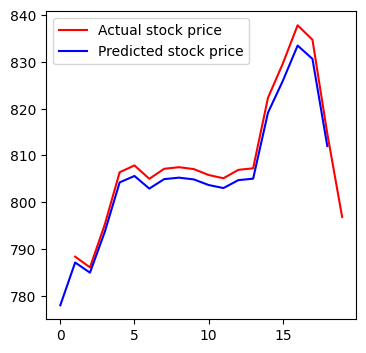

In [ ]:
#visualizing
plt.figure(figsize=(4,4))
plt.plot(y_test,color='red',label='Actual stock price')
plt.plot(y_pred,color='blue',label='Predicted stock price')
plt.legend()
plt.show()

In [ ]:
#calculating mse for evaluation of model becuase we have continuous data ad is categorical data then classification rpeort
from sklearn.metrics import mean_squared_error,r2_score
print('mean squared error',mean_squared_error(y_test,y_pred))
print("accuracy of model",r2_score(y_test,y_pred))

mean squared error 77.78310819033088
accuracy of model 0.5751736615346462


In [ ]:
#in above the mse  is very high and to r2_score is -ve becuase we have not secified the no of iteration which is epcoh
#so to get the correct epoch we have to use early stopping.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#predict the next day stock price:
price=float(input('Enter Today price:'))
#here price is a normal varibal not 2D or 3D wchic is called scalar variable and we required a 2d or 3D variable
#first convert it into 2D numpy array using inbuilt method 
price=np.array([[price]])
#print(price.ndim)
#now applying scaling on price:
price1=mm.transform(price)
#convert input price1 from 2d to 3d
price1=price1.reshape(-1,1,1)#-1represnt none
#prediction
y_pred=model.predict(price1)
#print(y_pred)
#now removing scaling from output because we have to understand the prediction using inverse_transfrom() inbuit method in minmaxscaler
y_pred=mm.inverse_transform(y_pred)
print('Opening price of next day:',y_pred)

In [ ]:
#

In [ ]:
#predict the next n day stock price:
price=float(input('Enter Today price:'))
#here price is a normal varibal not 2D or 3D wchic is called scalar variable and we required a 2d or 3D variable
#first convert it into 2D numpy array using inbuilt method 
price=np.array([[price]])
#print(price.ndim)
n=int(input('How manynext day:'))
for i in range(n):
#now applying scaling on price:
  price1=mm.transform(price)
#convert input price1 from 2d to 3d
  price1=price1.reshape(-1,1,1)#-1represnt none

  #prediction
  
  y_pred=model.predict(price1)
  #print(y_pred)
  
  #now removing scaling from output because we have to understand the prediction using inverse_transfrom() inbuit method in minmaxscaler
  y_pred=mm.inverse_transform(y_pred)
  print('Opening price of next day:',y_pred)
  price=y_pred